
## NETWORK X AND SPREADING OF OPINION IN A GRAPH:   BARABASI ALBERT

In [3]:
import agentpy as ap
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
#from tqdm import tqdm
from datetime import datetime


# Example of a B-A graph. Characterization of the network

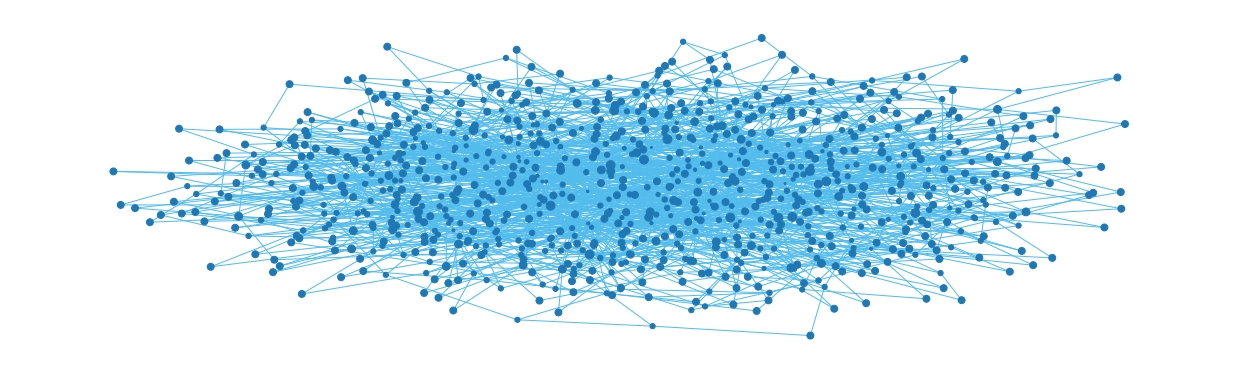

In [4]:
#in networkx we have to have 
G=nx.barabasi_albert_graph(900,2)

"""definimos el tamaño de los nodos con su numero de vecinos"""

carac=pd.DataFrame(G.degree())
carac = carac.rename(columns={0:'ID',1:'num_nodos'})
carac= carac.set_index('ID')
carac=carac.reindex(G.nodes())

carac['num_nodos']=pd.Categorical(carac['num_nodos'])
carac['num_nodos'].cat.codes

node_sizes = [1.3*carac['num_nodos'][entry] for entry in carac['num_nodos']]





"""(n=numer of nodes, m=number of new nodes each with m edges, preferentially attached to existing nodes with high degree)"""
plt.figure(figsize=(17,5))

nx.draw(G,with_labels=False,node_size=node_sizes, edge_color="#52bced")
plt.show()

Obtenemos el numero de vecinos de cada nodo

In [5]:
print('numero total de nodos           ',G.number_of_nodes())
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)
print('valor maximo de vecinos de un nodo            ',dmax)
dmin = min(degree_sequence)
print('valor minimo de vecinos de un nodo            ',dmin)

numero total de nodos            900
valor maximo de vecinos de un nodo             60
valor minimo de vecinos de un nodo             2


In [6]:
def k_distrib(graph, scale='lin', colour='#40a6d1', alpha=.8, fit_line=False, expct_lo=1, expct_hi=10, expct_const=1):
    
    plt.close()
    num_nodes = graph.number_of_nodes()
    max_degree = 0
    
    # Calculate the maximum degree to know the range of x-axis
    for n in graph.nodes():
        if graph.degree(n) > max_degree:
            max_degree = graph.degree(n)
    
    # X-axis and y-axis values
    x = []
    y_tmp = []
    
    # Loop over all degrees until the maximum to compute the portion of nodes for that degree
    for i in range(max_degree + 1):
        x.append(i)
        y_tmp.append(0)
        for n in graph.nodes():
            if graph.degree(n) == i:
                y_tmp[i] += 1
        y = [i / num_nodes for i in y_tmp] 
    
    # Check for the lin / log parameter and set axes scale
    if scale == 'log':
        plt.xscale('log')
        plt.yscale('log')
        plt.title('Degree distribution (log-log scale)')
        plt.ylabel('log(P(k))')
        plt.xlabel('log(k)')
        plt.plot(x, y, linewidth = 0, marker = 'o', markersize = 5, color = colour, alpha = alpha)
        
        if fit_line:
            # Add theoretical distribution line k^-3
            # Note that you need to parametrize it manually
            w = [a for a in range(expct_lo,expct_hi)]
            z = []
            for i in w:
                x = (i**-3) * expct_const # set line's length and fit intercept
                z.append(x)

            plt.plot(w, z, 'k-', color='#7f7f7f')
            
    else:
        plt.plot(x, y, linewidth = 0, marker = 'o', markersize = 5, color = colour, alpha = alpha)
        plt.title('Degree distribution (linear scale)')
        plt.ylabel('P(k)')
        plt.xlabel('k')

    plt.show()

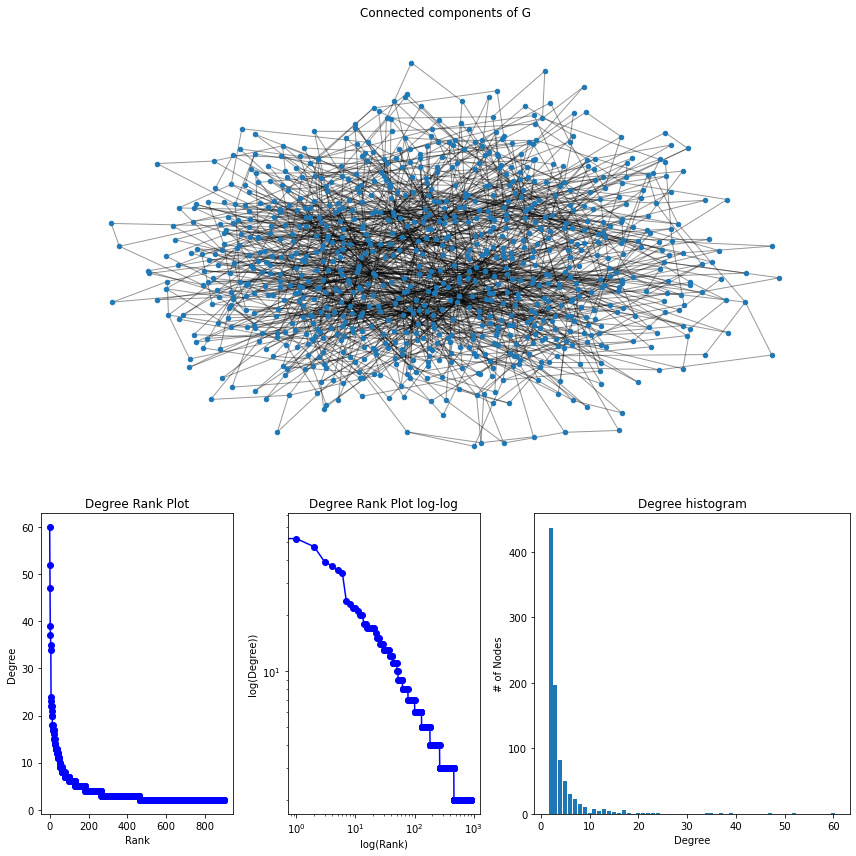

In [7]:

#G = nx.barabasi_albert_graph(100, 2)

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a B-A graph", figsize=(12, 12))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 7)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax3 = fig.add_subplot(axgrid[3:, 2:4])
ax3.plot(degree_sequence, "b-", marker="o")
ax3.set_title("Degree Rank Plot log-log")
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_ylabel("log(Degree))")
ax3.set_xlabel("log(Rank)")

ax2 = fig.add_subplot(axgrid[3:, 4:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

Podemos representar la distribución de probabilidad del grado de la red

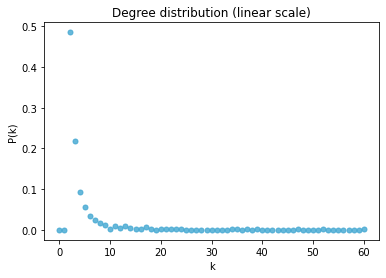

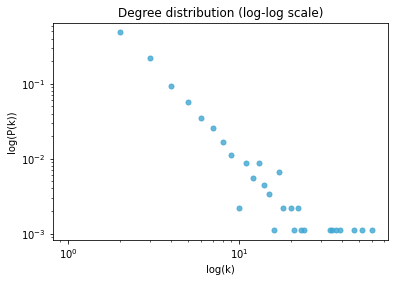

(None, None)

In [8]:
k_distrib(G), k_distrib(G, scale = 'log', fit_line = False)


# SIMULACIÓN DE AGENTES EN B-A NETWORK

In [245]:
class Person(ap.Agent):

    def setup(self): #aqui inicializamos las variables de agentes nuevas cuando se crean los agentes
       

        self.opinion = random.uniform(0,1)
        self.uncertainty = parameters['d']
        self.new_opinion = self.opinion # Used for synchronous updating

    def opinion_influence(self): #este agente es el que influencia a otros en la poblacion
       

        #aleatoriamente seleccionamos un numero fijo de agentes como compañeros a influenciar(interacciones)
        #en el modelo de Deffuant cada uno de las interacciones se realizan a parejas, interacciones 1 a 1.
        #aqui tenemos una red albert barabasi (libre de escala) y cada nodo es un agente
        

        partners = self.network.neighbors(self)
        #partners = self.model.pop.random(self.p.num_partners, replace=False)
        #partner= self.network.neighbors(self).select(partners.random())
        partner=self.network.neighbors(self).random(1)
        #for partner in partners:

        opinion_diff = abs(self.opinion - partner.opinion)
        if opinion_diff <= self.uncertainty:
            opinion_change = self.p.mu * (self.opinion - partner.opinion)
            partner.new_opinion = partner.opinion + opinion_change
            #self.record(partner.opinion)

    def update_opinion(self): #actualizamos las opiniones en cada uno de los pasos
        

        self.opinion = self.new_opinion
        #self.opinion = self.opinion

In [246]:
class OpinionModel(ap.Model):

    def setup(self):
        """ inicializamos el modelo y configuramos a la poblacion de agentes """
        
         # preparamos la red
        graph = nx.barabasi_albert_graph(
            self.p.population,
            self.p.number_of_neighbors)
        
        #self.network.record(graph)   
        
        #  creamos la poblacion de agentes y la red
        self.pop = ap.AgentList(self, self.p.population, Person)
        self.network = self.pop.network = ap.Network(self, graph)
        self.network.add_agents(self.pop, self.network.nodes)

        self.network.record('nº vecinos', graph.degree())
        #self.record('red', graph)
       
                    
    def update(self):
        """ llamamos despues de cada set up y en cada paso """

        # Synchronous updating of opinions
        self.pop.update_opinion()
        # Record stats
        self.pop.record("opinion")
        self.pop.record('id')

    def step(self): 
        """ eventos del modelo cada paso temporal """
        #self.model.pop.random()
        #self.pop.select(self.pop.random())
        self.pop.select(self.pop.random()).opinion_influence()
        #self.record()
        #self.pop.opinion_influence()
        self.record('id')
    def end(self):
        """ condiciones al terminar """
        
        
        return
    

In [247]:
parameters = {
    'population': 70,
    'steps': 2000,
    'num_partners': 1,
    'mu': 0.5,
    'd':1,
    'min_percen':0,
    'number_of_neighbors': 2}


In [248]:
model = OpinionModel(parameters)
results = model.run()

AttributeError: Person (Obj 2) has no attribute 'random'.

In [249]:
results.variables.Person[results.variables.Person
['id']==2].head(10)


AttributeError: 'DataFrame' object has no attribute 'variables'

creamos dataframes con los resultados de simulacion unica de opinion y numero de vecinos de cada nodo

In [237]:
repren=pd.DataFrame(results['variables']['Person']).reset_index()
#ponemos los resultados de opinion de cada agente en el tiempo en un dataframe

repren['num_vecinos']=None
jaja=list(results.variables.Network['nº vecinos'])#le ponemos en el dataframe el numero de vecinos de cada agente
jaja=pd.DataFrame(jaja[0])
jaja.columns = ['obj_id', 'num_vecinos']

for j in range(0,parameters['population']):
    jaja['obj_id'][j]=jaja['obj_id'][j]+1
    
#jaja
repren=repren.merge(jaja, how='inner', on='obj_id')
repren=repren.drop(columns='num_vecinos_x')
repren=repren.rename({'num_vecinos_y':'num_vecinos'})

In [238]:
jaja

,obj_id,num_vecinos
0,1,16
1,2,1
2,3,11
3,4,4
4,5,3
...,...,...
65,66,2
66,67,2
67,68,2
68,69,2


# representamos opinion inicial vs opinion final 

In [239]:
#definimos los dtaframes para la representacion de opinion inicial y final
repren1=repren[repren['t']==parameters['steps']].reset_index()
repren2=repren[repren['t']== 1].reset_index()
#repren
#repren2['num_vecinos_y']

Le ponemos barras de error con el número de vecinos de cada nodo para ver como influencian o son influenciados en el proceso

Text(0.5, 0, 'initial opinion')

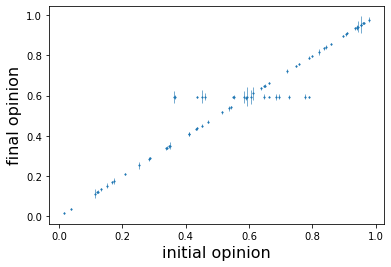

In [240]:

plt.errorbar(repren2['opinion'],repren1['opinion'], yerr=repren1['num_vecinos_y']*0.003,  fmt='o',ms=0.5, linewidth=0.6)
plt.scatter(repren2['opinion'],repren1['opinion'], s=1)
#finalopinion vs initial opinion 
plt.ylabel("final opinion", size = 16)
plt.xlabel("initial opinion", size = 16)
  



calculamos la desviacion de la opinion (medida de cuanto han sido influenciados)

In [241]:
from scipy import stats

slope1, intercept1, r1, p, se = stats.linregress(repren2['opinion'], repren1['opinion'])
print('fin vs init opinion','slope  ',slope1,'     intercept  ',intercept1,'    r factor   ',r1)


fin vs init opinion slope   0.9437722036697822      intercept   0.03438096349247155     r factor    0.971085389342082


# Ahora representamos como evoluciona la opinion en el tiempo y que clusters se forman

In [242]:
# Get all logged data for Person agents
results = results.variables.Person
# Convert the resulting Pandas series to a dataFrame
results = results.opinion.to_frame().reset_index()
results_df2=pd.DataFrame(results)
#results_df2=results_df2[results_df2['t']<=100]

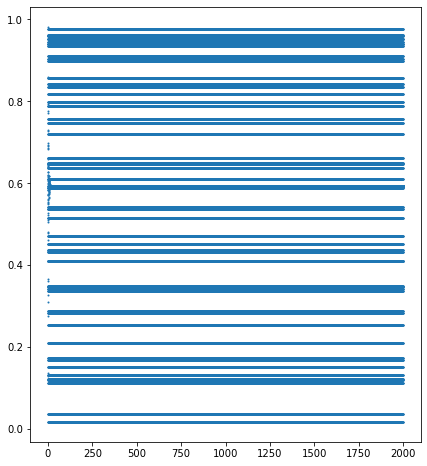

In [243]:
#AHORA representamos la figura en un scatter dependiendo de los parametros introducidos
plt.figure(figsize=(7,8))
plt.scatter(results_df2['t'],results_df2['opinion'], s=1)

# Preguntas

1.-¿Por que no siguen interaccionando si tengo el threhold d=1?, ¿tan separados en la red están los clusters de opinion?

2.-para conseguir llegar a y=1 (1 cluster) tengo que poner que todos los vecinos que ponga interaccionen en cada paso ¿Por que ?

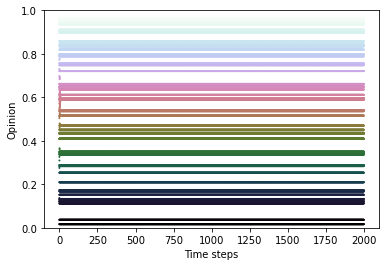

In [244]:
def opinion_plot(data, ax):
    """ plot of people's opinion over time. """
    
    x = results_df2['t']
    y = results_df2['opinion']
     
    
    ax.scatter(x, y,s=1, c = results_df2['opinion'], cmap = 'cubehelix')
 
    ax.set_ylim(0, 1)
    ax.set_xlabel("Time steps")
    ax.set_ylabel("Opinion")

fig, ax = plt.subplots()
opinion_plot(results_df2, ax)

Intentamos hacer un plot (animacion) de la red para ver si los clusters cercanos en opinion también son cercanos en  la red y podrían interactuar

In [41]:
import seaborn as sns
import IPython
import matplotlib as mpl

In [42]:
def animation_plot(m, axs):
    ax1, ax2 = axs
    ax1.set_title("Opinion")
    ax2.set_title("Graph opinion")

    # Plot opinion on first axis
    opinion_plot(results_df2, ax=ax1)

    # Plot network on second axis
 
    #color_map = ['red' if results_df2['opinion'] <= 0.5 else 'green' for node in G] 
    
    """ 
    carac=pd.DataFrame(m.network.graph.degree())
    carac = carac.rename(columns={0:'ID',1:'num_nodos'})
    carac= carac.set_index('ID')
    carac=carac.reindex(G.nodes())

    carac['num_nodos']=pd.Categorical(carac['num_nodos'])
    carac['num_nodos'].cat.codes

    node_sizes = [10*carac['num_nodos'][entry] for entry in carac['num_nodos']]

    """


    nx.draw_circular(m.network.graph, node_size=node_sizes, ax=ax2, cmap='cubehelix')

fig, axs = plt.subplots(1, 2, figsize=(8, 4)) # Prepare figure
#parameters['population'] = 50 # Lower population for better visibility
animation = ap.animate(OpinionModel(parameters), fig, axs, animation_plot)

In [417]:
#IPython.display.HTML(animation.to_jshtml())

Aqui arriba hemos pintado la red con el numero de conexiones proporcional al tamaño de los nodos

In [43]:

#cogemos la opinion de cada agente en el ultimo paso de la simulacion
val=results_df2[results_df2['t'] == parameters['steps']]['opinion']
a = []


#calculamos el numero de clusters que hay y el numero de particulas en cada uno

rounded = [round(x,2) for x in val]
uniques = list(set(rounded))

data = {}
for x in uniques:
    data[x] = rounded.count(x)
#data=pd.DataFrame(data)   

data2 = pd.DataFrame([[key, data[key]] for key in data.keys()], columns=['cluster_opinion', 'Amount_particles'])
data3=data2[data2['Amount_particles']>parameters['min_percen']*parameters['population']/100]
valors_2=len(data3)
valors_3=len(data2)

print('numero de clusters una vez filtrado:',valors_2)
print('numero de clusters sin filtrar',valors_3)
print(data3.sort_values(by=['cluster_opinion']))

numero de clusters una vez filtrado: 57
numero de clusters sin filtrar 57
    cluster_opinion  Amount_particles
55             0.01                 1
50             0.02                 2
37             0.03                 2
21             0.05                 1
9              0.07                 1
51             0.08                 2
39             0.09                 2
36             0.10                 1
19             0.11                 1
30             0.12                 1
5              0.13                 1
42             0.15                 1
35             0.16                 1
41             0.17                 1
16             0.18                 2
7              0.19                 2
34             0.21                 1
38             0.22                 1
43             0.23                 1
28             0.28                 1
56             0.32                 1
6              0.33                 2
8              0.36                 2
31            

# Ahora vamos con las multiples simulaciones para obtener la dispersión respecto al threshold 

In [ ]:
lista =pd.DataFrame()
#esto es para coger el valor de la lista facilmente
lista['indice']= None
lista['th']=None
 #donde empieza el bucle x_0
x=0.06


i=0
n=100  #numero de cachitos al separar el bucle de threshold d de 0 a 0,5
j=0.7   #donde acaba el bucle

while x<=j :
    
    lista = lista.append({'th': x,'indice':int(i)}, ignore_index=True)
    i=i+1
    x+=(j)/(n)

#invertimos la lista por si hay errores en valores cercanos a cero donde no hay clusters y estan equidistribuidas

newList=[]
newList =lista.iloc[::-1]

#len(newList)
lista['indice']=lista['indice']+1

print('dividimos d en   '+str(len(lista))+'      valores')

In [1090]:
#ahora ejecutamos el programa y contamos cuantos clusters hay al final de cada uno para representarlos 
#ahora ejecutamos el programa y contamos cuantos clusters hay al final de cada uno para representarlos 
valors_2=0
resultados=pd.DataFrame()#inicializamos el dataframe de resultados de cuenta de clusters, sample, threshold
resultados['clusters']= None
resultados['d']=None
resultados['sample']=None


dispersion=pd.DataFrame()#inicializamos dataframe de dispersion, cuenta de numero de clusters, threshold
dispersion['dispersion_index']=None
dispersion['d']=None


l=0
i=0
numer_samples=int(100)#numero de samples en cada uno de los intervalos de d

"""para ver el conteo de como llevamos el programa en tiempo y porcentaje"""
cuenta=0
tiempo= float(0)  #timepo transcurrido de cada bucle
iteracion=0
#resultados

In [1091]:
for i in lista['th']:
    cuenta = float(lista[lista['th']== i]['indice']) #para contar por donde vamos del bucle
    disp_1 = 0 #dispersion index denominator
    disp_2 = 0 #dispersion index numerator
    
    for l in range( 1, numer_samples):
        iteracion = iteracion +1
       
        parameters = {
            'population': 100,
            'steps': 300,
            'num_partners': 1,
            'mu': 0.5,
            'd':i,
            'min_percen':0,
            'number_of_neighbors': 2}



        model = OpinionModel(parameters)
        results2 = model.run()
        
        
        tiempo=tiempo+float(results2.info['run_time'].split(":")[2])
        
        print("\033[4;35m"+str(((tiempo/iteracion*numer_samples*len(lista))-tiempo)/3600)\
              +'    horas restantes'+'\033[0;m')
 
        
        """obtenemos el resultado del modelo en cada una de las key(th) x sample iteracciones"""
        
        # Get all logged data for Person agents
        results2 = results2.variables.Person
        # Convert the resulting Pandas series to a dataFrame
        results2 = results2.opinion.to_frame().reset_index()
        results_df=pd.DataFrame(results2)
        
        #imprimimos el porcentaje del bucle para saber como vamos 
        
        print("\033[4;35m"+str(iteracion*100/(len(lista)*numer_samples)) + '% completado'+'\033[0;m')
        
        
        """seleccionamos solo los del ultimo paso para contar los clusters"""

        #para ver el numero de clusters comparamos los resultados del ultimo paso del programa
        valors=results_df[results_df['t'] == parameters['steps']]['opinion']
        
        """obtenemos el numero de clusters y el numero de agentes en cada uno"""
       
        #calculamos el numero de clusters que hay y el numero de particulas en cada uno
        #redondeando al segundo decimal y guardamos el numero de agentes en cada cluster
        rounded = [round(x,2) for x in valors]
        uniques = list(set(rounded))

        data = {}
        for x in uniques:
            data[x] = rounded.count(x) 
        #convertimos a dataframe
        data2 = pd.DataFrame([[key, data[key]] for key in data.keys()], columns=['cluster_opinion', 'Amount_particles'])

        #cogemos solo las cuentas de los que son mayores de min_count
        
        data2=data2[data2['Amount_particles']>parameters['min_percen']*parameters['population']/100]
        valors_2=len(data2)
        
        
        """hacemos un bucle para ir sumando todas las cantidades de particulas de los clusters para calcula dispersion"""
        
        for j in data2['Amount_particles']:
            disp_1 = disp_1+(j)**2
            disp_2 = disp_2+(j)
        
        print(disp_1,disp_2)
        resultados =  resultados.append({'clusters': valors_2, 'd': i, 'sample':l}, ignore_index=True)
        
     
    dispersion = dispersion.append({'dispersion_index': disp_1/(disp_2)**2, 'd':i}, ignore_index=True)
   

Completed: 300 steps
Run time: 0:00:00.471497
Simulation finished
1.2048058063888887    horas restantes
0.010869565217391304% completado
252 100
Completed: 300 steps
Run time: 0:00:00.211439
Simulation finished
0.8724507399999999    horas restantes
0.021739130434782608% completado
488 200
Completed: 300 steps
Run time: 0:00:00.255914
Simulation finished
0.7995003194444446    horas restantes
0.03260869565217391% completado
748 300
Completed: 300 steps
Run time: 0:00:00.248437
Simulation finished
0.7582146702777777    horas restantes
0.043478260869565216% completado
992 400
Completed: 300 steps
Run time: 0:00:00.223437
Simulation finished
0.7206448433333333    horas restantes
0.05434782608695652% completado
1312 500
Completed: 300 steps
Run time: 0:00:00.212135
Simulation finished
0.6907669280555555    horas restantes
0.06521739130434782% completado
1576 600
Completed: 300 steps
Run time: 0:00:00.214424
Simulation finished
0.6702437547222223    horas restantes
0.07608695652173914% comple

Completed: 300 steps
Run time: 0:00:00.200435
Simulation finished
0.5974153950000002    horas restantes
0.5434782608695652% completado
13050 5000
Completed: 300 steps
Run time: 0:00:00.220379
Simulation finished
0.5966190966067539    horas restantes
0.5543478260869565% completado
13290 5100
Completed: 300 steps
Run time: 0:00:00.222434
Simulation finished
0.595951493354701    horas restantes
0.5652173913043478% completado
13588 5200
Completed: 300 steps
Run time: 0:00:00.236100
Simulation finished
0.595961902562893    horas restantes
0.5760869565217391% completado
13886 5300
Completed: 300 steps
Run time: 0:00:00.219423
Simulation finished
0.5951848889917696    horas restantes
0.5869565217391305% completado
14110 5400
Completed: 300 steps
Run time: 0:00:00.216370
Simulation finished
0.5942929055555557    horas restantes
0.5978260869565217% completado
14370 5500
Completed: 300 steps
Run time: 0:00:00.292243
Simulation finished
0.5968720146428571    horas restantes
0.6086956521739131% co

Completed: 300 steps
Run time: 0:00:00.284271
Simulation finished
0.6027814207098764    horas restantes
1.076086956521739% completado
26192 9900
Completed: 300 steps
Run time: 0:00:00.259274
Simulation finished
0.6032419069444444    horas restantes
1.0869565217391304% completado
266 100
Completed: 300 steps
Run time: 0:00:00.236368
Simulation finished
0.6031186315099009    horas restantes
1.0978260869565217% completado
536 200
Completed: 300 steps
Run time: 0:00:00.220413
Simulation finished
0.602601173769063    horas restantes
1.108695652173913% completado
838 300
Completed: 300 steps
Run time: 0:00:00.209427
Simulation finished
0.6018230505151024    horas restantes
1.1195652173913044% completado
1096 400
Completed: 300 steps
Run time: 0:00:00.223403
Simulation finished
0.6013983175641026    horas restantes
1.1304347826086956% completado
1350 500
Completed: 300 steps
Run time: 0:00:00.215456
Simulation finished
0.600789281190476    horas restantes
1.141304347826087% completado
1634 60

Completed: 300 steps
Run time: 0:00:00.268031
Simulation finished
0.5929681815315314    horas restantes
1.608695652173913% completado
13372 4900
Completed: 300 steps
Run time: 0:00:00.219420
Simulation finished
0.5926258677852347    horas restantes
1.6195652173913044% completado
13632 5000
Completed: 300 steps
Run time: 0:00:00.215423
Simulation finished
0.5922203187962961    horas restantes
1.6304347826086956% completado
13862 5100
Completed: 300 steps
Run time: 0:00:00.222405
Simulation finished
0.5919355741206769    horas restantes
1.641304347826087% completado
14172 5200
Completed: 300 steps
Run time: 0:00:00.217418
Simulation finished
0.5915713027192983    horas restantes
1.6521739130434783% completado
14472 5300
Completed: 300 steps
Run time: 0:00:00.208443
Simulation finished
0.5910635874055918    horas restantes
1.6630434782608696% completado
14696 5400
Completed: 300 steps
Run time: 0:00:00.228426
Simulation finished
0.5908877712301587    horas restantes
1.673913043478261% com

Completed: 300 steps
Run time: 0:00:00.219369
Simulation finished
0.5804723349323182    horas restantes
2.141304347826087% completado
26568 9800
Completed: 300 steps
Run time: 0:00:00.225401
Simulation finished
0.5803231113327721    horas restantes
2.152173913043478% completado
26916 9900
Completed: 300 steps
Run time: 0:00:00.218415
Simulation finished
0.5800869846370743    horas restantes
2.1630434782608696% completado
286 100
Completed: 300 steps
Run time: 0:00:00.278699
Simulation finished
0.5806061625000002    horas restantes
2.1739130434782608% completado
552 200
Completed: 300 steps
Run time: 0:00:00.213466
Simulation finished
0.5803081385309564    horas restantes
2.1847826086956523% completado
934 300
Completed: 300 steps
Run time: 0:00:00.215368
Simulation finished
0.5800360125770077    horas restantes
2.1956521739130435% completado
1194 400
Completed: 300 steps
Run time: 0:00:00.215396
Simulation finished
0.5797663229761904    horas restantes
2.2065217391304346% completado
14

Completed: 300 steps
Run time: 0:00:00.222405
Simulation finished
0.573222714663505    horas restantes
2.6739130434782608% completado
13606 4800
Completed: 300 steps
Run time: 0:00:00.223402
Simulation finished
0.5730875610919928    horas restantes
2.6847826086956523% completado
13868 4900
Completed: 300 steps
Run time: 0:00:00.224406
Simulation finished
0.5729630640053763    horas restantes
2.6956521739130435% completado
14180 5000
Completed: 300 steps
Run time: 0:00:00.215429
Simulation finished
0.5727494264011602    horas restantes
2.7065217391304346% completado
14450 5100
Completed: 300 steps
Run time: 0:00:00.213429
Simulation finished
0.5725171302777778    horas restantes
2.717391304347826% completado
14808 5200
Completed: 300 steps
Run time: 0:00:00.220410
Simulation finished
0.5723553505810094    horas restantes
2.7282608695652173% completado
15068 5300
Completed: 300 steps
Run time: 0:00:00.223407
Simulation finished
0.5722239292945327    horas restantes
2.739130434782609% com

Completed: 300 steps
Run time: 0:00:00.216421
Simulation finished
0.5756968713888888    horas restantes
3.2065217391304346% completado
27766 9700
Completed: 300 steps
Run time: 0:00:00.230372
Simulation finished
0.5756124744369369    horas restantes
3.217391304347826% completado
28066 9800
Completed: 300 steps
Run time: 0:00:00.225401
Simulation finished
0.5754868224354656    horas restantes
3.2282608695652173% completado
28428 9900
Completed: 300 steps
Run time: 0:00:00.212432
Simulation finished
0.5752539779045489    horas restantes
3.239130434782609% completado
286 100
Completed: 300 steps
Run time: 0:00:00.213429
Simulation finished
0.5750305405769232    horas restantes
3.25% completado
530 200
Completed: 300 steps
Run time: 0:00:00.234357
Simulation finished
0.5749806598148148    horas restantes
3.260869565217391% completado
802 300
Completed: 300 steps
Run time: 0:00:00.228391
Simulation finished
0.5748816825166113    horas restantes
3.2717391304347827% completado
1126 400
Comple

Completed: 300 steps
Run time: 0:00:00.225385
Simulation finished
0.56803139877907    horas restantes
3.739130434782609% completado
13560 4700
Completed: 300 steps
Run time: 0:00:00.213430
Simulation finished
0.5678426528703707    horas restantes
3.75% completado
13794 4800
Completed: 300 steps
Run time: 0:00:00.231382
Simulation finished
0.5677822620664743    horas restantes
3.760869565217391% completado
14078 4900
Completed: 300 steps
Run time: 0:00:00.241352
Simulation finished
0.5677925056364075    horas restantes
3.7717391304347827% completado
14350 5000
Completed: 300 steps
Run time: 0:00:00.217419
Simulation finished
0.5676331998978291    horas restantes
3.782608695652174% completado
14662 5100
Completed: 300 steps
Run time: 0:00:00.231380
Simulation finished
0.5675728124769185    horas restantes
3.7934782608695654% completado
14942 5200
Completed: 300 steps
Run time: 0:00:00.226395
Simulation finished
0.567477389166667    horas restantes
3.8043478260869565% completado
15292 530

Completed: 300 steps
Run time: 0:00:00.222403
Simulation finished
0.5623257361429178    horas restantes
4.271739130434782% completado
28076 9600
Completed: 300 steps
Run time: 0:00:00.211418
Simulation finished
0.5621473939777213    horas restantes
4.282608695652174% completado
28364 9700
Completed: 300 steps
Run time: 0:00:00.209437
Simulation finished
0.5619573911392405    horas restantes
4.293478260869565% completado
28630 9800
Completed: 300 steps
Run time: 0:00:00.217384
Simulation finished
0.5618171319416386    horas restantes
4.304347826086956% completado
28928 9900
Completed: 300 steps
Run time: 0:00:00.236336
Simulation finished
0.5617940078925272    horas restantes
4.315217391304348% completado
342 100
Completed: 300 steps
Run time: 0:00:00.224394
Simulation finished
0.5616973078643215    horas restantes
4.326086956521739% completado
716 200
Completed: 300 steps
Run time: 0:00:00.209438
Simulation finished
0.5615091428515734    horas restantes
4.336956521739131% completado
10

Completed: 300 steps
Run time: 0:00:00.230384
Simulation finished
0.5583864016968324    horas restantes
4.804347826086956% completado
14126 4600
Completed: 300 steps
Run time: 0:00:00.222411
Simulation finished
0.5582835746783295    horas restantes
4.815217391304348% completado
14378 4700
Completed: 300 steps
Run time: 0:00:00.216412
Simulation finished
0.5581480701626625    horas restantes
4.826086956521739% completado
14656 4800
Completed: 300 steps
Run time: 0:00:00.215420
Simulation finished
0.5580074831554305    horas restantes
4.836956521739131% completado
14940 4900
Completed: 300 steps
Run time: 0:00:00.213428
Simulation finished
0.5578563975298951    horas restantes
4.8478260869565215% completado
15214 5000
Completed: 300 steps
Run time: 0:00:00.218451
Simulation finished
0.5577330444916727    horas restantes
4.858695652173913% completado
15486 5100
Completed: 300 steps
Run time: 0:00:00.227424
Simulation finished
0.5576586640079364    horas restantes
4.869565217391305% comple

Completed: 300 steps
Run time: 0:00:00.233375
Simulation finished
0.5544893675594023    horas restantes
5.336956521739131% completado
28886 9500
Completed: 300 steps
Run time: 0:00:00.228418
Simulation finished
0.554421821093044    horas restantes
5.3478260869565215% completado
29162 9600
Completed: 300 steps
Run time: 0:00:00.225384
Simulation finished
0.554339406732026    horas restantes
5.358695652173913% completado
29428 9700
Completed: 300 steps
Run time: 0:00:00.225430
Simulation finished
0.5542572977530362    horas restantes
5.369565217391305% completado
29736 9800
Completed: 300 steps
Run time: 0:00:00.231381
Simulation finished
0.5542043379208751    horas restantes
5.380434782608695% completado
30138 9900
Completed: 300 steps
Run time: 0:00:00.222399
Simulation finished
0.5541075492473114    horas restantes
5.391304347826087% completado
300 100
Completed: 300 steps
Run time: 0:00:00.224397
Simulation finished
0.5540206201056336    horas restantes
5.4021739130434785% completado

Completed: 300 steps
Run time: 0:00:00.223387
Simulation finished
0.5510701192592592    horas restantes
5.869565217391305% completado
14124 4500
Completed: 300 steps
Run time: 0:00:00.220410
Simulation finished
0.550967928530499    horas restantes
5.880434782608695% completado
14394 4600
Completed: 300 steps
Run time: 0:00:00.221403
Simulation finished
0.5508702951752766    horas restantes
5.891304347826087% completado
14754 4700
Completed: 300 steps
Run time: 0:00:00.224399
Simulation finished
0.5507860629486392    horas restantes
5.9021739130434785% completado
15058 4800
Completed: 300 steps
Run time: 0:00:00.221411
Simulation finished
0.5506887044689541    horas restantes
5.913043478260869% completado
15358 4900
Completed: 300 steps
Run time: 0:00:00.216422
Simulation finished
0.5505694695183485    horas restantes
5.923913043478261% completado
15650 5000
Completed: 300 steps
Run time: 0:00:00.216421
Simulation finished
0.5504504467134717    horas restantes
5.934782608695652% complet

Completed: 300 steps
Run time: 0:00:00.219414
Simulation finished
0.5469472229022821    horas restantes
6.4021739130434785% completado
29304 9400
Completed: 300 steps
Run time: 0:00:00.247339
Simulation finished
0.5469594153531069    horas restantes
6.413043478260869% completado
29594 9500
Completed: 300 steps
Run time: 0:00:00.227391
Simulation finished
0.5468906175822521    horas restantes
6.423913043478261% completado
29932 9600
Completed: 300 steps
Run time: 0:00:00.223403
Simulation finished
0.5468057311561558    horas restantes
6.434782608695652% completado
30268 9700
Completed: 300 steps
Run time: 0:00:00.223407
Simulation finished
0.5467209378555365    horas restantes
6.445652173913044% completado
30552 9800
Completed: 300 steps
Run time: 0:00:00.223404
Simulation finished
0.5466362090329215    horas restantes
6.456521739130435% completado
30890 9900
Completed: 300 steps
Run time: 0:00:00.217419
Simulation finished
0.5465275130368811    horas restantes
6.467391304347826% comple

Completed: 300 steps
Run time: 0:00:00.221399
Simulation finished
0.5436307438427375    horas restantes
6.934782608695652% completado
13958 4400
Completed: 300 steps
Run time: 0:00:00.227394
Simulation finished
0.5435628502795163    horas restantes
6.945652173913044% completado
14276 4500
Completed: 300 steps
Run time: 0:00:00.224401
Simulation finished
0.5434838516666665    horas restantes
6.956521739130435% completado
14620 4600
Completed: 300 steps
Run time: 0:00:00.232378
Simulation finished
0.5434344921294849    horas restantes
6.967391304347826% completado
14998 4700
Completed: 300 steps
Run time: 0:00:00.219413
Simulation finished
0.5433370779724817    horas restantes
6.978260869565218% completado
15324 4800
Completed: 300 steps
Run time: 0:00:00.227395
Simulation finished
0.5432692838819767    horas restantes
6.989130434782608% completado
15816 4900
Completed: 300 steps
Run time: 0:00:00.230384
Simulation finished
0.5432125349999998    horas restantes
7.0% completado
16080 5000

Completed: 300 steps
Run time: 0:00:00.236360
Simulation finished
0.5405736240558787    horas restantes
7.467391304347826% completado
30602 9300
Completed: 300 steps
Run time: 0:00:00.250329
Simulation finished
0.5405848028940565    horas restantes
7.478260869565218% completado
30990 9400
Completed: 300 steps
Run time: 0:00:00.258332
Simulation finished
0.5406232081422349    horas restantes
7.489130434782608% completado
31248 9500
Completed: 300 steps
Run time: 0:00:00.253322
Simulation finished
0.5406441301851849    horas restantes
7.5% completado
31570 9600
Completed: 300 steps
Run time: 0:00:00.225396
Simulation finished
0.5405692652781795    horas restantes
7.510869565217392% completado
31894 9700
Completed: 300 steps
Run time: 0:00:00.236368
Simulation finished
0.5405319076011558    horas restantes
7.521739130434782% completado
32294 9800
Completed: 300 steps
Run time: 0:00:00.218417
Simulation finished
0.5404332572683177    horas restantes
7.532608695652174% completado
32580 9900

Completed: 300 steps
Run time: 0:00:00.225421
Simulation finished
0.5400548541666664    horas restantes
8.0% completado
14714 4300
Completed: 300 steps
Run time: 0:00:00.234346
Simulation finished
0.5400058612799635    horas restantes
8.01086956521739% completado
15058 4400
Completed: 300 steps
Run time: 0:00:00.234369
Simulation finished
0.5399568980088825    horas restantes
8.021739130434783% completado
15376 4500
Completed: 300 steps
Run time: 0:00:00.224395
Simulation finished
0.539876170260111    horas restantes
8.032608695652174% completado
15672 4600
Completed: 300 steps
Run time: 0:00:00.225387
Simulation finished
0.5397986424999996    horas restantes
8.043478260869565% completado
15954 4700
Completed: 300 steps
Run time: 0:00:00.216420
Simulation finished
0.5396927205176935    horas restantes
8.054347826086957% completado
16250 4800
Completed: 300 steps
Run time: 0:00:00.246339
Simulation finished
0.5396816565393827    horas restantes
8.065217391304348% completado
16600 4900
C

Completed: 300 steps
Run time: 0:00:00.231381
Simulation finished
0.5369015779936299    horas restantes
8.532608695652174% completado
30920 9200
Completed: 300 steps
Run time: 0:00:00.227392
Simulation finished
0.5368309402897928    horas restantes
8.543478260869565% completado
31246 9300
Completed: 300 steps
Run time: 0:00:00.222410
Simulation finished
0.5367455278582515    horas restantes
8.554347826086957% completado
31558 9400
Completed: 300 steps
Run time: 0:00:00.216421
Simulation finished
0.5366424161463614    horas restantes
8.565217391304348% completado
31870 9500
Completed: 300 steps
Run time: 0:00:00.215421
Simulation finished
0.5365364522172926    horas restantes
8.576086956521738% completado
32158 9600
Completed: 300 steps
Run time: 0:00:00.224400
Simulation finished
0.5364571568846688    horas restantes
8.58695652173913% completado
32498 9700
Completed: 300 steps
Run time: 0:00:00.226395
Simulation finished
0.5363837957005892    horas restantes
8.597826086956522% completa

Completed: 300 steps
Run time: 0:00:00.234373
Simulation finished
0.5337924711730606    horas restantes
9.065217391304348% completado
14378 4200
Completed: 300 steps
Run time: 0:00:00.231415
Simulation finished
0.5337334443945433    horas restantes
9.076086956521738% completado
14688 4300
Completed: 300 steps
Run time: 0:00:00.232385
Simulation finished
0.5336771007775111    horas restantes
9.08695652173913% completado
15002 4400
Completed: 300 steps
Run time: 0:00:00.228385
Simulation finished
0.5336096357294563    horas restantes
9.097826086956522% completado
15362 4500
Completed: 300 steps
Run time: 0:00:00.224377
Simulation finished
0.533531070867806    horas restantes
9.108695652173912% completado
15668 4600
Completed: 300 steps
Run time: 0:00:00.230378
Simulation finished
0.5334691565405236    horas restantes
9.119565217391305% completado
16050 4700
Completed: 300 steps
Run time: 0:00:00.227418
Simulation finished
0.5333990541931208    horas restantes
9.130434782608695% completad

Completed: 300 steps
Run time: 0:00:00.228401
Simulation finished
0.5307988022703527    horas restantes
9.597826086956522% completado
31484 9100
Completed: 300 steps
Run time: 0:00:00.229392
Simulation finished
0.5307340317081438    horas restantes
9.608695652173912% completado
31834 9200
Completed: 300 steps
Run time: 0:00:00.229386
Simulation finished
0.5306692478609533    horas restantes
9.619565217391305% completado
32116 9300
Completed: 300 steps
Run time: 0:00:00.228378
Simulation finished
0.5306018389697758    horas restantes
9.630434782608695% completado
32364 9400
Completed: 300 steps
Run time: 0:00:00.236354
Simulation finished
0.530555203307966    horas restantes
9.641304347826088% completado
32652 9500
Completed: 300 steps
Run time: 0:00:00.246343
Simulation finished
0.5305344972122112    horas restantes
9.652173913043478% completado
33006 9600
Completed: 300 steps
Run time: 0:00:00.236358
Simulation finished
0.5304877540782393    horas restantes
9.66304347826087% completad

Completed: 300 steps
Run time: 0:00:00.228387
Simulation finished
0.5279583419992837    horas restantes
10.130434782608695% completado
14800 4100
Completed: 300 steps
Run time: 0:00:00.233376
Simulation finished
0.527903090407585    horas restantes
10.141304347826088% completado
15204 4200
Completed: 300 steps
Run time: 0:00:00.227397
Simulation finished
0.5278331197596944    horas restantes
10.152173913043478% completado
15762 4300
Completed: 300 steps
Run time: 0:00:00.233368
Simulation finished
0.527777825080213    horas restantes
10.16304347826087% completado
16116 4400
Completed: 300 steps
Run time: 0:00:00.221396
Simulation finished
0.5276931485090207    horas restantes
10.173913043478262% completado
16458 4500
Completed: 300 steps
Run time: 0:00:00.235365
Simulation finished
0.5276427399107663    horas restantes
10.184782608695652% completado
16850 4600
Completed: 300 steps
Run time: 0:00:00.224366
Simulation finished
0.5275653881929628    horas restantes
10.195652173913043% com

Completed: 300 steps
Run time: 0:00:00.228390
Simulation finished
0.5252397122383613    horas restantes
10.66304347826087% completado
32450 9000
Completed: 300 steps
Run time: 0:00:00.237365
Simulation finished
0.5251927880945907    horas restantes
10.673913043478262% completado
32776 9100
Completed: 300 steps
Run time: 0:00:00.225398
Simulation finished
0.5251180382146482    horas restantes
10.684782608695652% completado
33056 9200
Completed: 300 steps
Run time: 0:00:00.223402
Simulation finished
0.525038683622402    horas restantes
10.695652173913043% completado
33336 9300
Completed: 300 steps
Run time: 0:00:00.226382
Simulation finished
0.5249662679046804    horas restantes
10.706521739130435% completado
33736 9400
Completed: 300 steps
Run time: 0:00:00.222406
Simulation finished
0.5248846708045969    horas restantes
10.717391304347826% completado
34092 9500
Completed: 300 steps
Run time: 0:00:00.231381
Simulation finished
0.5248238590141273    horas restantes
10.728260869565217% co

Completed: 300 steps
Run time: 0:00:00.233376
Simulation finished
0.5223059142826312    horas restantes
11.195652173913043% completado
13598 4000
Completed: 300 steps
Run time: 0:00:00.233373
Simulation finished
0.5222490846936623    horas restantes
11.206521739130435% completado
13942 4100
Completed: 300 steps
Run time: 0:00:00.219414
Simulation finished
0.5221615502476304    horas restantes
11.217391304347826% completado
14340 4200
Completed: 300 steps
Run time: 0:00:00.260298
Simulation finished
0.5221638542032369    horas restantes
11.228260869565217% completado
14696 4300
Completed: 300 steps
Run time: 0:00:00.229392
Simulation finished
0.5220982139345575    horas restantes
11.23913043478261% completado
15008 4400
Completed: 300 steps
Run time: 0:00:00.224399
Simulation finished
0.5220216359259251    horas restantes
11.25% completado
15314 4500
Completed: 300 steps
Run time: 0:00:00.231381
Simulation finished
0.5219603688384805    horas restantes
11.26086956521739% completado
1565

Completed: 300 steps
Run time: 0:00:00.232379
Simulation finished
0.51938314611214    horas restantes
11.728260869565217% completado
31260 8900
Completed: 300 steps
Run time: 0:00:00.234374
Simulation finished
0.5193278242386823    horas restantes
11.73913043478261% completado
31592 9000
Completed: 300 steps
Run time: 0:00:00.232379
Simulation finished
0.5192683221217486    horas restantes
11.75% completado
31984 9100
Completed: 300 steps
Run time: 0:00:00.240357
Simulation finished
0.5192254376524945    horas restantes
11.76086956521739% completado
32368 9200
Completed: 300 steps
Run time: 0:00:00.231382
Simulation finished
0.5191638238252786    horas restantes
11.771739130434783% completado
32746 9300
Completed: 300 steps
Run time: 0:00:00.235384
Simulation finished
0.5191105282349315    horas restantes
11.782608695652174% completado
33106 9400
Completed: 300 steps
Run time: 0:00:00.225397
Simulation finished
0.5190364616397841    horas restantes
11.793478260869565% completado
33518 

Completed: 300 steps
Run time: 0:00:00.228384
Simulation finished
0.516729451715917    horas restantes
12.26086956521739% completado
14002 3900
Completed: 300 steps
Run time: 0:00:00.240355
Simulation finished
0.5166850975381351    horas restantes
12.271739130434783% completado
14616 4000
Completed: 300 steps
Run time: 0:00:00.236376
Simulation finished
0.5166328102507365    horas restantes
12.282608695652174% completado
14968 4100
Completed: 300 steps
Run time: 0:00:00.229388
Simulation finished
0.5165666506636203    horas restantes
12.293478260869565% completado
15496 4200
Completed: 300 steps
Run time: 0:00:00.236368
Simulation finished
0.5165143142540235    horas restantes
12.304347826086957% completado
15938 4300
Completed: 300 steps
Run time: 0:00:00.229386
Simulation finished
0.516448145416298    horas restantes
12.315217391304348% completado
16264 4400
Completed: 300 steps
Run time: 0:00:00.220410
Simulation finished
0.5163642461326662    horas restantes
12.326086956521738% com

Completed: 300 steps
Run time: 0:00:00.235369
Simulation finished
0.5158379480874158    horas restantes
12.793478260869565% completado
31820 8800
Completed: 300 steps
Run time: 0:00:00.252353
Simulation finished
0.5158131718237121    horas restantes
12.804347826086957% completado
32232 8900
Completed: 300 steps
Run time: 0:00:00.229415
Simulation finished
0.5157449708085944    horas restantes
12.815217391304348% completado
32526 9000
Completed: 300 steps
Run time: 0:00:00.225339
Simulation finished
0.5156690821045193    horas restantes
12.826086956521738% completado
32884 9100
Completed: 300 steps
Run time: 0:00:00.230385
Simulation finished
0.5156027332430141    horas restantes
12.83695652173913% completado
33280 9200
Completed: 300 steps
Run time: 0:00:00.216425
Simulation finished
0.5155100837756155    horas restantes
12.847826086956522% completado
33634 9300
Completed: 300 steps
Run time: 0:00:00.242379
Simulation finished
0.515466346547384    horas restantes
12.858695652173912% co

Completed: 300 steps
Run time: 0:00:00.231383
Simulation finished
0.512942964665579    horas restantes
13.326086956521738% completado
14456 3800
Completed: 300 steps
Run time: 0:00:00.243330
Simulation finished
0.5128998518486821    horas restantes
13.33695652173913% completado
14856 3900
Completed: 300 steps
Run time: 0:00:00.230352
Simulation finished
0.5128332960206295    horas restantes
13.347826086956522% completado
15224 4000
Completed: 300 steps
Run time: 0:00:00.232407
Simulation finished
0.5127704466619201    horas restantes
13.358695652173912% completado
15594 4100
Completed: 300 steps
Run time: 0:00:00.231380
Simulation finished
0.5127057460185183    horas restantes
13.369565217391305% completado
15984 4200
Completed: 300 steps
Run time: 0:00:00.238362
Simulation finished
0.5126536012562052    horas restantes
13.380434782608695% completado
16434 4300
Completed: 300 steps
Run time: 0:00:00.237398
Simulation finished
0.5125997017965366    horas restantes
13.391304347826088% co

Completed: 300 steps
Run time: 0:00:00.249334
Simulation finished
0.5098843269934636    horas restantes
13.858695652173912% completado
33106 8700
Completed: 300 steps
Run time: 0:00:00.241347
Simulation finished
0.5098367685083591    horas restantes
13.869565217391305% completado
33604 8800
Completed: 300 steps
Run time: 0:00:00.215410
Simulation finished
0.5097444786380837    horas restantes
13.880434782608695% completado
33960 8900
Completed: 300 steps
Run time: 0:00:00.249328
Simulation finished
0.5097106420939834    horas restantes
13.891304347826088% completado
34332 9000
Completed: 300 steps
Run time: 0:00:00.245343
Simulation finished
0.5096698947215703    horas restantes
13.902173913043478% completado
34768 9100
Completed: 300 steps
Run time: 0:00:00.252351
Simulation finished
0.5096411495312496    horas restantes
13.91304347826087% completado
35168 9200
Completed: 300 steps
Run time: 0:00:00.252363
Simulation finished
0.5096123603846817    horas restantes
13.923913043478262% c

Completed: 300 steps
Run time: 0:00:00.254330
Simulation finished
0.5072757238737826    horas restantes
14.391304347826088% completado
14564 3700
Completed: 300 steps
Run time: 0:00:00.230333
Simulation finished
0.5072087818396221    horas restantes
14.402173913043478% completado
14878 3800
Completed: 300 steps
Run time: 0:00:00.231381
Simulation finished
0.5071435729353103    horas restantes
14.41304347826087% completado
15260 3900
Completed: 300 steps
Run time: 0:00:00.238356
Simulation finished
0.5070898604969433    horas restantes
14.423913043478262% completado
15592 4000
Completed: 300 steps
Run time: 0:00:00.241354
Simulation finished
0.5070410657028107    horas restantes
14.434782608695652% completado
16004 4100
Completed: 300 steps
Run time: 0:00:00.220411
Simulation finished
0.5069577893146472    horas restantes
14.445652173913043% completado
16438 4200
Completed: 300 steps
Run time: 0:00:00.230370
Simulation finished
0.5068909156203002    horas restantes
14.456521739130435% c

Completed: 300 steps
Run time: 0:00:00.268284
Simulation finished
0.5044956095605726    horas restantes
14.923913043478262% completado
34298 8600
Completed: 300 steps
Run time: 0:00:00.271534
Simulation finished
0.5044936381715992    horas restantes
14.934782608695652% completado
34616 8700
Completed: 300 steps
Run time: 0:00:00.239343
Simulation finished
0.5044406721464643    horas restantes
14.945652173913043% completado
34948 8800
Completed: 300 steps
Run time: 0:00:00.231369
Simulation finished
0.5043750918798446    horas restantes
14.956521739130435% completado
35262 8900
Completed: 300 steps
Run time: 0:00:00.237340
Simulation finished
0.504318936404018    horas restantes
14.967391304347826% completado
35872 9000
Completed: 300 steps
Run time: 0:00:00.236377
Simulation finished
0.504261248323254    horas restantes
14.978260869565217% completado
36278 9100
Completed: 300 steps
Run time: 0:00:00.224396
Simulation finished
0.5041846736094993    horas restantes
14.98913043478261% com

Completed: 300 steps
Run time: 0:00:00.259333
Simulation finished
0.5018440733243474    horas restantes
15.456521739130435% completado
13868 3600
Completed: 300 steps
Run time: 0:00:00.231415
Simulation finished
0.5017782460545014    horas restantes
15.467391304347826% completado
14178 3700
Completed: 300 steps
Run time: 0:00:00.240359
Simulation finished
0.5017259876966291    horas restantes
15.478260869565217% completado
14574 3800
Completed: 300 steps
Run time: 0:00:00.246371
Simulation finished
0.501682820730994    horas restantes
15.48913043478261% completado
15010 3900
Completed: 300 steps
Run time: 0:00:00.244346
Simulation finished
0.5016365517921147    horas restantes
15.5% completado
15398 4000
Completed: 300 steps
Run time: 0:00:00.230384
Simulation finished
0.5015691269352954    horas restantes
15.51086956521739% completado
15850 4100
Completed: 300 steps
Run time: 0:00:00.237360
Simulation finished
0.5015122533862434    horas restantes
15.521739130434783% completado
16162 

Completed: 300 steps
Run time: 0:00:00.244348
Simulation finished
0.4993435021814339    horas restantes
15.98913043478261% completado
33274 8500
Completed: 300 steps
Run time: 0:00:00.243385
Simulation finished
0.49929464812500024    horas restantes
16.0% completado
33648 8600
Completed: 300 steps
Run time: 0:00:00.237358
Simulation finished
0.4992369863349553    horas restantes
16.01086956521739% completado
34012 8700
Completed: 300 steps
Run time: 0:00:00.259248
Simulation finished
0.49921118467397885    horas restantes
16.02173913043478% completado
34334 8800
Completed: 300 steps
Run time: 0:00:00.262294
Simulation finished
0.4991897516807912    horas restantes
16.032608695652176% completado
34788 8900
Completed: 300 steps
Run time: 0:00:00.269305
Simulation finished
0.4991784403929541    horas restantes
16.043478260869566% completado
35282 9000
Completed: 300 steps
Run time: 0:00:00.233382
Simulation finished
0.4991148665425414    horas restantes
16.054347826086957% completado
3561

Completed: 300 steps
Run time: 0:00:00.244318
Simulation finished
0.49674175859649156    horas restantes
16.52173913043478% completado
13682 3500
Completed: 300 steps
Run time: 0:00:00.247374
Simulation finished
0.4966974504132881    horas restantes
16.532608695652176% completado
14014 3600
Completed: 300 steps
Run time: 0:00:00.242352
Simulation finished
0.4966460728321654    horas restantes
16.543478260869566% completado
14392 3700
Completed: 300 steps
Run time: 0:00:00.243340
Simulation finished
0.49659605771011184    horas restantes
16.554347826086957% completado
14934 3800
Completed: 300 steps
Run time: 0:00:00.242351
Simulation finished
0.4965446358121903    horas restantes
16.565217391304348% completado
15374 3900
Completed: 300 steps
Run time: 0:00:00.220405
Simulation finished
0.4964625126366122    horas restantes
16.57608695652174% completado
15828 4000
Completed: 300 steps
Run time: 0:00:00.250298
Simulation finished
0.4964221743304938    horas restantes
16.58695652173913% c

Completed: 300 steps
Run time: 0:00:00.242351
Simulation finished
0.4940801029647335    horas restantes
17.054347826086957% completado
33888 8400
Completed: 300 steps
Run time: 0:00:00.245343
Simulation finished
0.4940319014278133    horas restantes
17.065217391304348% completado
34240 8500
Completed: 300 steps
Run time: 0:00:00.232393
Simulation finished
0.4939662058699345    horas restantes
17.07608695652174% completado
34660 8600
Completed: 300 steps
Run time: 0:00:00.235371
Simulation finished
0.4939045257923383    horas restantes
17.08695652173913% completado
35154 8700
Completed: 300 steps
Run time: 0:00:00.234374
Simulation finished
0.49384149818976497    horas restantes
17.097826086956523% completado
35664 8800
Completed: 300 steps
Run time: 0:00:00.265291
Simulation finished
0.49382007691444313    horas restantes
17.108695652173914% completado
36040 8900
Completed: 300 steps
Run time: 0:00:00.258303
Simulation finished
0.49378919182098774    horas restantes
17.119565217391305%

Completed: 300 steps
Run time: 0:00:00.230372
Simulation finished
0.4923943239719821    horas restantes
17.58695652173913% completado
14062 3400
Completed: 300 steps
Run time: 0:00:00.241363
Simulation finished
0.4923392275545606    horas restantes
17.597826086956523% completado
14500 3500
Completed: 300 steps
Run time: 0:00:00.230351
Simulation finished
0.49226980380658447    horas restantes
17.608695652173914% completado
14886 3600
Completed: 300 steps
Run time: 0:00:00.232413
Simulation finished
0.4922030647948798    horas restantes
17.619565217391305% completado
15188 3700
Completed: 300 steps
Run time: 0:00:00.245346
Simulation finished
0.49215311266646133    horas restantes
17.630434782608695% completado
15530 3800
Completed: 300 steps
Run time: 0:00:00.241359
Simulation finished
0.4920979677305403    horas restantes
17.641304347826086% completado
15994 3900
Completed: 300 steps
Run time: 0:00:00.238315
Simulation finished
0.4920388636029011    horas restantes
17.652173913043477%

Completed: 300 steps
Run time: 0:00:00.235370
Simulation finished
0.48979548175464926    horas restantes
18.119565217391305% completado
33784 8300
Completed: 300 steps
Run time: 0:00:00.241361
Simulation finished
0.4897396046955771    horas restantes
18.130434782608695% completado
34176 8400
Completed: 300 steps
Run time: 0:00:00.246347
Simulation finished
0.48968996376572815    horas restantes
18.141304347826086% completado
34644 8500
Completed: 300 steps
Run time: 0:00:00.238365
Simulation finished
0.4896303029191619    horas restantes
18.152173913043477% completado
34998 8600
Completed: 300 steps
Run time: 0:00:00.218412
Simulation finished
0.48954566147067635    horas restantes
18.16304347826087% completado
35322 8700
Completed: 300 steps
Run time: 0:00:00.239357
Simulation finished
0.4894872438649657    horas restantes
18.17391304347826% completado
35708 8800
Completed: 300 steps
Run time: 0:00:00.261270
Simulation finished
0.4894562024038654    horas restantes
18.184782608695652%

Completed: 300 steps
Run time: 0:00:00.246368
Simulation finished
0.4870270339050764    horas restantes
18.652173913043477% completado
13698 3300
Completed: 300 steps
Run time: 0:00:00.242351
Simulation finished
0.48697173770982993    horas restantes
18.66304347826087% completado
14052 3400
Completed: 300 steps
Run time: 0:00:00.238393
Simulation finished
0.48691163936651144    horas restantes
18.67391304347826% completado
14448 3500
Completed: 300 steps
Run time: 0:00:00.231352
Simulation finished
0.48684302221398107    horas restantes
18.684782608695652% completado
14828 3600
Completed: 300 steps
Run time: 0:00:00.247343
Simulation finished
0.4867937274160207    horas restantes
18.695652173913043% completado
15288 3700
Completed: 300 steps
Run time: 0:00:00.239297
Simulation finished
0.4867346973547357    horas restantes
18.706521739130434% completado
15712 3800
Completed: 300 steps
Run time: 0:00:00.252291
Simulation finished
0.4866913331139503    horas restantes
18.717391304347824%

Completed: 300 steps
Run time: 0:00:00.232379
Simulation finished
0.4843248257444133    horas restantes
19.184782608695652% completado
34014 8200
Completed: 300 steps
Run time: 0:00:00.248321
Simulation finished
0.48427583583522116    horas restantes
19.195652173913043% completado
34402 8300
Completed: 300 steps
Run time: 0:00:00.237367
Simulation finished
0.4842140236603161    horas restantes
19.206521739130434% completado
34858 8400
Completed: 300 steps
Run time: 0:00:00.237367
Simulation finished
0.4841522068212673    horas restantes
19.217391304347824% completado
35360 8500
Completed: 300 steps
Run time: 0:00:00.228390
Simulation finished
0.48407991046777865    horas restantes
19.22826086956522% completado
35736 8600
Completed: 300 steps
Run time: 0:00:00.240356
Simulation finished
0.4840215769413061    horas restantes
19.23913043478261% completado
36222 8700
Completed: 300 steps
Run time: 0:00:00.243349
Simulation finished
0.4839667214069268    horas restantes
19.25% completado
36

Completed: 300 steps
Run time: 0:00:00.243337
Simulation finished
0.48162841408765206    horas restantes
19.717391304347824% completado
13560 3200
Completed: 300 steps
Run time: 0:00:00.255289
Simulation finished
0.48158642002142693    horas restantes
19.72826086956522% completado
13898 3300
Completed: 300 steps
Run time: 0:00:00.238370
Simulation finished
0.48152528466226185    horas restantes
19.73913043478261% completado
14410 3400
Completed: 300 steps
Run time: 0:00:00.285312
Simulation finished
0.48151712677215236    horas restantes
19.75% completado
14820 3500
Completed: 300 steps
Run time: 0:00:00.242330
Simulation finished
0.48146041048282656    horas restantes
19.76086956521739% completado
15180 3600
Completed: 300 steps
Run time: 0:00:00.250322
Simulation finished
0.48141269068871834    horas restantes
19.77173913043478% completado
15678 3700
Completed: 300 steps
Run time: 0:00:00.248302
Simulation finished
0.48136267164835217    horas restantes
19.782608695652176% completado

Completed: 300 steps
Run time: 0:00:00.244347
Simulation finished
0.4790079976543214    horas restantes
20.25% completado
34742 8100
Completed: 300 steps
Run time: 0:00:00.255311
Simulation finished
0.4789648807522657    horas restantes
20.26086956521739% completado
35140 8200
Completed: 300 steps
Run time: 0:00:00.259311
Simulation finished
0.4789261040080433    horas restantes
20.27173913043478% completado
35654 8300
Completed: 300 steps
Run time: 0:00:00.235370
Simulation finished
0.4788611538204125    horas restantes
20.282608695652176% completado
36004 8400
Completed: 300 steps
Run time: 0:00:00.240357
Simulation finished
0.4788016441154858    horas restantes
20.293478260869566% completado
36414 8500
Completed: 300 steps
Run time: 0:00:00.242352
Simulation finished
0.47874430177551797    horas restantes
20.304347826086957% completado
37028 8600
Completed: 300 steps
Run time: 0:00:00.255318
Simulation finished
0.4787010760021705    horas restantes
20.315217391304348% completado
374

Completed: 300 steps
Run time: 0:00:00.253324
Simulation finished
0.4763437075290567    horas restantes
20.782608695652176% completado
13508 3100
Completed: 300 steps
Run time: 0:00:00.245342
Simulation finished
0.4762889772956966    horas restantes
20.793478260869566% completado
13916 3200
Completed: 300 steps
Run time: 0:00:00.240352
Simulation finished
0.47622895654708036    horas restantes
20.804347826086957% completado
14356 3300
Completed: 300 steps
Run time: 0:00:00.237366
Simulation finished
0.47616577340150884    horas restantes
20.815217391304348% completado
14820 3400
Completed: 300 steps
Run time: 0:00:00.231371
Simulation finished
0.47609625654662535    horas restantes
20.82608695652174% completado
15654 3500
Completed: 300 steps
Run time: 0:00:00.241354
Simulation finished
0.47603728046267363    horas restantes
20.83695652173913% completado
16132 3600
Completed: 300 steps
Run time: 0:00:00.258309
Simulation finished
0.4759961771961538    horas restantes
20.847826086956523

Completed: 300 steps
Run time: 0:00:00.244347
Simulation finished
0.4735732758541565    horas restantes
21.315217391304348% completado
34610 8000
Completed: 300 steps
Run time: 0:00:00.243349
Simulation finished
0.47351588816712026    horas restantes
21.32608695652174% completado
35064 8100
Completed: 300 steps
Run time: 0:00:00.245336
Simulation finished
0.4734605249341998    horas restantes
21.33695652173913% completado
35436 8200
Completed: 300 steps
Run time: 0:00:00.243349
Simulation finished
0.47340311514256667    horas restantes
21.347826086956523% completado
35814 8300
Completed: 300 steps
Run time: 0:00:00.248337
Simulation finished
0.4733507965062204    horas restantes
21.358695652173914% completado
36306 8400
Completed: 300 steps
Run time: 0:00:00.244360
Simulation finished
0.47329439603453194    horas restantes
21.369565217391305% completado
36836 8500
Completed: 300 steps
Run time: 0:00:00.230384
Simulation finished
0.47322370828884985    horas restantes
21.380434782608695

Completed: 300 steps
Run time: 0:00:00.245344
Simulation finished
0.4708375096987292    horas restantes
21.847826086956523% completado
13610 3000
Completed: 300 steps
Run time: 0:00:00.242337
Simulation finished
0.47077856940314444    horas restantes
21.858695652173914% completado
14124 3100
Completed: 300 steps
Run time: 0:00:00.243338
Simulation finished
0.4707206141534136    horas restantes
21.869565217391305% completado
14636 3200
Completed: 300 steps
Run time: 0:00:00.248336
Simulation finished
0.4706676060842033    horas restantes
21.880434782608695% completado
15110 3300
Completed: 300 steps
Run time: 0:00:00.250331
Simulation finished
0.4706165594317562    horas restantes
21.891304347826086% completado
15626 3400
Completed: 300 steps
Run time: 0:00:00.245344
Simulation finished
0.47056055486352405    horas restantes
21.902173913043477% completado
15992 3500
Completed: 300 steps
Run time: 0:00:00.243353
Simulation finished
0.4705025674360676    horas restantes
21.91304347826087%

Completed: 300 steps
Run time: 0:00:00.247325
Simulation finished
0.4688072222510933    horas restantes
22.380434782608695% completado
35776 7900
Completed: 300 steps
Run time: 0:00:00.245376
Simulation finished
0.4687502716019424    horas restantes
22.391304347826086% completado
36202 8000
Completed: 300 steps
Run time: 0:00:00.249293
Simulation finished
0.46869707893916174    horas restantes
22.402173913043477% completado
36756 8100
Completed: 300 steps
Run time: 0:00:00.231389
Simulation finished
0.46862665457700237    horas restantes
22.41304347826087% completado
37210 8200
Completed: 300 steps
Run time: 0:00:00.247323
Simulation finished
0.4685715484185658    horas restantes
22.42391304347826% completado
37690 8300
Completed: 300 steps
Run time: 0:00:00.235343
Simulation finished
0.46850492374677066    horas restantes
22.434782608695652% completado
38052 8400
Completed: 300 steps
Run time: 0:00:00.228388
Simulation finished
0.46843162502152325    horas restantes
22.445652173913043

Completed: 300 steps
Run time: 0:00:00.253318
Simulation finished
0.4660788188567369    horas restantes
22.91304347826087% completado
13428 2900
Completed: 300 steps
Run time: 0:00:00.244346
Simulation finished
0.46602034534942893    horas restantes
22.92391304347826% completado
13972 3000
Completed: 300 steps
Run time: 0:00:00.246341
Simulation finished
0.4659637250368621    horas restantes
22.934782608695652% completado
14406 3100
Completed: 300 steps
Run time: 0:00:00.240358
Simulation finished
0.4659015125217123    horas restantes
22.945652173913043% completado
14802 3200
Completed: 300 steps
Run time: 0:00:00.244346
Simulation finished
0.46584301346380536    horas restantes
22.956521739130434% completado
15272 3300
Completed: 300 steps
Run time: 0:00:00.241354
Simulation finished
0.46578171798653906    horas restantes
22.967391304347824% completado
15688 3400
Completed: 300 steps
Run time: 0:00:00.242352
Simulation finished
0.4657213463040057    horas restantes
22.97826086956522% 

Completed: 300 steps
Run time: 0:00:00.240349
Simulation finished
0.4633091442125127    horas restantes
23.445652173913043% completado
35710 7800
Completed: 300 steps
Run time: 0:00:00.249333
Simulation finished
0.46325470498043486    horas restantes
23.456521739130434% completado
36244 7900
Completed: 300 steps
Run time: 0:00:00.241355
Simulation finished
0.46319302476725366    horas restantes
23.467391304347824% completado
36682 8000
Completed: 300 steps
Run time: 0:00:00.239361
Simulation finished
0.4631295343209879    horas restantes
23.47826086956522% completado
37196 8100
Completed: 300 steps
Run time: 0:00:00.245343
Simulation finished
0.4630714536267935    horas restantes
23.48913043478261% completado
37762 8200
Completed: 300 steps
Run time: 0:00:00.244347
Simulation finished
0.4630124629787238    horas restantes
23.5% completado
38206 8300
Completed: 300 steps
Run time: 0:00:00.243350
Simulation finished
0.4629525631188682    horas restantes
23.51086956521739% completado
3864

Completed: 300 steps
Run time: 0:00:00.241356
Simulation finished
0.4604826262007657    horas restantes
23.97826086956522% completado
12830 2800
Completed: 300 steps
Run time: 0:00:00.254307
Simulation finished
0.4604319992942911    horas restantes
23.98913043478261% completado
13278 2900
Completed: 300 steps
Run time: 0:00:00.246341
Simulation finished
0.4603743471296298    horas restantes
24.0% completado
13736 3000
Completed: 300 steps
Run time: 0:00:00.246341
Simulation finished
0.4603166852086164    horas restantes
24.01086956521739% completado
14266 3100
Completed: 300 steps
Run time: 0:00:00.245344
Simulation finished
0.46025813759803946    horas restantes
24.02173913043478% completado
14740 3200
Completed: 300 steps
Run time: 0:00:00.239362
Simulation finished
0.46019432875031435    horas restantes
24.032608695652176% completado
15104 3300
Completed: 300 steps
Run time: 0:00:00.237373
Simulation finished
0.4601287720584693    horas restantes
24.043478260869566% completado
15564

Completed: 300 steps
Run time: 0:00:00.245331
Simulation finished
0.4577630610679974    horas restantes
24.51086956521739% completado
35854 7700
Completed: 300 steps
Run time: 0:00:00.246330
Simulation finished
0.45770488163908607    horas restantes
24.52173913043478% completado
36194 7800
Completed: 300 steps
Run time: 0:00:00.238365
Simulation finished
0.4576398870224735    horas restantes
24.532608695652176% completado
36576 7900
Completed: 300 steps
Run time: 0:00:00.238363
Simulation finished
0.4575748896191323    horas restantes
24.543478260869566% completado
36950 8000
Completed: 300 steps
Run time: 0:00:00.236367
Simulation finished
0.4575081875553345    horas restantes
24.554347826086957% completado
37358 8100
Completed: 300 steps
Run time: 0:00:00.231395
Simulation finished
0.4574372453048184    horas restantes
24.565217391304348% completado
37798 8200
Completed: 300 steps
Run time: 0:00:00.239363
Simulation finished
0.45737310166187556    horas restantes
24.57608695652174% c

Completed: 300 steps
Run time: 0:00:00.253322
Simulation finished
0.45500883338348774    horas restantes
25.043478260869566% completado
12270 2700
Completed: 300 steps
Run time: 0:00:00.254320
Simulation finished
0.45495680002048683    horas restantes
25.054347826086957% completado
12780 2800
Completed: 300 steps
Run time: 0:00:00.247345
Simulation finished
0.4548989581808326    horas restantes
25.065217391304348% completado
13244 2900
Completed: 300 steps
Run time: 0:00:00.248336
Simulation finished
0.4548419294142226    horas restantes
25.07608695652174% completado
13766 3000
Completed: 300 steps
Run time: 0:00:00.241358
Simulation finished
0.4547791021639706    horas restantes
25.08695652173913% completado
14224 3100
Completed: 300 steps
Run time: 0:00:00.247339
Simulation finished
0.45472122952504695    horas restantes
25.097826086956523% completado
14668 3200
Completed: 300 steps
Run time: 0:00:00.295197
Simulation finished
0.45470299897667144    horas restantes
25.108695652173914

Completed: 300 steps
Run time: 0:00:00.240357
Simulation finished
0.4521834239215893    horas restantes
25.57608695652174% completado
34894 7600
Completed: 300 steps
Run time: 0:00:00.244369
Simulation finished
0.4521227315873688    horas restantes
25.58695652173913% completado
35366 7700
Completed: 300 steps
Run time: 0:00:00.262286
Simulation finished
0.45207649904458586    horas restantes
25.597826086956523% completado
35770 7800
Completed: 300 steps
Run time: 0:00:00.272271
Simulation finished
0.4520383010285794    horas restantes
25.608695652173914% completado
36320 7900
Completed: 300 steps
Run time: 0:00:00.274262
Simulation finished
0.4520016769173384    horas restantes
25.619565217391305% completado
36830 8000
Completed: 300 steps
Run time: 0:00:00.238364
Simulation finished
0.45193608534940155    horas restantes
25.630434782608695% completado
37230 8100
Completed: 300 steps
Run time: 0:00:00.234374
Simulation finished
0.4518672791355799    horas restantes
25.641304347826086% 

Completed: 300 steps
Run time: 0:00:00.283229
Simulation finished
0.44943911608937026    horas restantes
26.108695652173914% completado
12328 2600
Completed: 300 steps
Run time: 0:00:00.276265
Simulation finished
0.44940306119399387    horas restantes
26.119565217391305% completado
12742 2700
Completed: 300 steps
Run time: 0:00:00.259308
Simulation finished
0.44935365670687766    horas restantes
26.130434782608695% completado
13154 2800
Completed: 300 steps
Run time: 0:00:00.247339
Simulation finished
0.4492948398544701    horas restantes
26.141304347826086% completado
13528 2900
Completed: 300 steps
Run time: 0:00:00.261297
Simulation finished
0.4492469631811677    horas restantes
26.152173913043477% completado
14014 3000
Completed: 300 steps
Run time: 0:00:00.251328
Simulation finished
0.4491912508781104    horas restantes
26.16304347826087% completado
14466 3100
Completed: 300 steps
Run time: 0:00:00.250330
Simulation finished
0.4491347449307864    horas restantes
26.17391304347826%

Completed: 300 steps
Run time: 0:00:00.259306
Simulation finished
0.44680494665250053    horas restantes
26.641304347826086% completado
35510 7500
Completed: 300 steps
Run time: 0:00:00.249347
Simulation finished
0.44674716454504293    horas restantes
26.652173913043477% completado
36058 7600
Completed: 300 steps
Run time: 0:00:00.243347
Simulation finished
0.4466847888942114    horas restantes
26.66304347826087% completado
36446 7700
Completed: 300 steps
Run time: 0:00:00.247344
Simulation finished
0.4466254611212988    horas restantes
26.67391304347826% completado
36934 7800
Completed: 300 steps
Run time: 0:00:00.249334
Simulation finished
0.44656764443935304    horas restantes
26.684782608695652% completado
37452 7900
Completed: 300 steps
Run time: 0:00:00.237362
Simulation finished
0.44650068670195464    horas restantes
26.695652173913043% completado
37948 8000
Completed: 300 steps
Run time: 0:00:00.269280
Simulation finished
0.44645806198650134    horas restantes
26.70652173913043

Completed: 300 steps
Run time: 0:00:00.252325
Simulation finished
0.4445495158000002    horas restantes
27.17391304347826% completado
11772 2500
Completed: 300 steps
Run time: 0:00:00.265290
Simulation finished
0.44450282818472625    horas restantes
27.184782608695652% completado
12150 2600
Completed: 300 steps
Run time: 0:00:00.256309
Simulation finished
0.44444944046651585    horas restantes
27.195652173913043% completado
12648 2700
Completed: 300 steps
Run time: 0:00:00.258313
Simulation finished
0.44439752792937376    horas restantes
27.206521739130434% completado
13328 2800
Completed: 300 steps
Run time: 0:00:00.255318
Simulation finished
0.4443433748242813    horas restantes
27.217391304347824% completado
13946 2900
Completed: 300 steps
Run time: 0:00:00.283243
Simulation finished
0.4443099399650699    horas restantes
27.22826086956522% completado
14442 3000
Completed: 300 steps
Run time: 0:00:00.247339
Simulation finished
0.44424982833776716    horas restantes
27.23913043478261%

Completed: 300 steps
Run time: 0:00:00.245344
Simulation finished
0.44204825259807795    horas restantes
27.706521739130434% completado
35604 7400
Completed: 300 steps
Run time: 0:00:00.245344
Simulation finished
0.44198619038671055    horas restantes
27.717391304347824% completado
36044 7500
Completed: 300 steps
Run time: 0:00:00.241355
Simulation finished
0.44192123533363853    horas restantes
27.72826086956522% completado
36738 7600
Completed: 300 steps
Run time: 0:00:00.254319
Simulation finished
0.4418656595950891    horas restantes
27.73913043478261% completado
37206 7700
Completed: 300 steps
Run time: 0:00:00.252356
Simulation finished
0.4418086523648652    horas restantes
27.75% completado
37672 7800
Completed: 300 steps
Run time: 0:00:00.226395
Simulation finished
0.44173286945967144    horas restantes
27.76086956521739% completado
38132 7900
Completed: 300 steps
Run time: 0:00:00.243333
Simulation finished
0.4416693333317029    horas restantes
27.77173913043478% completado
38

Completed: 300 steps
Run time: 0:00:00.283241
Simulation finished
0.43965824811072657    horas restantes
28.23913043478261% completado
12122 2400
Completed: 300 steps
Run time: 0:00:00.267287
Simulation finished
0.43961108732546744    horas restantes
28.25% completado
12722 2500
Completed: 300 steps
Run time: 0:00:00.247340
Simulation finished
0.4395498405128209    horas restantes
28.26086956521739% completado
13168 2600
Completed: 300 steps
Run time: 0:00:00.242351
Simulation finished
0.4394850719655906    horas restantes
28.27173913043478% completado
13604 2700
Completed: 300 steps
Run time: 0:00:00.250330
Simulation finished
0.43942592164723754    horas restantes
28.282608695652176% completado
14110 2800
Completed: 300 steps
Run time: 0:00:00.256306
Simulation finished
0.4393709704254709    horas restantes
28.293478260869566% completado
14696 2900
Completed: 300 steps
Run time: 0:00:00.242348
Simulation finished
0.43930618562169343    horas restantes
28.304347826086957% completado
1

Completed: 300 steps
Run time: 0:00:00.260314
Simulation finished
0.43676021995802394    horas restantes
28.77173913043478% completado
36648 7300
Completed: 300 steps
Run time: 0:00:00.247355
Simulation finished
0.43669866490181286    horas restantes
28.782608695652176% completado
37188 7400
Completed: 300 steps
Run time: 0:00:00.248349
Simulation finished
0.43663778726899066    horas restantes
28.793478260869566% completado
37818 7500
Completed: 300 steps
Run time: 0:00:00.243354
Simulation finished
0.4365734740356396    horas restantes
28.804347826086957% completado
38242 7600
Completed: 300 steps
Run time: 0:00:00.243355
Simulation finished
0.43650915901012216    horas restantes
28.815217391304348% completado
38730 7700
Completed: 300 steps
Run time: 0:00:00.254322
Simulation finished
0.43645236328598974    horas restantes
28.82608695652174% completado
39346 7800
Completed: 300 steps
Run time: 0:00:00.253323
Simulation finished
0.43639487231457075    horas restantes
28.8369565217391

Completed: 300 steps
Run time: 0:00:00.251299
Simulation finished
0.4339615048862511    horas restantes
29.304347826086957% completado
11252 2300
Completed: 300 steps
Run time: 0:00:00.252342
Simulation finished
0.4339029150078277    horas restantes
29.315217391304348% completado
12104 2400
Completed: 300 steps
Run time: 0:00:00.251321
Simulation finished
0.43384363311691787    horas restantes
29.32608695652174% completado
12588 2500
Completed: 300 steps
Run time: 0:00:00.263313
Simulation finished
0.4337923669704829    horas restantes
29.33695652173913% completado
13018 2600
Completed: 300 steps
Run time: 0:00:00.256317
Simulation finished
0.4337364062242797    horas restantes
29.347826086956523% completado
13362 2700
Completed: 300 steps
Run time: 0:00:00.250319
Simulation finished
0.4336764252881648    horas restantes
29.358695652173914% completado
13862 2800
Completed: 300 steps
Run time: 0:00:00.255316
Simulation finished
0.4336197753960028    horas restantes
29.369565217391305% c

Completed: 300 steps
Run time: 0:00:00.247339
Simulation finished
0.43122596537947777    horas restantes
29.83695652173913% completado
36308 7200
Completed: 300 steps
Run time: 0:00:00.280255
Simulation finished
0.4311851166458282    horas restantes
29.847826086956523% completado
36866 7300
Completed: 300 steps
Run time: 0:00:00.252325
Simulation finished
0.4311260158099745    horas restantes
29.858695652173914% completado
37338 7400
Completed: 300 steps
Run time: 0:00:00.245344
Simulation finished
0.43106235402717125    horas restantes
29.869565217391305% completado
37912 7500
Completed: 300 steps
Run time: 0:00:00.247357
Simulation finished
0.4310000011587042    horas restantes
29.880434782608695% completado
38408 7600
Completed: 300 steps
Run time: 0:00:00.252325
Simulation finished
0.4309408803939394    horas restantes
29.891304347826086% completado
38870 7700
Completed: 300 steps
Run time: 0:00:00.248337
Simulation finished
0.4308791547589766    horas restantes
29.902173913043477%

Completed: 300 steps
Run time: 0:00:00.248322
Simulation finished
0.42842768373001644    horas restantes
30.369565217391305% completado
11066 2200
Completed: 300 steps
Run time: 0:00:00.271279
Simulation finished
0.42838022848539037    horas restantes
30.380434782608695% completado
11616 2300
Completed: 300 steps
Run time: 0:00:00.246344
Simulation finished
0.4283168889794942    horas restantes
30.391304347826086% completado
12042 2400
Completed: 300 steps
Run time: 0:00:00.258305
Simulation finished
0.4282611518292413    horas restantes
30.402173913043477% completado
12440 2500
Completed: 300 steps
Run time: 0:00:00.309173
Simulation finished
0.4282377335608765    horas restantes
30.41304347826087% completado
13020 2600
Completed: 300 steps
Run time: 0:00:00.241356
Simulation finished
0.4281711901335791    horas restantes
30.42391304347826% completado
13514 2700
Completed: 300 steps
Run time: 0:00:00.266290
Simulation finished
0.4281204774603172    horas restantes
30.434782608695652% 

Completed: 300 steps
Run time: 0:00:00.249333
Simulation finished
0.4257440321898814    horas restantes
30.902173913043477% completado
35396 7100
Completed: 300 steps
Run time: 0:00:00.257311
Simulation finished
0.42568712293639605    horas restantes
30.91304347826087% completado
35846 7200
Completed: 300 steps
Run time: 0:00:00.249333
Simulation finished
0.42562525321958583    horas restantes
30.92391304347826% completado
36316 7300
Completed: 300 steps
Run time: 0:00:00.246341
Simulation finished
0.42556152276528453    horas restantes
30.934782608695652% completado
36750 7400
Completed: 300 steps
Run time: 0:00:00.258307
Simulation finished
0.42550520617501825    horas restantes
30.945652173913043% completado
37298 7500
Completed: 300 steps
Run time: 0:00:00.262298
Simulation finished
0.425451351321785    horas restantes
30.956521739130434% completado
37706 7600
Completed: 300 steps
Run time: 0:00:00.242353
Simulation finished
0.4253851327214225    horas restantes
30.967391304347824%

Completed: 300 steps
Run time: 0:00:00.254319
Simulation finished
0.42284875867565663    horas restantes
31.434782608695652% completado
10904 2100
Completed: 300 steps
Run time: 0:00:00.250337
Simulation finished
0.4227871846055609    horas restantes
31.445652173913043% completado
11404 2200
Completed: 300 steps
Run time: 0:00:00.251328
Simulation finished
0.42272620485947887    horas restantes
31.456521739130434% completado
11952 2300
Completed: 300 steps
Run time: 0:00:00.245345
Simulation finished
0.422661599473709    horas restantes
31.467391304347824% completado
12500 2400
Completed: 300 steps
Run time: 0:00:00.252326
Simulation finished
0.42260121280847096    horas restantes
31.47826086956522% completado
12938 2500
Completed: 300 steps
Run time: 0:00:00.250331
Simulation finished
0.4225396137441027    horas restantes
31.48913043478261% completado
13438 2600
Completed: 300 steps
Run time: 0:00:00.258309
Simulation finished
0.42248282836419704    horas restantes
31.5% completado
14

Completed: 300 steps
Run time: 0:00:00.251325
Simulation finished
0.4204692994720233    horas restantes
31.967391304347824% completado
36962 7000
Completed: 300 steps
Run time: 0:00:00.272262
Simulation finished
0.4204200952843865    horas restantes
31.97826086956522% completado
37440 7100
Completed: 300 steps
Run time: 0:00:00.253336
Simulation finished
0.4203596959599042    horas restantes
31.98913043478261% completado
37914 7200
Completed: 300 steps
Run time: 0:00:00.252326
Simulation finished
0.42029869368055506    horas restantes
32.0% completado
38448 7300
Completed: 300 steps
Run time: 0:00:00.269279
Simulation finished
0.4202476872113746    horas restantes
32.01086956521739% completado
39080 7400
Completed: 300 steps
Run time: 0:00:00.254325
Simulation finished
0.4201878463879454    horas restantes
32.02173913043478% completado
39604 7500
Completed: 300 steps
Run time: 0:00:00.247339
Simulation finished
0.42012388072437074    horas restantes
32.03260869565217% completado
40078 

Completed: 300 steps
Run time: 0:00:00.242352
Simulation finished
0.41755330730769175    horas restantes
32.5% completado
10552 2000
Completed: 300 steps
Run time: 0:00:00.252320
Simulation finished
0.41749198481314265    horas restantes
32.51086956521739% completado
11048 2100
Completed: 300 steps
Run time: 0:00:00.234374
Simulation finished
0.4174203132501481    horas restantes
32.52173913043478% completado
11438 2200
Completed: 300 steps
Run time: 0:00:00.252340
Simulation finished
0.4173589956843741    horas restantes
32.53260869565217% completado
11900 2300
Completed: 300 steps
Run time: 0:00:00.263296
Simulation finished
0.4173039805143616    horas restantes
32.54347826086956% completado
12434 2400
Completed: 300 steps
Run time: 0:00:00.253322
Simulation finished
0.4172432132433681    horas restantes
32.55434782608695% completado
12918 2500
Completed: 300 steps
Run time: 0:00:00.247343
Simulation finished
0.41717900037494393    horas restantes
32.56521739130435% completado
13494 

Completed: 300 steps
Run time: 0:00:00.251323
Simulation finished
0.41466604192808254    horas restantes
33.03260869565217% completado
36136 6900
Completed: 300 steps
Run time: 0:00:00.255317
Simulation finished
0.4146060649049703    horas restantes
33.04347826086956% completado
36662 7000
Completed: 300 steps
Run time: 0:00:00.259306
Simulation finished
0.41454832485174786    horas restantes
33.05434782608695% completado
37198 7100
Completed: 300 steps
Run time: 0:00:00.253325
Simulation finished
0.4144872122108989    horas restantes
33.06521739130435% completado
37652 7200
Completed: 300 steps
Run time: 0:00:00.303176
Simulation finished
0.4144541115801289    horas restantes
33.07608695652174% completado
38420 7300
Completed: 300 steps
Run time: 0:00:00.251328
Simulation finished
0.4143918511892242    horas restantes
33.08695652173913% completado
38770 7400
Completed: 300 steps
Run time: 0:00:00.251328
Simulation finished
0.41432958583743795    horas restantes
33.09782608695652% comp

Completed: 300 steps
Run time: 0:00:00.264316
Simulation finished
0.4118968737305694    horas restantes
33.56521739130435% completado
10172 1900
Completed: 300 steps
Run time: 0:00:00.268321
Simulation finished
0.41184361152881127    horas restantes
33.57608695652174% completado
10750 2000
Completed: 300 steps
Run time: 0:00:00.254322
Simulation finished
0.4117826464284425    horas restantes
33.58695652173913% completado
11580 2100
Completed: 300 steps
Run time: 0:00:00.269235
Simulation finished
0.41172986223156777    horas restantes
33.59782608695652% completado
12076 2200
Completed: 300 steps
Run time: 0:00:00.269282
Simulation finished
0.41167708959249616    horas restantes
33.608695652173914% completado
12578 2300
Completed: 300 steps
Run time: 0:00:00.257312
Simulation finished
0.4116177376353408    horas restantes
33.619565217391305% completado
13170 2400
Completed: 300 steps
Run time: 0:00:00.245344
Simulation finished
0.4115518170599003    horas restantes
33.630434782608695% c

Completed: 300 steps
Run time: 0:00:00.317155
Simulation finished
0.4092539559961742    horas restantes
34.09782608695652% completado
36430 6800
Completed: 300 steps
Run time: 0:00:00.296210
Simulation finished
0.4092150084239779    horas restantes
34.108695652173914% completado
36900 6900
Completed: 300 steps
Run time: 0:00:00.291223
Simulation finished
0.40917335845147007    horas restantes
34.119565217391305% completado
37498 7000
Completed: 300 steps
Run time: 0:00:00.273254
Simulation finished
0.40912205041932    horas restantes
34.130434782608695% completado
38046 7100
Completed: 300 steps
Run time: 0:00:00.272279
Simulation finished
0.40907020428755814    horas restantes
34.141304347826086% completado
38462 7200
Completed: 300 steps
Run time: 0:00:00.260305
Simulation finished
0.40901193003518577    horas restantes
34.15217391304348% completado
38938 7300
Completed: 300 steps
Run time: 0:00:00.270274
Simulation finished
0.4089589834242756    horas restantes
34.16304347826087% co

Completed: 300 steps
Run time: 0:00:00.266282
Simulation finished
0.4063920125619023    horas restantes
34.630434782608695% completado
9636 1800
Completed: 300 steps
Run time: 0:00:00.260293
Simulation finished
0.40633336109969276    horas restantes
34.641304347826086% completado
10256 1900
Completed: 300 steps
Run time: 0:00:00.246341
Simulation finished
0.4062673924654952    horas restantes
34.65217391304348% completado
10852 2000
Completed: 300 steps
Run time: 0:00:00.266289
Simulation finished
0.4062118668228455    horas restantes
34.66304347826087% completado
11440 2100
Completed: 300 steps
Run time: 0:00:00.263295
Simulation finished
0.4061547627464294    horas restantes
34.67391304347826% completado
11944 2200
Completed: 300 steps
Run time: 0:00:00.250331
Simulation finished
0.40609086733704114    horas restantes
34.68478260869565% completado
12354 2300
Completed: 300 steps
Run time: 0:00:00.252325
Simulation finished
0.4060280109259255    horas restantes
34.69565217391305% comp

Completed: 300 steps
Run time: 0:00:00.272301
Simulation finished
0.40355790216340337    horas restantes
35.16304347826087% completado
35420 6700
Completed: 300 steps
Run time: 0:00:00.261288
Simulation finished
0.4034993260063861    horas restantes
35.17391304347826% completado
36066 6800
Completed: 300 steps
Run time: 0:00:00.260302
Simulation finished
0.4034402366559396    horas restantes
35.18478260869565% completado
36534 6900
Completed: 300 steps
Run time: 0:00:00.256312
Simulation finished
0.4033790984120853    horas restantes
35.19565217391305% completado
37034 7000
Completed: 300 steps
Run time: 0:00:00.244347
Simulation finished
0.4033118372398885    horas restantes
35.20652173913044% completado
37726 7100
Completed: 300 steps
Run time: 0:00:00.258303
Simulation finished
0.4032517068415633    horas restantes
35.21739130434783% completado
38238 7200
Completed: 300 steps
Run time: 0:00:00.240359
Simulation finished
0.4031824047229931    horas restantes
35.22826086956522% comple

Completed: 300 steps
Run time: 0:00:00.255318
Simulation finished
0.40068088405196867    horas restantes
35.69565217391305% completado
9202 1700
Completed: 300 steps
Run time: 0:00:00.250332
Simulation finished
0.4006164117892774    horas restantes
35.70652173913044% completado
9574 1800
Completed: 300 steps
Run time: 0:00:00.300198
Simulation finished
0.4005768660718871    horas restantes
35.71739130434783% completado
10094 1900
Completed: 300 steps
Run time: 0:00:00.258303
Simulation finished
0.4005163589237903    horas restantes
35.72826086956522% completado
10628 2000
Completed: 300 steps
Run time: 0:00:00.243346
Simulation finished
0.4004483745235195    horas restantes
35.73913043478261% completado
11116 2100
Completed: 300 steps
Run time: 0:00:00.276263
Simulation finished
0.4003968232828278    horas restantes
35.75% completado
11630 2200
Completed: 300 steps
Run time: 0:00:00.258314
Simulation finished
0.4003363004153998    horas restantes
35.76086956521739% completado
12244 230

Completed: 300 steps
Run time: 0:00:00.266287
Simulation finished
0.3979062872619757    horas restantes
36.22826086956522% completado
35208 6600
Completed: 300 steps
Run time: 0:00:00.269286
Simulation finished
0.397850748156868    horas restantes
36.23913043478261% completado
35790 6700
Completed: 300 steps
Run time: 0:00:00.252325
Simulation finished
0.3977869119540224    horas restantes
36.25% completado
36280 6800
Completed: 300 steps
Run time: 0:00:00.250331
Simulation finished
0.39772209837929595    horas restantes
36.26086956521739% completado
36720 6900
Completed: 300 steps
Run time: 0:00:00.246341
Simulation finished
0.3976553346685307    horas restantes
36.27173913043478% completado
37228 7000
Completed: 300 steps
Run time: 0:00:00.243349
Simulation finished
0.3975871104119228    horas restantes
36.28260869565217% completado
37632 7100
Completed: 300 steps
Run time: 0:00:00.237365
Simulation finished
0.39751596880586276    horas restantes
36.29347826086956% completado
38036 7

Completed: 300 steps
Run time: 0:00:00.261289
Simulation finished
0.3952717503769953    horas restantes
36.76086956521739% completado
8760 1600
Completed: 300 steps
Run time: 0:00:00.266288
Simulation finished
0.3952141784109266    horas restantes
36.77173913043478% completado
9322 1700
Completed: 300 steps
Run time: 0:00:00.251315
Simulation finished
0.39514944849356387    horas restantes
36.78260869565217% completado
9820 1800
Completed: 300 steps
Run time: 0:00:00.251308
Simulation finished
0.39508471223453095    horas restantes
36.79347826086956% completado
10322 1900
Completed: 300 steps
Run time: 0:00:00.254321
Simulation finished
0.3950214100723561    horas restantes
36.80434782608695% completado
10892 2000
Completed: 300 steps
Run time: 0:00:00.254320
Simulation finished
0.3949581030977096    horas restantes
36.81521739130435% completado
11572 2100
Completed: 300 steps
Run time: 0:00:00.265290
Simulation finished
0.3949000191988056    horas restantes
36.82608695652174% completa

Completed: 300 steps
Run time: 0:00:00.278255
Simulation finished
0.3922973460259392    horas restantes
37.29347826086956% completado
35312 6500
Completed: 300 steps
Run time: 0:00:00.286234
Simulation finished
0.39224868692048637    horas restantes
37.30434782608695% completado
35956 6600
Completed: 300 steps
Run time: 0:00:00.259310
Simulation finished
0.3921874462674363    horas restantes
37.31521739130435% completado
36464 6700
Completed: 300 steps
Run time: 0:00:00.265290
Simulation finished
0.3921289884876718    horas restantes
37.32608695652174% completado
36914 6800
Completed: 300 steps
Run time: 0:00:00.257317
Simulation finished
0.3920668048443306    horas restantes
37.33695652173913% completado
37460 6900
Completed: 300 steps
Run time: 0:00:00.261301
Simulation finished
0.3920064722603796    horas restantes
37.34782608695652% completado
38104 7000
Completed: 300 steps
Run time: 0:00:00.257314
Simulation finished
0.3919442755435936    horas restantes
37.358695652173914% compl

Completed: 300 steps
Run time: 0:00:00.259293
Simulation finished
0.38934984621647445    horas restantes
37.82608695652174% completado
7446 1500
Completed: 300 steps
Run time: 0:00:00.255308
Simulation finished
0.38928646158567076    horas restantes
37.83695652173913% completado
7988 1600
Completed: 300 steps
Run time: 0:00:00.267279
Simulation finished
0.3892285332644068    horas restantes
37.84782608695652% completado
8566 1700
Completed: 300 steps
Run time: 0:00:00.253323
Simulation finished
0.3891642324094006    horas restantes
37.858695652173914% completado
8958 1800
Completed: 300 steps
Run time: 0:00:00.303189
Simulation finished
0.38912265371093185    horas restantes
37.869565217391305% completado
9962 1900
Completed: 300 steps
Run time: 0:00:00.261302
Simulation finished
0.3890619700215201    horas restantes
37.880434782608695% completado
10760 2000
Completed: 300 steps
Run time: 0:00:00.255322
Simulation finished
0.38899855673105055    horas restantes
37.891304347826086% comp

Completed: 300 steps
Run time: 0:00:00.252326
Simulation finished
0.38639453355916    horas restantes
38.358695652173914% completado
34300 6400
Completed: 300 steps
Run time: 0:00:00.273258
Simulation finished
0.386338878548158    horas restantes
38.369565217391305% completado
34884 6500
Completed: 300 steps
Run time: 0:00:00.251276
Simulation finished
0.38627340874138516    horas restantes
38.380434782608695% completado
35560 6600
Completed: 300 steps
Run time: 0:00:00.256306
Simulation finished
0.38621017868472324    horas restantes
38.391304347826086% completado
36122 6700
Completed: 300 steps
Run time: 0:00:00.265290
Simulation finished
0.3861509470376916    horas restantes
38.40217391304348% completado
36636 6800
Completed: 300 steps
Run time: 0:00:00.248336
Simulation finished
0.38608415663789786    horas restantes
38.41304347826087% completado
37132 6900
Completed: 300 steps
Run time: 0:00:00.245348
Simulation finished
0.3860160348848807    horas restantes
38.42391304347826% com

Completed: 300 steps
Run time: 0:00:00.254320
Simulation finished
0.38344885218744146    horas restantes
38.891304347826086% completado
7432 1400
Completed: 300 steps
Run time: 0:00:00.329120
Simulation finished
0.3834171108493988    horas restantes
38.90217391304348% completado
8022 1500
Completed: 300 steps
Run time: 0:00:00.259305
Simulation finished
0.3833548923230909    horas restantes
38.91304347826087% completado
8534 1600
Completed: 300 steps
Run time: 0:00:00.254321
Simulation finished
0.38329049596527925    horas restantes
38.92391304347826% completado
9026 1700
Completed: 300 steps
Run time: 0:00:00.253332
Simulation finished
0.3832256652450521    horas restantes
38.93478260869565% completado
9610 1800
Completed: 300 steps
Run time: 0:00:00.255333
Simulation finished
0.3831617028020432    horas restantes
38.94565217391305% completado
10188 1900
Completed: 300 steps
Run time: 0:00:00.254319
Simulation finished
0.3830972951116068    horas restantes
38.95652173913044% completad

Completed: 300 steps
Run time: 0:00:00.277259
Simulation finished
0.3805539576250645    horas restantes
39.42391304347826% completado
34320 6300
Completed: 300 steps
Run time: 0:00:00.259298
Simulation finished
0.38049141929927666    horas restantes
39.43478260869565% completado
34966 6400
Completed: 300 steps
Run time: 0:00:00.265294
Simulation finished
0.3804314325943781    horas restantes
39.44565217391305% completado
35418 6500
Completed: 300 steps
Run time: 0:00:00.262299
Simulation finished
0.38037016177303284    horas restantes
39.45652173913044% completado
35884 6600
Completed: 300 steps
Run time: 0:00:00.266288
Simulation finished
0.38031058403385903    horas restantes
39.46739130434783% completado
36536 6700
Completed: 300 steps
Run time: 0:00:00.276258
Simulation finished
0.3802552440381786    horas restantes
39.47826086956522% completado
37114 6800
Completed: 300 steps
Run time: 0:00:00.260304
Simulation finished
0.38019310143170565    horas restantes
39.48913043478261% com

Completed: 300 steps
Run time: 0:00:00.261283
Simulation finished
0.3776343660981134    horas restantes
39.95652173913044% completado
7162 1300
Completed: 300 steps
Run time: 0:00:00.279246
Simulation finished
0.37757983116331184    horas restantes
39.96739130434783% completado
7756 1400
Completed: 300 steps
Run time: 0:00:00.259306
Simulation finished
0.3775169678404623    horas restantes
39.97826086956522% completado
8240 1500
Completed: 300 steps
Run time: 0:00:00.257305
Simulation finished
0.37745326540696383    horas restantes
39.98913043478261% completado
9012 1600
Completed: 300 steps
Run time: 0:00:00.262298
Simulation finished
0.3773916391666661    horas restantes
40.0% completado
9588 1700
Completed: 300 steps
Run time: 0:00:00.268281
Simulation finished
0.37733249861035595    horas restantes
40.01086956521739% completado
10284 1800
Completed: 300 steps
Run time: 0:00:00.273269
Simulation finished
0.3772754261506422    horas restantes
40.02173913043478% completado
10834 1900


Completed: 300 steps
Run time: 0:00:00.258310
Simulation finished
0.37479138997203537    horas restantes
40.48913043478261% completado
34164 6200
Completed: 300 steps
Run time: 0:00:00.264293
Simulation finished
0.37473022135802403    horas restantes
40.5% completado
34678 6300
Completed: 300 steps
Run time: 0:00:00.266288
Simulation finished
0.3746698599514051    horas restantes
40.51086956521739% completado
35260 6400
Completed: 300 steps
Run time: 0:00:00.238363
Simulation finished
0.37459810551502093    horas restantes
40.52173913043478% completado
35960 6500
Completed: 300 steps
Run time: 0:00:00.274268
Simulation finished
0.3745409868285357    horas restantes
40.53260869565217% completado
36672 6600
Completed: 300 steps
Run time: 0:00:00.258309
Simulation finished
0.3744773568960377    horas restantes
40.54347826086956% completado
37262 6700
Completed: 300 steps
Run time: 0:00:00.268282
Simulation finished
0.37441778335700837    horas restantes
40.55434782608695% completado
37770

Completed: 300 steps
Run time: 0:00:00.254321
Simulation finished
0.37176416839442367    horas restantes
41.02173913043478% completado
6398 1200
Completed: 300 steps
Run time: 0:00:00.251320
Simulation finished
0.37169751521891076    horas restantes
41.03260869565217% completado
6850 1300
Completed: 300 steps
Run time: 0:00:00.269271
Simulation finished
0.37163802302259874    horas restantes
41.04347826086956% completado
7546 1400
Completed: 300 steps
Run time: 0:00:00.254320
Simulation finished
0.3715725597828963    horas restantes
41.05434782608695% completado
8052 1500
Completed: 300 steps
Run time: 0:00:00.256314
Simulation finished
0.37150788871448714    horas restantes
41.06521739130435% completado
8768 1600
Completed: 300 steps
Run time: 0:00:00.263290
Simulation finished
0.37144599394636996    horas restantes
41.07608695652174% completado
9532 1700
Completed: 300 steps
Run time: 0:00:00.263296
Simulation finished
0.3713840956202231    horas restantes
41.08695652173913% completa

Completed: 300 steps
Run time: 0:00:00.262298
Simulation finished
0.36901168691356373    horas restantes
41.55434782608695% completado
35900 6100
Completed: 300 steps
Run time: 0:00:00.265316
Simulation finished
0.3689501883403065    horas restantes
41.56521739130435% completado
36514 6200
Completed: 300 steps
Run time: 0:00:00.261334
Simulation finished
0.3688871290486561    horas restantes
41.57608695652174% completado
36974 6300
Completed: 300 steps
Run time: 0:00:00.263329
Simulation finished
0.3688248431560372    horas restantes
41.58695652173913% completado
37508 6400
Completed: 300 steps
Run time: 0:00:00.277258
Simulation finished
0.36876798378821496    horas restantes
41.59782608695652% completado
38046 6500
Completed: 300 steps
Run time: 0:00:00.276289
Simulation finished
0.3687107361558105    horas restantes
41.608695652173914% completado
38622 6600
Completed: 300 steps
Run time: 0:00:00.264311
Simulation finished
0.36864881119011317    horas restantes
41.619565217391305% co

Completed: 300 steps
Run time: 0:00:00.266990
Simulation finished
0.36617205491735494    horas restantes
42.08695652173913% completado
6266 1100
Completed: 300 steps
Run time: 0:00:00.261302
Simulation finished
0.3661086351658201    horas restantes
42.09782608695652% completado
6722 1200
Completed: 300 steps
Run time: 0:00:00.263286
Simulation finished
0.36604596835427033    horas restantes
42.108695652173914% completado
7294 1300
Completed: 300 steps
Run time: 0:00:00.263369
Simulation finished
0.3659833278225803    horas restantes
42.119565217391305% completado
7858 1400
Completed: 300 steps
Run time: 0:00:00.259306
Simulation finished
0.36591913162510004    horas restantes
42.130434782608695% completado
8486 1500
Completed: 300 steps
Run time: 0:00:00.262299
Simulation finished
0.36585607285773625    horas restantes
42.141304347826086% completado
9234 1600
Completed: 300 steps
Run time: 0:00:00.251329
Simulation finished
0.3657888271587585    horas restantes
42.15217391304348% compl

Completed: 300 steps
Run time: 0:00:00.261302
Simulation finished
0.3630899494793702    horas restantes
42.619565217391305% completado
34570 6000
Completed: 300 steps
Run time: 0:00:00.250330
Simulation finished
0.36302218686341975    horas restantes
42.630434782608695% completado
35180 6100
Completed: 300 steps
Run time: 0:00:00.272273
Simulation finished
0.3629626223697848    horas restantes
42.641304347826086% completado
35980 6200
Completed: 300 steps
Run time: 0:00:00.253322
Simulation finished
0.36289597177086846    horas restantes
42.65217391304348% completado
36534 6300
Completed: 300 steps
Run time: 0:00:00.261301
Simulation finished
0.36283229799186106    horas restantes
42.66304347826087% completado
37044 6400
Completed: 300 steps
Run time: 0:00:00.258309
Simulation finished
0.36276750319918466    horas restantes
42.67391304347826% completado
37620 6500
Completed: 300 steps
Run time: 0:00:00.256315
Simulation finished
0.36270196112575304    horas restantes
42.68478260869565%

Completed: 300 steps
Run time: 0:00:00.260304
Simulation finished
0.3600007917114467    horas restantes
43.15217391304348% completado
5622 1000
Completed: 300 steps
Run time: 0:00:00.240352
Simulation finished
0.35992923298287566    horas restantes
43.16304347826087% completado
6174 1100
Completed: 300 steps
Run time: 0:00:00.265290
Simulation finished
0.359866794371713    horas restantes
43.17391304347826% completado
6778 1200
Completed: 300 steps
Run time: 0:00:00.267274
Simulation finished
0.35980507515437515    horas restantes
43.18478260869565% completado
7204 1300
Completed: 300 steps
Run time: 0:00:00.258309
Simulation finished
0.3597400747999495    horas restantes
43.19565217391305% completado
7728 1400
Completed: 300 steps
Run time: 0:00:00.251320
Simulation finished
0.3596725191596783    horas restantes
43.20652173913044% completado
8226 1500
Completed: 300 steps
Run time: 0:00:00.264294
Simulation finished
0.35960969747429    horas restantes
43.21739130434783% completado
885

Completed: 300 steps
Run time: 0:00:00.257313
Simulation finished
0.35689726902484004    horas restantes
43.68478260869565% completado
33434 5900
Completed: 300 steps
Run time: 0:00:00.251328
Simulation finished
0.3568295784314536    horas restantes
43.69565217391305% completado
33872 6000
Completed: 300 steps
Run time: 0:00:00.268282
Simulation finished
0.3567679524904664    horas restantes
43.70652173913044% completado
34578 6100
Completed: 300 steps
Run time: 0:00:00.251316
Simulation finished
0.35670025281576295    horas restantes
43.71739130434783% completado
35166 6200
Completed: 300 steps
Run time: 0:00:00.271275
Simulation finished
0.35663968660618073    horas restantes
43.72826086956522% completado
35806 6300
Completed: 300 steps
Run time: 0:00:00.263327
Simulation finished
0.3565762732212277    horas restantes
43.73913043478261% completado
36310 6400
Completed: 300 steps
Run time: 0:00:00.256314
Simulation finished
0.35651035035714246    horas restantes
43.75% completado
3674

Completed: 300 steps
Run time: 0:00:00.278256
Simulation finished
0.3537546311302301    horas restantes
44.21739130434783% completado
5362 900
Completed: 300 steps
Run time: 0:00:00.260303
Simulation finished
0.35368995616251564    horas restantes
44.22826086956522% completado
5736 1000
Completed: 300 steps
Run time: 0:00:00.270277
Simulation finished
0.35362876957002426    horas restantes
44.23913043478261% completado
6320 1100
Completed: 300 steps
Run time: 0:00:00.258309
Simulation finished
0.353563387729127    horas restantes
44.25% completado
6958 1200
Completed: 300 steps
Run time: 0:00:00.260296
Simulation finished
0.35349869784053667    horas restantes
44.26086956521739% completado
7626 1300
Completed: 300 steps
Run time: 0:00:00.268279
Simulation finished
0.3534367955515996    horas restantes
44.27173913043478% completado
8072 1400
Completed: 300 steps
Run time: 0:00:00.294213
Simulation finished
0.35338395116524807    horas restantes
44.28260869565217% completado
8668 1500
Co

Completed: 300 steps
Run time: 0:00:00.270230
Simulation finished
0.3506522609140281    horas restantes
44.75% completado
33064 5800
Completed: 300 steps
Run time: 0:00:00.282221
Simulation finished
0.35059488773595554    horas restantes
44.76086956521739% completado
33684 5900
Completed: 300 steps
Run time: 0:00:00.273259
Simulation finished
0.3505344334920149    horas restantes
44.77173913043478% completado
34146 6000
Completed: 300 steps
Run time: 0:00:00.275233
Simulation finished
0.35047464784789606    horas restantes
44.78260869565217% completado
34802 6100
Completed: 300 steps
Run time: 0:00:00.274266
Simulation finished
0.35041452305993653    horas restantes
44.79347826086956% completado
35242 6200
Completed: 300 steps
Run time: 0:00:00.253324
Simulation finished
0.35034722409078617    horas restantes
44.80434782608695% completado
35768 6300
Completed: 300 steps
Run time: 0:00:00.271268
Simulation finished
0.35028606140269997    horas restantes
44.81521739130435% completado
362

Completed: 300 steps
Run time: 0:00:00.271248
Simulation finished
0.3476235557405183    horas restantes
45.28260869565217% completado
4900 800
Completed: 300 steps
Run time: 0:00:00.273259
Simulation finished
0.34756277436538385    horas restantes
45.29347826086956% completado
5750 900
Completed: 300 steps
Run time: 0:00:00.270277
Simulation finished
0.3475009856915119    horas restantes
45.30434782608695% completado
6198 1000
Completed: 300 steps
Run time: 0:00:00.269266
Simulation finished
0.34743885174322364    horas restantes
45.31521739130435% completado
6914 1100
Completed: 300 steps
Run time: 0:00:00.266290
Simulation finished
0.347375714567679    horas restantes
45.32608695652174% completado
7584 1200
Completed: 300 steps
Run time: 0:00:00.260306
Simulation finished
0.3473105680466314    horas restantes
45.33695652173913% completado
8296 1300
Completed: 300 steps
Run time: 0:00:00.263275
Simulation finished
0.34724641202940215    horas restantes
45.34782608695652% completado
87

Completed: 300 steps
Run time: 0:00:00.276233
Simulation finished
0.3446046408102673    horas restantes
45.81521739130435% completado
32882 5700
Completed: 300 steps
Run time: 0:00:00.246349
Simulation finished
0.34453468730550274    horas restantes
45.82608695652174% completado
33316 5800
Completed: 300 steps
Run time: 0:00:00.275241
Simulation finished
0.34447421788653065    horas restantes
45.83695652173913% completado
33800 5900
Completed: 300 steps
Run time: 0:00:00.270256
Simulation finished
0.34441210535258937    horas restantes
45.84782608695652% completado
34270 6000
Completed: 300 steps
Run time: 0:00:00.276264
Simulation finished
0.34435195698513327    horas restantes
45.858695652173914% completado
34916 6100
Completed: 300 steps
Run time: 0:00:00.278258
Simulation finished
0.3442924543957346    horas restantes
45.869565217391305% completado
35478 6200
Completed: 300 steps
Run time: 0:00:00.269264
Simulation finished
0.3442299963966542    horas restantes
45.880434782608695% 

Completed: 300 steps
Run time: 0:00:00.264294
Simulation finished
0.34175092391963746    horas restantes
46.34782608695652% completado
4250 700
Completed: 300 steps
Run time: 0:00:00.264252
Simulation finished
0.3416865090240329    horas restantes
46.358695652173914% completado
4796 800
Completed: 300 steps
Run time: 0:00:00.255318
Simulation finished
0.34161921965111736    horas restantes
46.369565217391305% completado
5358 900
Completed: 300 steps
Run time: 0:00:00.258306
Simulation finished
0.34155288812338885    horas restantes
46.380434782608695% completado
5846 1000
Completed: 300 steps
Run time: 0:00:00.276266
Simulation finished
0.34149231909793826    horas restantes
46.391304347826086% completado
6366 1100
Completed: 300 steps
Run time: 0:00:00.252331
Simulation finished
0.3414240628753807    horas restantes
46.40217391304348% completado
7004 1200
Completed: 300 steps
Run time: 0:00:00.271273
Simulation finished
0.34136188073835544    horas restantes
46.41304347826087% complet

Completed: 300 steps
Run time: 0:00:00.261302
Simulation finished
0.3385805682123814    horas restantes
46.880434782608695% completado
32028 5600
Completed: 300 steps
Run time: 0:00:00.280252
Simulation finished
0.33852098798691627    horas restantes
46.891304347826086% completado
32480 5700
Completed: 300 steps
Run time: 0:00:00.256315
Simulation finished
0.3384538717905886    horas restantes
46.90217391304348% completado
33190 5800
Completed: 300 steps
Run time: 0:00:00.267285
Simulation finished
0.3383902019493361    horas restantes
46.91304347826087% completado
33800 5900
Completed: 300 steps
Run time: 0:00:00.260305
Simulation finished
0.338324334112617    horas restantes
46.92391304347826% completado
34464 6000
Completed: 300 steps
Run time: 0:00:00.257312
Simulation finished
0.33825752331184733    horas restantes
46.93478260869565% completado
35022 6100
Completed: 300 steps
Run time: 0:00:00.247338
Simulation finished
0.3381875792832062    horas restantes
46.94565217391305% comp

Completed: 300 steps
Run time: 0:00:00.263296
Simulation finished
0.3354051340767492    horas restantes
47.41304347826087% completado
3718 600
Completed: 300 steps
Run time: 0:00:00.293217
Simulation finished
0.33534924572287206    horas restantes
47.42391304347826% completado
4358 700
Completed: 300 steps
Run time: 0:00:00.292218
Simulation finished
0.33529303814084993    horas restantes
47.43478260869565% completado
4986 800
Completed: 300 steps
Run time: 0:00:00.272272
Simulation finished
0.33523068198740025    horas restantes
47.44565217391305% completado
5520 900
Completed: 300 steps
Run time: 0:00:00.279254
Simulation finished
0.3351704670901415    horas restantes
47.45652173913044% completado
6072 1000
Completed: 300 steps
Run time: 0:00:00.289227
Simulation finished
0.335113310136822    horas restantes
47.46739130434783% completado
6608 1100
Completed: 300 steps
Run time: 0:00:00.262298
Simulation finished
0.3350478676821332    horas restantes
47.47826086956522% completado
7138

Completed: 300 steps
Run time: 0:00:00.264293
Simulation finished
0.3322459987573371    horas restantes
47.94565217391305% completado
32432 5500
Completed: 300 steps
Run time: 0:00:00.255317
Simulation finished
0.3321782979601095    horas restantes
47.95652173913044% completado
32868 5600
Completed: 300 steps
Run time: 0:00:00.269277
Simulation finished
0.3321148021211956    horas restantes
47.96739130434783% completado
33464 5700
Completed: 300 steps
Run time: 0:00:00.264293
Simulation finished
0.33204980003901796    horas restantes
47.97826086956522% completado
34140 5800
Completed: 300 steps
Run time: 0:00:00.263291
Simulation finished
0.3319844924867882    horas restantes
47.98913043478261% completado
34668 5900
Completed: 300 steps
Run time: 0:00:00.255309
Simulation finished
0.33191677939814884    horas restantes
48.0% completado
35302 6000
Completed: 300 steps
Run time: 0:00:00.271275
Simulation finished
0.33185386734932015    horas restantes
48.01086956521739% completado
35964 

Completed: 300 steps
Run time: 0:00:00.261302
Simulation finished
0.32909944670029984    horas restantes
48.47826086956522% completado
2778 500
Completed: 300 steps
Run time: 0:00:00.281245
Simulation finished
0.32903925153627817    horas restantes
48.48913043478261% completado
3504 600
Completed: 300 steps
Run time: 0:00:00.282246
Simulation finished
0.3289793435910662    horas restantes
48.5% completado
4084 700
Completed: 300 steps
Run time: 0:00:00.253323
Simulation finished
0.3289108999445448    horas restantes
48.51086956521739% completado
4556 800
Completed: 300 steps
Run time: 0:00:00.268283
Simulation finished
0.32884686419753173    horas restantes
48.52173913043478% completado
5196 900
Completed: 300 steps
Run time: 0:00:00.266287
Simulation finished
0.3287822357810759    horas restantes
48.53260869565217% completado
5706 1000
Completed: 300 steps
Run time: 0:00:00.266288
Simulation finished
0.32871760347626594    horas restantes
48.54347826086956% completado
6212 1100
Comple

Completed: 300 steps
Run time: 0:00:00.265291
Simulation finished
0.3259457178795504    horas restantes
49.01086956521739% completado
31910 5400
Completed: 300 steps
Run time: 0:00:00.265291
Simulation finished
0.32588061138888963    horas restantes
49.02173913043478% completado
32466 5500
Completed: 300 steps
Run time: 0:00:00.250323
Simulation finished
0.3258111792518296    horas restantes
49.03260869565217% completado
33066 5600
Completed: 300 steps
Run time: 0:00:00.268283
Simulation finished
0.32574693056048154    horas restantes
49.04347826086956% completado
33842 5700
Completed: 300 steps
Run time: 0:00:00.255318
Simulation finished
0.3256789370744401    horas restantes
49.05434782608695% completado
34350 5800
Completed: 300 steps
Run time: 0:00:00.251314
Simulation finished
0.3256097876890423    horas restantes
49.06521739130435% completado
34856 5900
Completed: 300 steps
Run time: 0:00:00.270277
Simulation finished
0.32554610384459287    horas restantes
49.07608695652174% comp

Completed: 300 steps
Run time: 0:00:00.275240
Simulation finished
0.32282776015028586    horas restantes
49.54347826086956% completado
2480 400
Completed: 300 steps
Run time: 0:00:00.277264
Simulation finished
0.3227658223928865    horas restantes
49.55434782608695% completado
2990 500
Completed: 300 steps
Run time: 0:00:00.279255
Simulation finished
0.3227044407797276    horas restantes
49.56521739130435% completado
3610 600
Completed: 300 steps
Run time: 0:00:00.270275
Simulation finished
0.3226405149643725    horas restantes
49.57608695652174% completado
4460 700
Completed: 300 steps
Run time: 0:00:00.270286
Simulation finished
0.3225765873670181    horas restantes
49.58695652173913% completado
5100 800
Completed: 300 steps
Run time: 0:00:00.278256
Simulation finished
0.3225149046741307    horas restantes
49.59782608695652% completado
5630 900
Completed: 300 steps
Run time: 0:00:00.270256
Simulation finished
0.3224509578612822    horas restantes
49.608695652173914% completado
6112 1

Completed: 300 steps
Run time: 0:00:00.267286
Simulation finished
0.3197625904748216    horas restantes
50.07608695652174% completado
31910 5300
Completed: 300 steps
Run time: 0:00:00.272271
Simulation finished
0.3196989613368062    horas restantes
50.08695652173913% completado
32446 5400
Completed: 300 steps
Run time: 0:00:00.278251
Simulation finished
0.3196369816146556    horas restantes
50.09782608695652% completado
33070 5500
Completed: 300 steps
Run time: 0:00:00.277259
Simulation finished
0.3195747208893715    horas restantes
50.108695652173914% completado
33648 5600
Completed: 300 steps
Run time: 0:00:00.267295
Simulation finished
0.3195096991917281    horas restantes
50.119565217391305% completado
34476 5700
Completed: 300 steps
Run time: 0:00:00.276268
Simulation finished
0.31944715302230975    horas restantes
50.130434782608695% completado
35192 5800
Completed: 300 steps
Run time: 0:00:00.263264
Simulation finished
0.3193810088357185    horas restantes
50.141304347826086% co

Completed: 300 steps
Run time: 0:00:00.274240
Simulation finished
0.3167021651622765    horas restantes
50.608695652173914% completado
1974 300
Completed: 300 steps
Run time: 0:00:00.275290
Simulation finished
0.3166390752581547    horas restantes
50.619565217391305% completado
2564 400
Completed: 300 steps
Run time: 0:00:00.268283
Simulation finished
0.3165740816920719    horas restantes
50.630434782608695% completado
3144 500
Completed: 300 steps
Run time: 0:00:00.276261
Simulation finished
0.3165112440181498    horas restantes
50.641304347826086% completado
3714 600
Completed: 300 steps
Run time: 0:00:00.963417
Simulation finished
0.3166343617656183    horas restantes
50.65217391304348% completado
4230 700
Completed: 300 steps
Run time: 0:00:00.268250
Simulation finished
0.3165692642818073    horas restantes
50.66304347826087% completado
4666 800
Completed: 300 steps
Run time: 0:00:00.275263
Simulation finished
0.31650605899947665    horas restantes
50.67391304347826% completado
519

Completed: 300 steps
Run time: 0:00:00.268283
Simulation finished
0.3137018997281271    horas restantes
51.141304347826086% completado
31272 5200
Completed: 300 steps
Run time: 0:00:00.282245
Simulation finished
0.313640334988668    horas restantes
51.15217391304348% completado
31836 5300
Completed: 300 steps
Run time: 0:00:00.290225
Simulation finished
0.3135808789830169    horas restantes
51.16304347826087% completado
32392 5400
Completed: 300 steps
Run time: 0:00:00.281273
Simulation finished
0.31351904140753434    horas restantes
51.17391304347826% completado
32902 5500
Completed: 300 steps
Run time: 0:00:00.269280
Simulation finished
0.3134540197472934    horas restantes
51.18478260869565% completado
33978 5600
Completed: 300 steps
Run time: 0:00:00.306184
Simulation finished
0.3133987662255258    horas restantes
51.19565217391305% completado
34492 5700
Completed: 300 steps
Run time: 0:00:00.270277
Simulation finished
0.31333399590703903    horas restantes
51.20652173913044% compl

Completed: 300 steps
Run time: 0:00:00.267286
Simulation finished
0.3104755750441745    horas restantes
51.67391304347826% completado
1002 200
Completed: 300 steps
Run time: 0:00:00.274267
Simulation finished
0.3104116810337084    horas restantes
51.68478260869565% completado
1662 300
Completed: 300 steps
Run time: 0:00:00.266288
Simulation finished
0.31034571086370555    horas restantes
51.69565217391305% completado
2432 400
Completed: 300 steps
Run time: 0:00:00.271275
Simulation finished
0.3102810311691554    horas restantes
51.70652173913044% completado
2918 500
Completed: 300 steps
Run time: 0:00:00.253318
Simulation finished
0.31021169021110756    horas restantes
51.71739130434783% completado
3462 600
Completed: 300 steps
Run time: 0:00:00.275256
Simulation finished
0.3101480355128306    horas restantes
51.72826086956522% completado
4082 700
Completed: 300 steps
Run time: 0:00:00.265291
Simulation finished
0.31008179346638776    horas restantes
51.73913043478261% completado
4666 

Completed: 300 steps
Run time: 0:00:00.262299
Simulation finished
0.30730218572044227    horas restantes
52.20652173913044% completado
31426 5100
Completed: 300 steps
Run time: 0:00:00.267292
Simulation finished
0.3072362852005286    horas restantes
52.21739130434783% completado
31886 5200
Completed: 300 steps
Run time: 0:00:00.288223
Simulation finished
0.3071756992629217    horas restantes
52.22826086956522% completado
32510 5300
Completed: 300 steps
Run time: 0:00:00.271275
Simulation finished
0.3071108010224499    horas restantes
52.23913043478261% completado
33116 5400
Completed: 300 steps
Run time: 0:00:00.265275
Simulation finished
0.30704437530568957    horas restantes
52.25% completado
33780 5500
Completed: 300 steps
Run time: 0:00:00.274267
Simulation finished
0.3069802282321143    horas restantes
52.26086956521739% completado
34504 5600
Completed: 300 steps
Run time: 0:00:00.265291
Simulation finished
0.30691379954009945    horas restantes
52.27173913043478% completado
35052

Completed: 300 steps
Run time: 0:00:00.274261
Simulation finished
0.3040860310941663    horas restantes
52.73913043478261% completado
588 100
Completed: 300 steps
Run time: 0:00:00.269279
Simulation finished
0.3040204498222762    horas restantes
52.75% completado
1222 200
Completed: 300 steps
Run time: 0:00:00.265291
Simulation finished
0.3039538729098579    horas restantes
52.76086956521739% completado
1800 300
Completed: 300 steps
Run time: 0:00:00.256314
Simulation finished
0.303885061400047    horas restantes
52.77173913043478% completado
2216 400
Completed: 300 steps
Run time: 0:00:00.278256
Simulation finished
0.3038217012712807    horas restantes
52.78260869565217% completado
3410 500
Completed: 300 steps
Run time: 0:00:00.259306
Simulation finished
0.3037536285759398    horas restantes
52.79347826086956% completado
4262 600
Completed: 300 steps
Run time: 0:00:00.263296
Simulation finished
0.30368654486162694    horas restantes
52.80434782608695% completado
4798 700
Completed: 3

Completed: 300 steps
Run time: 0:00:00.282212
Simulation finished
0.3009145011737413    horas restantes
53.27173913043478% completado
31234 5000
Completed: 300 steps
Run time: 0:00:00.278256
Simulation finished
0.30085090262512026    horas restantes
53.28260869565217% completado
31916 5100
Completed: 300 steps
Run time: 0:00:00.275269
Simulation finished
0.30078657131982806    horas restantes
53.29347826086956% completado
32492 5200
Completed: 300 steps
Run time: 0:00:00.257313
Simulation finished
0.30071786567564024    horas restantes
53.30434782608695% completado
33002 5300
Completed: 300 steps
Run time: 0:00:00.292219
Simulation finished
0.30065764917657833    horas restantes
53.31521739130435% completado
33812 5400
Completed: 300 steps
Run time: 0:00:00.281251
Simulation finished
0.30059475752514053    horas restantes
53.32608695652174% completado
34348 5500
Completed: 300 steps
Run time: 0:00:00.274271
Simulation finished
0.30053016338394256    horas restantes
53.33695652173913% c

Completed: 300 steps
Run time: 0:00:00.280214
Simulation finished
0.29775259643658925    horas restantes
53.80434782608695% completado
61072 9900
Completed: 300 steps
Run time: 0:00:00.274261
Simulation finished
0.29768779283461366    horas restantes
53.81521739130435% completado
472 100
Completed: 300 steps
Run time: 0:00:00.272271
Simulation finished
0.2976225104442661    horas restantes
53.82608695652174% completado
1052 200
Completed: 300 steps
Run time: 0:00:00.270247
Simulation finished
0.2975567417921248    horas restantes
53.83695652173913% completado
1594 300
Completed: 300 steps
Run time: 0:00:00.279256
Simulation finished
0.29749311424113056    horas restantes
53.84782608695652% completado
2106 400
Completed: 300 steps
Run time: 0:00:00.270283
Simulation finished
0.29742734571140383    horas restantes
53.858695652173914% completado
2858 500
Completed: 300 steps
Run time: 0:00:00.267290
Simulation finished
0.29736086147655033    horas restantes
53.869565217391305% completado


Completed: 300 steps
Run time: 0:00:00.280233
Simulation finished
0.2946233352224902    horas restantes
54.33695652173913% completado
29246 4900
Completed: 300 steps
Run time: 0:00:00.275268
Simulation finished
0.2945585220666679    horas restantes
54.34782608695652% completado
29882 5000
Completed: 300 steps
Run time: 0:00:00.282245
Simulation finished
0.29449533150531126    horas restantes
54.358695652173914% completado
30548 5100
Completed: 300 steps
Run time: 0:00:00.273268
Simulation finished
0.294430042063287    horas restantes
54.369565217391305% completado
31166 5200
Completed: 300 steps
Run time: 0:00:00.272280
Simulation finished
0.29436451814594694    horas restantes
54.380434782608695% completado
31820 5300
Completed: 300 steps
Run time: 0:00:00.257344
Simulation finished
0.2942955112236889    horas restantes
54.391304347826086% completado
32462 5400
Completed: 300 steps
Run time: 0:00:00.266267
Simulation finished
0.294228580788657    horas restantes
54.40217391304348% com

Completed: 300 steps
Run time: 0:00:00.277258
Simulation finished
0.29143631497887057    horas restantes
54.869565217391305% completado
60120 9800
Completed: 300 steps
Run time: 0:00:00.268283
Simulation finished
0.29136968410725    horas restantes
54.880434782608695% completado
60630 9900
Completed: 300 steps
Run time: 0:00:00.296199
Simulation finished
0.2913094225742586    horas restantes
54.891304347826086% completado
684 100
Completed: 300 steps
Run time: 0:00:00.293216
Simulation finished
0.29124847168481605    horas restantes
54.90217391304348% completado
1278 200
Completed: 300 steps
Run time: 0:00:00.278255
Simulation finished
0.2911841004880367    horas restantes
54.91304347826087% completado
1862 300
Completed: 300 steps
Run time: 0:00:00.309168
Simulation finished
0.2911267714869616    horas restantes
54.92391304347826% completado
2446 400
Completed: 300 steps
Run time: 0:00:00.281245
Simulation finished
0.29106306830893136    horas restantes
54.93478260869565% completado
3

Completed: 300 steps
Run time: 0:00:00.271275
Simulation finished
0.28841139199463844    horas restantes
55.40217391304348% completado
29640 4800
Completed: 300 steps
Run time: 0:00:00.265282
Simulation finished
0.28834383221938986    horas restantes
55.41304347826087% completado
30224 4900
Completed: 300 steps
Run time: 0:00:00.277258
Simulation finished
0.2882789455958696    horas restantes
55.42391304347826% completado
30950 5000
Completed: 300 steps
Run time: 0:00:00.279253
Simulation finished
0.2882144997222233    horas restantes
55.43478260869565% completado
31608 5100
Completed: 300 steps
Run time: 0:00:00.264293
Simulation finished
0.28814670943159393    horas restantes
55.44565217391305% completado
32142 5200
Completed: 300 steps
Run time: 0:00:00.272260
Simulation finished
0.28808069449431706    horas restantes
55.45652173913044% completado
32730 5300
Completed: 300 steps
Run time: 0:00:00.279249
Simulation finished
0.2880162344550602    horas restantes
55.46739130434783% com

Completed: 300 steps
Run time: 0:00:00.267274
Simulation finished
0.28516784659984096    horas restantes
55.93478260869565% completado
60672 9700
Completed: 300 steps
Run time: 0:00:00.262301
Simulation finished
0.2850994878822623    horas restantes
55.94565217391305% completado
61256 9800
Completed: 300 steps
Run time: 0:00:00.281248
Simulation finished
0.2850352699758274    horas restantes
55.95652173913044% completado
61808 9900
Completed: 300 steps
Run time: 0:00:00.270277
Simulation finished
0.28496864903276886    horas restantes
55.96739130434783% completado
852 100
Completed: 300 steps
Run time: 0:00:00.274267
Simulation finished
0.2849028964077678    horas restantes
55.97826086956522% completado
1418 200
Completed: 300 steps
Run time: 0:00:00.278256
Simulation finished
0.2848380107312504    horas restantes
55.98913043478261% completado
2192 300
Completed: 300 steps
Run time: 0:00:00.276262
Simulation finished
0.2847726850396834    horas restantes
56.0% completado
2652 400
Compl

Completed: 300 steps
Run time: 0:00:00.286233
Simulation finished
0.28189734316410103    horas restantes
56.46739130434783% completado
28602 4700
Completed: 300 steps
Run time: 0:00:00.275264
Simulation finished
0.28183163883222234    horas restantes
56.47826086956522% completado
29296 4800
Completed: 300 steps
Run time: 0:00:00.276261
Simulation finished
0.2817661436773361    horas restantes
56.48913043478261% completado
30066 4900
Completed: 300 steps
Run time: 0:00:00.267285
Simulation finished
0.28169872455014844    horas restantes
56.5% completado
30662 5000
Completed: 300 steps
Run time: 0:00:00.265291
Simulation finished
0.2816308765399338    horas restantes
56.51086956521739% completado
31322 5100
Completed: 300 steps
Run time: 0:00:00.279253
Simulation finished
0.2815660096153856    horas restantes
56.52173913043478% completado
32040 5200
Completed: 300 steps
Run time: 0:00:00.271275
Simulation finished
0.2814994338588742    horas restantes
56.53260869565217% completado
32584 

Completed: 300 steps
Run time: 0:00:00.274266
Simulation finished
0.2786830335282659    horas restantes
57.0% completado
58280 9600
Completed: 300 steps
Run time: 0:00:00.267285
Simulation finished
0.2786154533934443    horas restantes
57.01086956521739% completado
58800 9700
Completed: 300 steps
Run time: 0:00:00.266289
Simulation finished
0.27854766218897004    horas restantes
57.02173913043478% completado
59410 9800
Completed: 300 steps
Run time: 0:00:00.266288
Simulation finished
0.27847986842036804    horas restantes
57.03260869565217% completado
60260 9900
Completed: 300 steps
Run time: 0:00:00.283243
Simulation finished
0.27841561894901845    horas restantes
57.04347826086956% completado
1562 100
Completed: 300 steps
Run time: 0:00:00.275264
Simulation finished
0.2783496956710811    horas restantes
57.05434782608695% completado
2252 200
Completed: 300 steps
Run time: 0:00:00.272273
Simulation finished
0.27828314327513304    horas restantes
57.06521739130435% completado
3052 300


Completed: 300 steps
Run time: 0:00:00.277258
Simulation finished
0.2754453209620158    horas restantes
57.53260869565217% completado
29102 4600
Completed: 300 steps
Run time: 0:00:00.262284
Simulation finished
0.2753765589393662    horas restantes
57.54347826086956% completado
29640 4700
Completed: 300 steps
Run time: 0:00:00.288230
Simulation finished
0.2753131106114267    horas restantes
57.55434782608695% completado
30254 4800
Completed: 300 steps
Run time: 0:00:00.278256
Simulation finished
0.27524761366566053    horas restantes
57.56521739130435% completado
31090 4900
Completed: 300 steps
Run time: 0:00:00.265276
Simulation finished
0.27517945557658524    horas restantes
57.57608695652174% completado
31700 5000
Completed: 300 steps
Run time: 0:00:00.271274
Simulation finished
0.27511252249811335    horas restantes
57.58695652173913% completado
32264 5100
Completed: 300 steps
Run time: 0:00:00.276261
Simulation finished
0.2750466060505137    horas restantes
57.59782608695652% comp

Completed: 300 steps
Run time: 0:00:00.291192
Simulation finished
0.27222615289217617    horas restantes
58.06521739130435% completado
59086 9500
Completed: 300 steps
Run time: 0:00:00.266318
Simulation finished
0.2721580571815678    horas restantes
58.07608695652174% completado
59672 9600
Completed: 300 steps
Run time: 0:00:00.287232
Simulation finished
0.27209415111443863    horas restantes
58.08695652173913% completado
60220 9700
Completed: 300 steps
Run time: 0:00:00.281244
Simulation finished
0.27202903945120144    horas restantes
58.09782608695652% completado
61060 9800
Completed: 300 steps
Run time: 0:00:00.280236
Simulation finished
0.27196372106455596    horas restantes
58.108695652173914% completado
61982 9900
Completed: 300 steps
Run time: 0:00:00.284247
Simulation finished
0.27189920085151686    horas restantes
58.119565217391305% completado
592 100
Completed: 300 steps
Run time: 0:00:00.272273
Simulation finished
0.2718322795437556    horas restantes
58.130434782608695% co

Completed: 300 steps
Run time: 0:00:00.308177
Simulation finished
0.26902765300186604    horas restantes
58.59782608695652% completado
26694 4500
Completed: 300 steps
Run time: 0:00:00.294213
Simulation finished
0.2689648601318834    horas restantes
58.608695652173914% completado
27198 4600
Completed: 300 steps
Run time: 0:00:00.267269
Simulation finished
0.26889677685842844    horas restantes
58.619565217391305% completado
27786 4700
Completed: 300 steps
Run time: 0:00:00.265291
Simulation finished
0.26882830361430476    horas restantes
58.630434782608695% completado
28464 4800
Completed: 300 steps
Run time: 0:00:00.278255
Simulation finished
0.2687623682367941    horas restantes
58.641304347826086% completado
29030 4900
Completed: 300 steps
Run time: 0:00:00.276259
Simulation finished
0.2686960377847796    horas restantes
58.65217391304348% completado
29510 5000
Completed: 300 steps
Run time: 0:00:00.266289
Simulation finished
0.268627751984694    horas restantes
58.66304347826087% c

Completed: 300 steps
Run time: 0:00:00.279254
Simulation finished
0.2657624085130727    horas restantes
59.130434782608695% completado
57710 9400
Completed: 300 steps
Run time: 0:00:00.278247
Simulation finished
0.26569629318859966    horas restantes
59.141304347826086% completado
58464 9500
Completed: 300 steps
Run time: 0:00:00.272271
Simulation finished
0.2656290274357883    horas restantes
59.15217391304348% completado
59268 9600
Completed: 300 steps
Run time: 0:00:00.273269
Simulation finished
0.2655619499603473    horas restantes
59.16304347826087% completado
59888 9700
Completed: 300 steps
Run time: 0:00:00.265278
Simulation finished
0.26549333777920736    horas restantes
59.17391304347826% completado
60420 9800
Completed: 300 steps
Run time: 0:00:00.298201
Simulation finished
0.26543103053208944    horas restantes
59.18478260869565% completado
61072 9900
Completed: 300 steps
Run time: 0:00:00.276262
Simulation finished
0.26536451495695185    horas restantes
59.19565217391305% c

Completed: 300 steps
Run time: 0:00:00.273270
Simulation finished
0.2625007892409071    horas restantes
59.66304347826087% completado
28584 4400
Completed: 300 steps
Run time: 0:00:00.278256
Simulation finished
0.2624344847460039    horas restantes
59.67391304347826% completado
29318 4500
Completed: 300 steps
Run time: 0:00:00.274266
Simulation finished
0.26236742760385784    horas restantes
59.68478260869565% completado
29984 4600
Completed: 300 steps
Run time: 0:00:00.273269
Simulation finished
0.2623001801547715    horas restantes
59.69565217391305% completado
30672 4700
Completed: 300 steps
Run time: 0:00:00.276262
Simulation finished
0.26223349062256107    horas restantes
59.70652173913044% completado
31350 4800
Completed: 300 steps
Run time: 0:00:00.265281
Simulation finished
0.2621647398545898    horas restantes
59.71739130434783% completado
32054 4900
Completed: 300 steps
Run time: 0:00:00.272262
Simulation finished
0.26209729477100496    horas restantes
59.72826086956522% comp

Completed: 300 steps
Run time: 0:00:00.275266
Simulation finished
0.25937379272400873    horas restantes
60.19565217391305% completado
58892 9300
Completed: 300 steps
Run time: 0:00:00.270277
Simulation finished
0.25930577231083723    horas restantes
60.20652173913044% completado
59508 9400
Completed: 300 steps
Run time: 0:00:00.276246
Simulation finished
0.2592388447442849    horas restantes
60.21739130434783% completado
60216 9500
Completed: 300 steps
Run time: 0:00:00.269280
Simulation finished
0.2591706358603049    horas restantes
60.22826086956522% completado
60778 9600
Completed: 300 steps
Run time: 0:00:00.259294
Simulation finished
0.25910059369090677    horas restantes
60.23913043478261% completado
61386 9700
Completed: 300 steps
Run time: 0:00:00.278257
Simulation finished
0.259034026044261    horas restantes
60.25% completado
62074 9800
Completed: 300 steps
Run time: 0:00:00.278257
Simulation finished
0.2589674545282197    horas restantes
60.26086956521739% completado
62704 

Completed: 300 steps
Run time: 0:00:00.263296
Simulation finished
0.25607721559632585    horas restantes
60.72826086956522% completado
26480 4300
Completed: 300 steps
Run time: 0:00:00.263284
Simulation finished
0.2560077984061094    horas restantes
60.73913043478261% completado
27260 4400
Completed: 300 steps
Run time: 0:00:00.274266
Simulation finished
0.25594035082076    horas restantes
60.75% completado
27856 4500
Completed: 300 steps
Run time: 0:00:00.264293
Simulation finished
0.25587111107483695    horas restantes
60.76086956521739% completado
28374 4600
Completed: 300 steps
Run time: 0:00:00.265291
Simulation finished
0.25580204878286633    horas restantes
60.77173913043478% completado
29046 4700
Completed: 300 steps
Run time: 0:00:00.266281
Simulation finished
0.2557331622671286    horas restantes
60.78260869565217% completado
29614 4800
Completed: 300 steps
Run time: 0:00:00.276261
Simulation finished
0.25566606177761986    horas restantes
60.79347826086956% completado
30226 

Completed: 300 steps
Run time: 0:00:00.273264
Simulation finished
0.2527741694925488    horas restantes
61.26086956521739% completado
58662 9200
Completed: 300 steps
Run time: 0:00:00.267277
Simulation finished
0.2527053432584816    horas restantes
61.27173913043478% completado
59334 9300
Completed: 300 steps
Run time: 0:00:00.270277
Simulation finished
0.252637041589611    horas restantes
61.28260869565217% completado
60048 9400
Completed: 300 steps
Run time: 0:00:00.272272
Simulation finished
0.25256908747118373    horas restantes
61.29347826086956% completado
60520 9500
Completed: 300 steps
Run time: 0:00:00.268278
Simulation finished
0.2525004303427905    horas restantes
61.30434782608695% completado
60988 9600
Completed: 300 steps
Run time: 0:00:00.272264
Simulation finished
0.2524324696999162    horas restantes
61.31521739130435% completado
61556 9700
Completed: 300 steps
Run time: 0:00:00.267285
Simulation finished
0.25236363414598934    horas restantes
61.32608695652174% comple

Completed: 300 steps
Run time: 0:00:00.279249
Simulation finished
0.24947632276385306    horas restantes
61.79347826086956% completado
26050 4200
Completed: 300 steps
Run time: 0:00:00.287231
Simulation finished
0.24941079365205074    horas restantes
61.80434782608695% completado
26772 4300
Completed: 300 steps
Run time: 0:00:00.286234
Simulation finished
0.2493450884508536    horas restantes
61.81521739130435% completado
27318 4400
Completed: 300 steps
Run time: 0:00:00.264294
Simulation finished
0.24927561544069463    horas restantes
61.82608695652174% completado
27870 4500
Completed: 300 steps
Run time: 0:00:00.270266
Simulation finished
0.24920716483779692    horas restantes
61.83695652173913% completado
28428 4600
Completed: 300 steps
Run time: 0:00:00.275264
Simulation finished
0.2491395683304051    horas restantes
61.84782608695652% completado
29158 4700
Completed: 300 steps
Run time: 0:00:00.269280
Simulation finished
0.249070943801715    horas restantes
61.858695652173914% com

Completed: 300 steps
Run time: 0:00:00.276262
Simulation finished
0.24616760339224206    horas restantes
62.32608695652174% completado
56938 9100
Completed: 300 steps
Run time: 0:00:00.270273
Simulation finished
0.24609902818003573    horas restantes
62.33695652173913% completado
57630 9200
Completed: 300 steps
Run time: 0:00:00.269278
Simulation finished
0.24603028378854883    horas restantes
62.34782608695652% completado
58100 9300
Completed: 300 steps
Run time: 0:00:00.278256
Simulation finished
0.2459630426613317    horas restantes
62.358695652173914% completado
58766 9400
Completed: 300 steps
Run time: 0:00:00.272263
Simulation finished
0.24589479362670003    horas restantes
62.369565217391305% completado
59292 9500
Completed: 300 steps
Run time: 0:00:00.280252
Simulation finished
0.24582788032593839    horas restantes
62.380434782608695% completado
59894 9600
Completed: 300 steps
Run time: 0:00:00.278256
Simulation finished
0.24576062900309809    horas restantes
62.39130434782608

Completed: 300 steps
Run time: 0:00:00.300199
Simulation finished
0.24286340597613787    horas restantes
62.858695652173914% completado
27074 4100
Completed: 300 steps
Run time: 0:00:00.286223
Simulation finished
0.2427973104491325    horas restantes
62.869565217391305% completado
27830 4200
Completed: 300 steps
Run time: 0:00:00.270272
Simulation finished
0.24272859467708713    horas restantes
62.880434782608695% completado
28490 4300
Completed: 300 steps
Run time: 0:00:00.267285
Simulation finished
0.24265938713331126    horas restantes
62.891304347826086% completado
29050 4400
Completed: 300 steps
Run time: 0:00:00.274267
Simulation finished
0.2425913216747796    horas restantes
62.90217391304348% completado
29704 4500
Completed: 300 steps
Run time: 0:00:00.267286
Simulation finished
0.24252211028046633    horas restantes
62.91304347826087% completado
30382 4600
Completed: 300 steps
Run time: 0:00:00.266288
Simulation finished
0.24245273380160742    horas restantes
62.92391304347826

Completed: 300 steps
Run time: 0:00:00.284240
Simulation finished
0.23954275606500625    horas restantes
63.391304347826086% completado
57966 9000
Completed: 300 steps
Run time: 0:00:00.280250
Simulation finished
0.23947551427743577    horas restantes
63.40217391304348% completado
58700 9100
Completed: 300 steps
Run time: 0:00:00.282247
Simulation finished
0.2394085889081256    horas restantes
63.41304347826087% completado
59230 9200
Completed: 300 steps
Run time: 0:00:00.287212
Simulation finished
0.2393424549600123    horas restantes
63.42391304347826% completado
59890 9300
Completed: 300 steps
Run time: 0:00:00.277259
Simulation finished
0.23927472268772462    horas restantes
63.43478260869565% completado
60466 9400
Completed: 300 steps
Run time: 0:00:00.278256
Simulation finished
0.23920714679644323    horas restantes
63.44565217391305% completado
61262 9500
Completed: 300 steps
Run time: 0:00:00.299201
Simulation finished
0.23914291809048102    horas restantes
63.45652173913044% c

Completed: 300 steps
Run time: 0:00:00.282244
Simulation finished
0.2362513935775292    horas restantes
63.92391304347826% completado
24666 4000
Completed: 300 steps
Run time: 0:00:00.274254
Simulation finished
0.23618303264309268    horas restantes
63.93478260869565% completado
25230 4100
Completed: 300 steps
Run time: 0:00:00.273260
Simulation finished
0.23611451337072992    horas restantes
63.94565217391305% completado
25910 4200
Completed: 300 steps
Run time: 0:00:00.269280
Simulation finished
0.23604536853841    horas restantes
63.95652173913044% completado
26478 4300
Completed: 300 steps
Run time: 0:00:00.272272
Simulation finished
0.23597668994619173    horas restantes
63.96739130434783% completado
27140 4400
Completed: 300 steps
Run time: 0:00:00.273269
Simulation finished
0.2359081649198671    horas restantes
63.97826086956522% completado
27786 4500
Completed: 300 steps
Run time: 0:00:00.281248
Simulation finished
0.2358408846923078    horas restantes
63.98913043478261% comple

Completed: 300 steps
Run time: 0:00:00.281248
Simulation finished
0.23292725314502616    horas restantes
64.45652173913044% completado
56790 8900
Completed: 300 steps
Run time: 0:00:00.282233
Simulation finished
0.23285997153070562    horas restantes
64.46739130434783% completado
57488 9000
Completed: 300 steps
Run time: 0:00:00.267285
Simulation finished
0.23279039866636772    horas restantes
64.47826086956522% completado
58202 9100
Completed: 300 steps
Run time: 0:00:00.304186
Simulation finished
0.23272646853109796    horas restantes
64.48913043478261% completado
58952 9200
Completed: 300 steps
Run time: 0:00:00.276249
Simulation finished
0.2326582603036183    horas restantes
64.5% completado
59546 9300
Completed: 300 steps
Run time: 0:00:00.268282
Simulation finished
0.2325888317422547    horas restantes
64.51086956521739% completado
60266 9400
Completed: 300 steps
Run time: 0:00:00.280252
Simulation finished
0.23252122976639783    horas restantes
64.52173913043478% completado
6085

Completed: 300 steps
Run time: 0:00:00.276262
Simulation finished
0.22969264010615942    horas restantes
64.98913043478261% completado
24164 3900
Completed: 300 steps
Run time: 0:00:00.259288
Simulation finished
0.22962171331196646    horas restantes
65.0% completado
24774 4000
Completed: 300 steps
Run time: 0:00:00.269265
Simulation finished
0.2295522777241828    horas restantes
65.01086956521739% completado
25550 4100
Completed: 300 steps
Run time: 0:00:00.281248
Simulation finished
0.22948463096121763    horas restantes
65.02173913043478% completado
26250 4200
Completed: 300 steps
Run time: 0:00:00.291222
Simulation finished
0.22941847039612304    horas restantes
65.03260869565217% completado
26842 4300
Completed: 300 steps
Run time: 0:00:00.279252
Simulation finished
0.22935051794117714    horas restantes
65.04347826086956% completado
27452 4400
Completed: 300 steps
Run time: 0:00:00.277259
Simulation finished
0.22928226488559442    horas restantes
65.05434782608695% completado
280

Completed: 300 steps
Run time: 0:00:00.274261
Simulation finished
0.22633281543021536    horas restantes
65.52173913043478% completado
56398 8800
Completed: 300 steps
Run time: 0:00:00.272260
Simulation finished
0.22626371025432718    horas restantes
65.53260869565217% completado
57062 8900
Completed: 300 steps
Run time: 0:00:00.281233
Simulation finished
0.2261959132342922    horas restantes
65.54347826086956% completado
57698 9000
Completed: 300 steps
Run time: 0:00:00.272272
Simulation finished
0.2261268048536734    horas restantes
65.55434782608695% completado
58206 9100
Completed: 300 steps
Run time: 0:00:00.276261
Simulation finished
0.22605827625994784    horas restantes
65.56521739130434% completado
59160 9200
Completed: 300 steps
Run time: 0:00:00.279253
Simulation finished
0.2259901812328958    horas restantes
65.57608695652173% completado
59886 9300
Completed: 300 steps
Run time: 0:00:00.275251
Simulation finished
0.22592149978105636    horas restantes
65.58695652173913% com

Completed: 300 steps
Run time: 0:00:00.262298
Simulation finished
0.2230095565846643    horas restantes
66.05434782608695% completado
24626 3800
Completed: 300 steps
Run time: 0:00:00.279237
Simulation finished
0.2229413104415752    horas restantes
66.06521739130434% completado
25178 3900
Completed: 300 steps
Run time: 0:00:00.277251
Simulation finished
0.22287277800287048    horas restantes
66.07608695652173% completado
25898 4000
Completed: 300 steps
Run time: 0:00:00.272273
Simulation finished
0.22280353319079022    horas restantes
66.08695652173913% completado
26548 4100
Completed: 300 steps
Run time: 0:00:00.268267
Simulation finished
0.22273371552440285    horas restantes
66.09782608695652% completado
27080 4200
Completed: 300 steps
Run time: 0:00:00.274267
Simulation finished
0.22266475074600914    horas restantes
66.1086956521739% completado
27676 4300
Completed: 300 steps
Run time: 0:00:00.277259
Simulation finished
0.222596209464629    horas restantes
66.1195652173913% comple

Completed: 300 steps
Run time: 0:00:00.281248
Simulation finished
0.21966270939719676    horas restantes
66.58695652173913% completado
56746 8700
Completed: 300 steps
Run time: 0:00:00.261304
Simulation finished
0.21959181596671473    horas restantes
66.59782608695652% completado
57352 8800
Completed: 300 steps
Run time: 0:00:00.280251
Simulation finished
0.21952356038294257    horas restantes
66.6086956521739% completado
57898 8900
Completed: 300 steps
Run time: 0:00:00.278257
Simulation finished
0.21945502413729892    horas restantes
66.6195652173913% completado
58688 9000
Completed: 300 steps
Run time: 0:00:00.283231
Simulation finished
0.21938717699474447    horas restantes
66.6304347826087% completado
59374 9100
Completed: 300 steps
Run time: 0:00:00.280251
Simulation finished
0.21931891195849054    horas restantes
66.6413043478261% completado
60128 9200
Completed: 300 steps
Run time: 0:00:00.280249
Simulation finished
0.21925064351888163    horas restantes
66.65217391304348% comp

Completed: 300 steps
Run time: 0:00:00.284240
Simulation finished
0.2163156290980664    horas restantes
67.1195652173913% completado
24654 3700
Completed: 300 steps
Run time: 0:00:00.327126
Simulation finished
0.21625359870466387    horas restantes
67.1304347826087% completado
25194 3800
Completed: 300 steps
Run time: 0:00:00.279253
Simulation finished
0.2161850509569106    horas restantes
67.1413043478261% completado
25764 3900
Completed: 300 steps
Run time: 0:00:00.278256
Simulation finished
0.21611636481952146    horas restantes
67.15217391304348% completado
26482 4000
Completed: 300 steps
Run time: 0:00:00.264294
Simulation finished
0.2160457797244706    horas restantes
67.16304347826087% completado
27122 4100
Completed: 300 steps
Run time: 0:00:00.274267
Simulation finished
0.21597654747393089    horas restantes
67.17391304347827% completado
27698 4200
Completed: 300 steps
Run time: 0:00:00.267285
Simulation finished
0.21590636568628832    horas restantes
67.18478260869566% comple

Completed: 300 steps
Run time: 0:00:00.276262
Simulation finished
0.2129532764695808    horas restantes
67.65217391304348% completado
58256 8600
Completed: 300 steps
Run time: 0:00:00.276262
Simulation finished
0.21288419639669845    horas restantes
67.66304347826087% completado
58814 8700
Completed: 300 steps
Run time: 0:00:00.276261
Simulation finished
0.21281511373068207    horas restantes
67.67391304347827% completado
59322 8800
Completed: 300 steps
Run time: 0:00:00.285238
Simulation finished
0.21274721914766412    horas restantes
67.68478260869566% completado
59938 8900
Completed: 300 steps
Run time: 0:00:00.286230
Simulation finished
0.21267945241864766    horas restantes
67.69565217391305% completado
60492 9000
Completed: 300 steps
Run time: 0:00:00.312166
Simulation finished
0.2126151181701635    horas restantes
67.70652173913044% completado
61100 9100
Completed: 300 steps
Run time: 0:00:00.286233
Simulation finished
0.21254734259229602    horas restantes
67.71739130434783% co

Completed: 300 steps
Run time: 0:00:00.288226
Simulation finished
0.209599073001267    horas restantes
68.18478260869566% completado
22310 3600
Completed: 300 steps
Run time: 0:00:00.275246
Simulation finished
0.20952972529796746    horas restantes
68.19565217391305% completado
22814 3700
Completed: 300 steps
Run time: 0:00:00.278254
Simulation finished
0.20946076481075757    horas restantes
68.20652173913044% completado
23590 3800
Completed: 300 steps
Run time: 0:00:00.274267
Simulation finished
0.2093912856819637    horas restantes
68.21739130434783% completado
24276 3900
Completed: 300 steps
Run time: 0:00:00.272272
Simulation finished
0.20932154635857603    horas restantes
68.22826086956522% completado
24932 4000
Completed: 300 steps
Run time: 0:00:00.281248
Simulation finished
0.2092529656424557    horas restantes
68.23913043478261% completado
25790 4100
Completed: 300 steps
Run time: 0:00:00.260305
Simulation finished
0.20918167557692363    horas restantes
68.25% completado
26392

Completed: 300 steps
Run time: 0:00:00.291254
Simulation finished
0.20625120067708932    horas restantes
68.71739130434783% completado
53830 8500
Completed: 300 steps
Run time: 0:00:00.275261
Simulation finished
0.20618171839896732    horas restantes
68.72826086956522% completado
54478 8600
Completed: 300 steps
Run time: 0:00:00.274246
Simulation finished
0.20611210569224883    horas restantes
68.73913043478261% completado
55302 8700
Completed: 300 steps
Run time: 0:00:00.285241
Simulation finished
0.20604387916666725    horas restantes
68.75% completado
56190 8800
Completed: 300 steps
Run time: 0:00:00.278251
Simulation finished
0.20597476703182685    horas restantes
68.76086956521739% completado
56978 8900
Completed: 300 steps
Run time: 0:00:00.283252
Simulation finished
0.20590628311197218    horas restantes
68.77173913043478% completado
57654 9000
Completed: 300 steps
Run time: 0:00:00.284231
Simulation finished
0.2058379193928225    horas restantes
68.78260869565217% completado
58

Completed: 300 steps
Run time: 0:00:00.279254
Simulation finished
0.2029072085318898    horas restantes
69.25% completado
23292 3500
Completed: 300 steps
Run time: 0:00:00.280251
Simulation finished
0.2028382022370445    horas restantes
69.26086956521739% completado
23802 3600
Completed: 300 steps
Run time: 0:00:00.282229
Simulation finished
0.20276943689575863    horas restantes
69.27173913043478% completado
24460 3700
Completed: 300 steps
Run time: 0:00:00.298203
Simulation finished
0.20270263583542555    horas restantes
69.28260869565217% completado
25122 3800
Completed: 300 steps
Run time: 0:00:00.280250
Simulation finished
0.2026336198442271    horas restantes
69.29347826086956% completado
25814 3900
Completed: 300 steps
Run time: 0:00:00.278251
Simulation finished
0.2025643551442917    horas restantes
69.30434782608695% completado
26534 4000
Completed: 300 steps
Run time: 0:00:00.288229
Simulation finished
0.2024963149010773    horas restantes
69.31521739130434% completado
27186 

Completed: 300 steps
Run time: 0:00:00.285235
Simulation finished
0.1996000226947046    horas restantes
69.78260869565217% completado
55082 8400
Completed: 300 steps
Run time: 0:00:00.283242
Simulation finished
0.19953120167782856    horas restantes
69.79347826086956% completado
56140 8500
Completed: 300 steps
Run time: 0:00:00.274267
Simulation finished
0.19946129915628616    horas restantes
69.80434782608695% completado
56800 8600
Completed: 300 steps
Run time: 0:00:00.277259
Simulation finished
0.19939175401136594    horas restantes
69.81521739130434% completado
57600 8700
Completed: 300 steps
Run time: 0:00:00.267285
Simulation finished
0.19932100930157806    horas restantes
69.82608695652173% completado
58228 8800
Completed: 300 steps
Run time: 0:00:00.277258
Simulation finished
0.199251460003243    horas restantes
69.83695652173913% completado
58746 8900
Completed: 300 steps
Run time: 0:00:00.273269
Simulation finished
0.1991814300513544    horas restantes
69.84782608695652% comp

Completed: 300 steps
Run time: 0:00:00.276262
Simulation finished
0.1962010489645925    horas restantes
70.31521739130434% completado
22902 3400
Completed: 300 steps
Run time: 0:00:00.282229
Simulation finished
0.19613197252189643    horas restantes
70.32608695652173% completado
23456 3500
Completed: 300 steps
Run time: 0:00:00.275264
Simulation finished
0.1960620772725327    horas restantes
70.33695652173913% completado
24030 3600
Completed: 300 steps
Run time: 0:00:00.280251
Simulation finished
0.19599276389953363    horas restantes
70.34782608695652% completado
24738 3700
Completed: 300 steps
Run time: 0:00:00.278240
Simulation finished
0.19592321255329895    horas restantes
70.3586956521739% completado
25440 3800
Completed: 300 steps
Run time: 0:00:00.278256
Simulation finished
0.1958536606881378    horas restantes
70.3695652173913% completado
26090 3900
Completed: 300 steps
Run time: 0:00:00.263296
Simulation finished
0.1957823575686406    horas restantes
70.3804347826087% complet

Completed: 300 steps
Run time: 0:00:00.276250
Simulation finished
0.1927905562803012    horas restantes
70.84782608695652% completado
54746 8300
Completed: 300 steps
Run time: 0:00:00.280251
Simulation finished
0.19272112605265004    horas restantes
70.8586956521739% completado
55426 8400
Completed: 300 steps
Run time: 0:00:00.274266
Simulation finished
0.19265100988411785    horas restantes
70.8695652173913% completado
56074 8500
Completed: 300 steps
Run time: 0:00:00.276261
Simulation finished
0.1925811195206519    horas restantes
70.8804347826087% completado
56780 8600
Completed: 300 steps
Run time: 0:00:00.285237
Simulation finished
0.19251225084517423    horas restantes
70.8913043478261% completado
57764 8700
Completed: 300 steps
Run time: 0:00:00.277248
Simulation finished
0.19244246825940745    horas restantes
70.90217391304348% completado
58486 8800
Completed: 300 steps
Run time: 0:00:00.277251
Simulation finished
0.1923726837987948    horas restantes
70.91304347826087% complet

Completed: 300 steps
Run time: 0:00:00.280251
Simulation finished
0.1893976672971344    horas restantes
71.3804347826087% completado
23342 3300
Completed: 300 steps
Run time: 0:00:00.282239
Simulation finished
0.18932832673433533    horas restantes
71.3913043478261% completado
24012 3400
Completed: 300 steps
Run time: 0:00:00.284230
Simulation finished
0.18925920492185588    horas restantes
71.40217391304348% completado
24670 3500
Completed: 300 steps
Run time: 0:00:00.286235
Simulation finished
0.18919030306401213    horas restantes
71.41304347826087% completado
25378 3600
Completed: 300 steps
Run time: 0:00:00.273270
Simulation finished
0.1891199570930779    horas restantes
71.42391304347827% completado
26114 3700
Completed: 300 steps
Run time: 0:00:00.267286
Simulation finished
0.18904894474284908    horas restantes
71.43478260869566% completado
26756 3800
Completed: 300 steps
Run time: 0:00:00.285237
Simulation finished
0.1889799242952657    horas restantes
71.44565217391305% compl

Completed: 300 steps
Run time: 0:00:00.303189
Simulation finished
0.1859967844508269    horas restantes
71.91304347826087% completado
56954 8200
Completed: 300 steps
Run time: 0:00:00.274267
Simulation finished
0.18592644576545317    horas restantes
71.92391304347827% completado
57426 8300
Completed: 300 steps
Run time: 0:00:00.282245
Simulation finished
0.1858569699247009    horas restantes
71.93478260869566% completado
57926 8400
Completed: 300 steps
Run time: 0:00:00.273269
Simulation finished
0.18578651914144517    horas restantes
71.94565217391305% completado
58544 8500
Completed: 300 steps
Run time: 0:00:00.283242
Simulation finished
0.1857171463645524    horas restantes
71.95652173913044% completado
59252 8600
Completed: 300 steps
Run time: 0:00:00.284221
Simulation finished
0.18564787670404825    horas restantes
71.96739130434783% completado
59962 8700
Completed: 300 steps
Run time: 0:00:00.280250
Simulation finished
0.18557817469101368    horas restantes
71.97826086956522% com

Completed: 300 steps
Run time: 0:00:00.278256
Simulation finished
0.1825982702644417    horas restantes
72.44565217391305% completado
22450 3200
Completed: 300 steps
Run time: 0:00:00.286234
Simulation finished
0.18252908227681158    horas restantes
72.45652173913044% completado
23038 3300
Completed: 300 steps
Run time: 0:00:00.291213
Simulation finished
0.1824604166585843    horas restantes
72.46739130434783% completado
23750 3400
Completed: 300 steps
Run time: 0:00:00.280243
Simulation finished
0.18239059026944668    horas restantes
72.47826086956522% completado
24348 3500
Completed: 300 steps
Run time: 0:00:00.295210
Simulation finished
0.18232233931811417    horas restantes
72.48913043478261% completado
24998 3600
Completed: 300 steps
Run time: 0:00:00.302196
Simulation finished
0.18225482031609255    horas restantes
72.5% completado
25580 3700
Completed: 300 steps
Run time: 0:00:00.289474
Simulation finished
0.1821859566800335    horas restantes
72.51086956521739% completado
26328

Completed: 300 steps
Run time: 0:00:00.277260
Simulation finished
0.17918579885231584    horas restantes
72.97826086956522% completado
54758 8100
Completed: 300 steps
Run time: 0:00:00.280242
Simulation finished
0.17911585508893912    horas restantes
72.98913043478261% completado
55164 8200
Completed: 300 steps
Run time: 0:00:00.278246
Simulation finished
0.17904570390411012    horas restantes
73.0% completado
55718 8300
Completed: 300 steps
Run time: 0:00:00.280250
Simulation finished
0.17897575637040392    horas restantes
73.01086956521739% completado
56450 8400
Completed: 300 steps
Run time: 0:00:00.274266
Simulation finished
0.17890519236826485    horas restantes
73.02173913043478% completado
57080 8500
Completed: 300 steps
Run time: 0:00:00.275264
Simulation finished
0.17883472905764802    horas restantes
73.03260869565217% completado
57856 8600
Completed: 300 steps
Run time: 0:00:00.280244
Simulation finished
0.17876477447751382    horas restantes
73.04347826086956% completado
58

Completed: 300 steps
Run time: 0:00:00.291221
Simulation finished
0.1757722070100389    horas restantes
73.51086956521739% completado
21444 3100
Completed: 300 steps
Run time: 0:00:00.296208
Simulation finished
0.1757037372521195    horas restantes
73.52173913043478% completado
22320 3200
Completed: 300 steps
Run time: 0:00:00.286235
Simulation finished
0.17563426627515044    horas restantes
73.53260869565217% completado
22868 3300
Completed: 300 steps
Run time: 0:00:00.268283
Simulation finished
0.17556299842792453    horas restantes
73.54347826086956% completado
23520 3400
Completed: 300 steps
Run time: 0:00:00.284232
Simulation finished
0.1754933224759869    horas restantes
73.55434782608695% completado
24416 3500
Completed: 300 steps
Run time: 0:00:00.282245
Simulation finished
0.17542344544785976    horas restantes
73.56521739130434% completado
25000 3600
Completed: 300 steps
Run time: 0:00:00.278256
Simulation finished
0.17535316795706793    horas restantes
73.57608695652173% com

Completed: 300 steps
Run time: 0:00:00.303197
Simulation finished
0.17242386452828404    horas restantes
74.04347826086956% completado
54866 8000
Completed: 300 steps
Run time: 0:00:00.311167
Simulation finished
0.17235664619024968    horas restantes
74.05434782608695% completado
55690 8100
Completed: 300 steps
Run time: 0:00:00.307179
Simulation finished
0.17228903431073334    horas restantes
74.06521739130434% completado
56166 8200
Completed: 300 steps
Run time: 0:00:00.292219
Simulation finished
0.17221996294020597    horas restantes
74.07608695652173% completado
56780 8300
Completed: 300 steps
Run time: 0:00:00.316154
Simulation finished
0.17215321347222287    horas restantes
74.08695652173913% completado
57322 8400
Completed: 300 steps
Run time: 0:00:00.307146
Simulation finished
0.1720855831273537    horas restantes
74.09782608695652% completado
57964 8500
Completed: 300 steps
Run time: 0:00:00.308158
Simulation finished
0.1720180458054665    horas restantes
74.1086956521739% com

Completed: 300 steps
Run time: 0:00:00.280240
Simulation finished
0.16902827553458408    horas restantes
74.57608695652173% completado
20306 3000
Completed: 300 steps
Run time: 0:00:00.272268
Simulation finished
0.1689571567947477    horas restantes
74.58695652173913% completado
20982 3100
Completed: 300 steps
Run time: 0:00:00.284242
Simulation finished
0.16888716935305315    horas restantes
74.59782608695652% completado
21680 3200
Completed: 300 steps
Run time: 0:00:00.292218
Simulation finished
0.16881793331002384    horas restantes
74.6086956521739% completado
22448 3300
Completed: 300 steps
Run time: 0:00:00.271274
Simulation finished
0.16874671498260152    horas restantes
74.6195652173913% completado
23124 3400
Completed: 300 steps
Run time: 0:00:00.282245
Simulation finished
0.16867653140523411    horas restantes
74.6304347826087% completado
24018 3500
Completed: 300 steps
Run time: 0:00:00.279243
Simulation finished
0.1686060621283762    horas restantes
74.6413043478261% comple

Completed: 300 steps
Run time: 0:00:00.282236
Simulation finished
0.165583665098489    horas restantes
75.1086956521739% completado
54764 7900
Completed: 300 steps
Run time: 0:00:00.271269
Simulation finished
0.16551236643274067    horas restantes
75.1195652173913% completado
55378 8000
Completed: 300 steps
Run time: 0:00:00.279254
Simulation finished
0.16544180081147178    horas restantes
75.1304347826087% completado
55928 8100
Completed: 300 steps
Run time: 0:00:00.271274
Simulation finished
0.165370499832683    horas restantes
75.1413043478261% completado
56586 8200
Completed: 300 steps
Run time: 0:00:00.281249
Simulation finished
0.16530011381183166    horas restantes
75.15217391304348% completado
57288 8300
Completed: 300 steps
Run time: 0:00:00.280242
Simulation finished
0.1652296331210338    horas restantes
75.16304347826087% completado
57998 8400
Completed: 300 steps
Run time: 0:00:00.273269
Simulation finished
0.16515851062720957    horas restantes
75.17391304347827% completad

Completed: 300 steps
Run time: 0:00:00.298202
Simulation finished
0.1621231986028889    horas restantes
75.6413043478261% completado
19200 2900
Completed: 300 steps
Run time: 0:00:00.288231
Simulation finished
0.1620533390804603    horas restantes
75.65217391304348% completado
20082 3000
Completed: 300 steps
Run time: 0:00:00.286235
Simulation finished
0.16198329828947844    horas restantes
75.66304347826087% completado
20702 3100
Completed: 300 steps
Run time: 0:00:00.274266
Simulation finished
0.16191218601527407    horas restantes
75.67391304347827% completado
21314 3200
Completed: 300 steps
Run time: 0:00:00.281248
Simulation finished
0.16184169536849594    horas restantes
75.68478260869566% completado
22150 3300
Completed: 300 steps
Run time: 0:00:00.274267
Simulation finished
0.1617705799020365    horas restantes
75.69565217391305% completado
22628 3400
Completed: 300 steps
Run time: 0:00:00.283243
Simulation finished
0.16170026306592553    horas restantes
75.70652173913044% comp

Completed: 300 steps
Run time: 0:00:00.277258
Simulation finished
0.15867480866374997    horas restantes
76.17391304347827% completado
51456 7800
Completed: 300 steps
Run time: 0:00:00.286234
Simulation finished
0.15860464662644114    horas restantes
76.18478260869566% completado
52024 7900
Completed: 300 steps
Run time: 0:00:00.283243
Simulation finished
0.15853422236091363    horas restantes
76.19565217391305% completado
52740 8000
Completed: 300 steps
Run time: 0:00:00.281247
Simulation finished
0.15846362263003438    horas restantes
76.20652173913044% completado
53484 8100
Completed: 300 steps
Run time: 0:00:00.279246
Simulation finished
0.15839284731270248    horas restantes
76.21739130434783% completado
54182 8200
Completed: 300 steps
Run time: 0:00:00.272259
Simulation finished
0.15832146481035275    horas restantes
76.22826086956522% completado
54736 8300
Completed: 300 steps
Run time: 0:00:00.285227
Simulation finished
0.15825120377475269    horas restantes
76.23913043478261% 

Completed: 300 steps
Run time: 0:00:00.310172
Simulation finished
0.15522844397151037    horas restantes
76.70652173913044% completado
18970 2800
Completed: 300 steps
Run time: 0:00:00.286234
Simulation finished
0.1551581558168043    horas restantes
76.71739130434783% completado
19606 2900
Completed: 300 steps
Run time: 0:00:00.282240
Simulation finished
0.15508752855413155    horas restantes
76.72826086956522% completado
20298 3000
Completed: 300 steps
Run time: 0:00:00.283243
Simulation finished
0.155016983541077    horas restantes
76.73913043478261% completado
21048 3100
Completed: 300 steps
Run time: 0:00:00.287224
Simulation finished
0.15494677121607014    horas restantes
76.75% completado
21618 3200
Completed: 300 steps
Run time: 0:00:00.281248
Simulation finished
0.15487605362000118    horas restantes
76.76086956521739% completado
22232 3300
Completed: 300 steps
Run time: 0:00:00.279254
Simulation finished
0.15480516634047592    horas restantes
76.77173913043478% completado
2307

Completed: 300 steps
Run time: 0:00:00.294214
Simulation finished
0.15177138891547112    horas restantes
77.23913043478261% completado
52124 7700
Completed: 300 steps
Run time: 0:00:00.282245
Simulation finished
0.15170065382506354    horas restantes
77.25% completado
52860 7800
Completed: 300 steps
Run time: 0:00:00.305185
Simulation finished
0.15163179202619959    horas restantes
77.26086956521739% completado
54132 7900
Completed: 300 steps
Run time: 0:00:00.288222
Simulation finished
0.15156153980681825    horas restantes
77.27173913043478% completado
54792 8000
Completed: 300 steps
Run time: 0:00:00.284239
Simulation finished
0.15149095960267275    horas restantes
77.28260869565217% completado
55418 8100
Completed: 300 steps
Run time: 0:00:00.307170
Simulation finished
0.151422248277669    horas restantes
77.29347826086956% completado
56074 8200
Completed: 300 steps
Run time: 0:00:00.311166
Simulation finished
0.15135385816366762    horas restantes
77.30434782608695% completado
566

Completed: 300 steps
Run time: 0:00:00.277255
Simulation finished
0.1483091000861873    horas restantes
77.77173913043478% completado
17908 2700
Completed: 300 steps
Run time: 0:00:00.285236
Simulation finished
0.14823849374448836    horas restantes
77.78260869565217% completado
18422 2800
Completed: 300 steps
Run time: 0:00:00.280234
Simulation finished
0.14816748836873053    horas restantes
77.79347826086956% completado
18966 2900
Completed: 300 steps
Run time: 0:00:00.278256
Simulation finished
0.14809632433966713    horas restantes
77.80434782608695% completado
19734 3000
Completed: 300 steps
Run time: 0:00:00.284240
Simulation finished
0.14802563249064948    horas restantes
77.81521739130434% completado
20336 3100
Completed: 300 steps
Run time: 0:00:00.283243
Simulation finished
0.14795485942737469    horas restantes
77.82608695652173% completado
20942 3200
Completed: 300 steps
Run time: 0:00:00.278256
Simulation finished
0.1478836897166369    horas restantes
77.83695652173913% co

Completed: 300 steps
Run time: 0:00:00.281241
Simulation finished
0.14485002369763758    horas restantes
78.30434782608695% completado
51742 7600
Completed: 300 steps
Run time: 0:00:00.282244
Simulation finished
0.14477906808582044    horas restantes
78.31521739130434% completado
52654 7700
Completed: 300 steps
Run time: 0:00:00.281243
Simulation finished
0.1447080334657081    horas restantes
78.32608695652173% completado
53442 7800
Completed: 300 steps
Run time: 0:00:00.282232
Simulation finished
0.1446370728492751    horas restantes
78.33695652173913% completado
54096 7900
Completed: 300 steps
Run time: 0:00:00.288226
Simulation finished
0.14456657030799172    horas restantes
78.34782608695652% completado
54774 8000
Completed: 300 steps
Run time: 0:00:00.285238
Simulation finished
0.14449583588288614    horas restantes
78.3586956521739% completado
55448 8100
Completed: 300 steps
Run time: 0:00:00.283243
Simulation finished
0.1444249461473267    horas restantes
78.3695652173913% compl

Completed: 300 steps
Run time: 0:00:00.280251
Simulation finished
0.13958636149314668    horas restantes
79.1195652173913% completado
34882 5200
Completed: 300 steps
Run time: 0:00:00.286235
Simulation finished
0.13951550373626434    horas restantes
79.1304347826087% completado
35568 5300
Completed: 300 steps
Run time: 0:00:00.283234
Simulation finished
0.13944442389400163    horas restantes
79.1413043478261% completado
36402 5400
Completed: 300 steps
Run time: 0:00:00.284240
Simulation finished
0.139373415568068    horas restantes
79.15217391304348% completado
37072 5500
Completed: 300 steps
Run time: 0:00:00.272272
Simulation finished
0.13930153001373122    horas restantes
79.16304347826087% completado
37602 5600
Completed: 300 steps
Run time: 0:00:00.293206
Simulation finished
0.13923117302184448    horas restantes
79.17391304347827% completado
38168 5700
Completed: 300 steps
Run time: 0:00:00.307179
Simulation finished
0.1391618332820489    horas restantes
79.18478260869566% comple

Completed: 300 steps
Run time: 0:00:00.286223
Simulation finished
0.13610524825873413    horas restantes
79.65217391304348% completado
1502 200
Completed: 300 steps
Run time: 0:00:00.316153
Simulation finished
0.13603640099793862    horas restantes
79.66304347826087% completado
2200 300
Completed: 300 steps
Run time: 0:00:00.278256
Simulation finished
0.13596486296877408    horas restantes
79.67391304347827% completado
2744 400
Completed: 300 steps
Run time: 0:00:00.276261
Simulation finished
0.13589318208759657    horas restantes
79.68478260869566% completado
3362 500
Completed: 300 steps
Run time: 0:00:00.277259
Simulation finished
0.13582157045553794    horas restantes
79.69565217391305% completado
3942 600
Completed: 300 steps
Run time: 0:00:00.275264
Simulation finished
0.13574981625717883    horas restantes
79.70652173913044% completado
4638 700
Completed: 300 steps
Run time: 0:00:00.280251
Simulation finished
0.13567841323311572    horas restantes
79.71739130434783% completado
5

Completed: 300 steps
Run time: 0:00:00.278249
Simulation finished
0.13261183603425852    horas restantes
80.18478260869566% completado
33780 5100
Completed: 300 steps
Run time: 0:00:00.279253
Simulation finished
0.13254028421101818    horas restantes
80.19565217391305% completado
34536 5200
Completed: 300 steps
Run time: 0:00:00.300191
Simulation finished
0.1324701660646208    horas restantes
80.20652173913044% completado
35156 5300
Completed: 300 steps
Run time: 0:00:00.282245
Simulation finished
0.13239881495935    horas restantes
80.21739130434783% completado
35794 5400
Completed: 300 steps
Run time: 0:00:00.305185
Simulation finished
0.13232903233689405    horas restantes
80.22826086956522% completado
36362 5500
Completed: 300 steps
Run time: 0:00:00.294214
Simulation finished
0.13225849513072382    horas restantes
80.23913043478261% completado
37162 5600
Completed: 300 steps
Run time: 0:00:00.290218
Simulation finished
0.13218768171599227    horas restantes
80.25% completado
37796

Completed: 300 steps
Run time: 0:00:00.282245
Simulation finished
0.12911533275256654    horas restantes
80.71739130434783% completado
686 100
Completed: 300 steps
Run time: 0:00:00.281248
Simulation finished
0.12904382607479503    horas restantes
80.72826086956522% completado
1454 200
Completed: 300 steps
Run time: 0:00:00.281249
Simulation finished
0.12897231768144593    horas restantes
80.73913043478261% completado
2154 300
Completed: 300 steps
Run time: 0:00:00.283242
Simulation finished
0.12890093948228457    horas restantes
80.75% completado
2954 400
Completed: 300 steps
Run time: 0:00:00.307179
Simulation finished
0.12883114330529427    horas restantes
80.76086956521739% completado
3740 500
Completed: 300 steps
Run time: 0:00:00.282245
Simulation finished
0.1287596941403882    horas restantes
80.77173913043478% completado
4348 600
Completed: 300 steps
Run time: 0:00:00.283242
Simulation finished
0.12868830898696368    horas restantes
80.78260869565217% completado
4820 700
Comple

Completed: 300 steps
Run time: 0:00:00.285238
Simulation finished
0.1256236100641028    horas restantes
81.25% completado
34504 5000
Completed: 300 steps
Run time: 0:00:00.284241
Simulation finished
0.12555219851643812    horas restantes
81.26086956521739% completado
35254 5100
Completed: 300 steps
Run time: 0:00:00.277259
Simulation finished
0.1254803380251664    horas restantes
81.27173913043478% completado
35946 5200
Completed: 300 steps
Run time: 0:00:00.288230
Simulation finished
0.12540917791945308    horas restantes
81.28260869565217% completado
36732 5300
Completed: 300 steps
Run time: 0:00:00.290224
Simulation finished
0.12533814288864417    horas restantes
81.29347826086956% completado
37350 5400
Completed: 300 steps
Run time: 0:00:00.285237
Simulation finished
0.12526678675579356    horas restantes
81.30434782608695% completado
37916 5500
Completed: 300 steps
Run time: 0:00:00.277259
Simulation finished
0.12519491929454654    horas restantes
81.31521739130434% completado
385

Completed: 300 steps
Run time: 0:00:00.281248
Simulation finished
0.12212466964631725    horas restantes
81.78260869565217% completado
67412 9900
Completed: 300 steps
Run time: 0:00:00.299198
Simulation finished
0.12205408308139555    horas restantes
81.79347826086956% completado
698 100
Completed: 300 steps
Run time: 0:00:00.281247
Simulation finished
0.12198238407122011    horas restantes
81.80434782608695% completado
1254 200
Completed: 300 steps
Run time: 0:00:00.280251
Simulation finished
0.12191062186008171    horas restantes
81.81521739130434% completado
1978 300
Completed: 300 steps
Run time: 0:00:00.285238
Simulation finished
0.12183916570817126    horas restantes
81.82608695652173% completado
2702 400
Completed: 300 steps
Run time: 0:00:00.286234
Simulation finished
0.12176776889438631    horas restantes
81.83695652173913% completado
3526 500
Completed: 300 steps
Run time: 0:00:00.289226
Simulation finished
0.12169655424929936    horas restantes
81.84782608695652% completado


Completed: 300 steps
Run time: 0:00:00.281243
Simulation finished
0.11862263164590608    horas restantes
82.31521739130434% completado
32196 4900
Completed: 300 steps
Run time: 0:00:00.279253
Simulation finished
0.11855072356988855    horas restantes
82.32608695652173% completado
32718 5000
Completed: 300 steps
Run time: 0:00:00.284240
Simulation finished
0.11847911117070067    horas restantes
82.33695652173913% completado
33348 5100
Completed: 300 steps
Run time: 0:00:00.286235
Simulation finished
0.11840761562478033    horas restantes
82.34782608695652% completado
34162 5200
Completed: 300 steps
Run time: 0:00:00.284239
Simulation finished
0.11833599920098127    horas restantes
82.3586956521739% completado
34782 5300
Completed: 300 steps
Run time: 0:00:00.297206
Simulation finished
0.11826515180280656    horas restantes
82.3695652173913% completado
35324 5400
Completed: 300 steps
Run time: 0:00:00.275264
Simulation finished
0.11819299771316227    horas restantes
82.3804347826087% com

Completed: 300 steps
Run time: 0:00:00.280244
Simulation finished
0.11511533429152476    horas restantes
82.84782608695652% completado
65176 9800
Completed: 300 steps
Run time: 0:00:00.283243
Simulation finished
0.11504356921265355    horas restantes
82.8586956521739% completado
65798 9900
Completed: 300 steps
Run time: 0:00:00.285237
Simulation finished
0.1149719168176521    horas restantes
82.8695652173913% completado
714 100
Completed: 300 steps
Run time: 0:00:00.282245
Simulation finished
0.1149000907622955    horas restantes
82.8804347826087% completado
1278 200
Completed: 300 steps
Run time: 0:00:00.276262
Simulation finished
0.11482791995854863    horas restantes
82.8913043478261% completado
1932 300
Completed: 300 steps
Run time: 0:00:00.280251
Simulation finished
0.11475597648325422    horas restantes
82.90217391304348% completado
2484 400
Completed: 300 steps
Run time: 0:00:00.284240
Simulation finished
0.11468425981122209    horas restantes
82.91304347826087% completado
3226

Completed: 300 steps
Run time: 0:00:00.276261
Simulation finished
0.11163719731065075    horas restantes
83.3804347826087% completado
34086 4800
Completed: 300 steps
Run time: 0:00:00.283243
Simulation finished
0.11156531245539351    horas restantes
83.3913043478261% completado
34718 4900
Completed: 300 steps
Run time: 0:00:00.284240
Simulation finished
0.11149348094389451    horas restantes
83.40217391304348% completado
35442 5000
Completed: 300 steps
Run time: 0:00:00.293210
Simulation finished
0.11142214305179127    horas restantes
83.41304347826087% completado
36082 5100
Completed: 300 steps
Run time: 0:00:00.279254
Simulation finished
0.11135003224303312    horas restantes
83.42391304347827% completado
36748 5200
Completed: 300 steps
Run time: 0:00:00.285237
Simulation finished
0.11127824997568211    horas restantes
83.43478260869566% completado
37502 5300
Completed: 300 steps
Run time: 0:00:00.277259
Simulation finished
0.11120602612468    horas restantes
83.44565217391305% compl

Completed: 300 steps
Run time: 0:00:00.285225
Simulation finished
0.10812019803252769    horas restantes
83.91304347826087% completado
68008 9700
Completed: 300 steps
Run time: 0:00:00.283243
Simulation finished
0.10804822123386455    horas restantes
83.92391304347827% completado
68582 9800
Completed: 300 steps
Run time: 0:00:00.295211
Simulation finished
0.10797687900205788    horas restantes
83.93478260869566% completado
69150 9900
Completed: 300 steps
Run time: 0:00:00.280250
Simulation finished
0.10790473921910758    horas restantes
83.94565217391305% completado
554 100
Completed: 300 steps
Run time: 0:00:00.285240
Simulation finished
0.1078328628340239    horas restantes
83.95652173913044% completado
1470 200
Completed: 300 steps
Run time: 0:00:00.285238
Simulation finished
0.10776098443815196    horas restantes
83.96739130434783% completado
2146 300
Completed: 300 steps
Run time: 0:00:00.277259
Simulation finished
0.10768868128613361    horas restantes
83.97826086956522% completa

Completed: 300 steps
Run time: 0:00:00.278256
Simulation finished
0.10459538397509353    horas restantes
84.44565217391305% completado
32380 4700
Completed: 300 steps
Run time: 0:00:00.288217
Simulation finished
0.10452357381953403    horas restantes
84.45652173913044% completado
32972 4800
Completed: 300 steps
Run time: 0:00:00.302192
Simulation finished
0.10445247538683734    horas restantes
84.46739130434783% completado
33642 4900
Completed: 300 steps
Run time: 0:00:00.277259
Simulation finished
0.1043801011206898    horas restantes
84.47826086956522% completado
34176 5000
Completed: 300 steps
Run time: 0:00:00.282245
Simulation finished
0.10430797992423942    horas restantes
84.48913043478261% completado
34784 5100
Completed: 300 steps
Run time: 0:00:00.303190
Simulation finished
0.10423692432938879    horas restantes
84.5% completado
35644 5200
Completed: 300 steps
Run time: 0:00:00.293216
Simulation finished
0.10416535756162944    horas restantes
84.51086956521739% completado
367

Completed: 300 steps
Run time: 0:00:00.299202
Simulation finished
0.10106497476471696    horas restantes
84.97826086956522% completado
65934 9600
Completed: 300 steps
Run time: 0:00:00.289226
Simulation finished
0.100993118884022    horas restantes
84.98913043478261% completado
66528 9700
Completed: 300 steps
Run time: 0:00:00.317142
Simulation finished
0.10092262926470615    horas restantes
85.0% completado
67274 9800
Completed: 300 steps
Run time: 0:00:00.316155
Simulation finished
0.10085208680219947    horas restantes
85.01086956521739% completado
67890 9900
Completed: 300 steps
Run time: 0:00:00.286226
Simulation finished
0.1007800753147818    horas restantes
85.02173913043478% completado
646 100
Completed: 300 steps
Run time: 0:00:00.296208
Simulation finished
0.10070854997379544    horas restantes
85.03260869565217% completado
1390 200
Completed: 300 steps
Run time: 0:00:00.287232
Simulation finished
0.10063658338332225    horas restantes
85.04347826086956% completado
2070 300
C

Completed: 300 steps
Run time: 0:00:00.281248
Simulation finished
0.09753332578100539    horas restantes
85.51086956521739% completado
31414 4600
Completed: 300 steps
Run time: 0:00:00.283243
Simulation finished
0.0974610903558721    horas restantes
85.52173913043478% completado
32174 4700
Completed: 300 steps
Run time: 0:00:00.277251
Simulation finished
0.09738857176109504    horas restantes
85.53260869565217% completado
32792 4800
Completed: 300 steps
Run time: 0:00:00.284240
Simulation finished
0.09731638011118195    horas restantes
85.54347826086956% completado
33560 4900
Completed: 300 steps
Run time: 0:00:00.279253
Simulation finished
0.09724395284165528    horas restantes
85.55434782608695% completado
34094 5000
Completed: 300 steps
Run time: 0:00:00.294214
Simulation finished
0.09717222535117458    horas restantes
85.56521739130434% completado
34722 5100
Completed: 300 steps
Run time: 0:00:00.317152
Simulation finished
0.0971015692698677    horas restantes
85.57608695652173% co

Completed: 300 steps
Run time: 0:00:00.281249
Simulation finished
0.09400535102745519    horas restantes
86.04347826086956% completado
64050 9500
Completed: 300 steps
Run time: 0:00:00.283225
Simulation finished
0.09393302308166009    horas restantes
86.05434782608695% completado
64810 9600
Completed: 300 steps
Run time: 0:00:00.303190
Simulation finished
0.09386159145652692    horas restantes
86.06521739130434% completado
65432 9700
Completed: 300 steps
Run time: 0:00:00.312165
Simulation finished
0.09379055988550766    horas restantes
86.07608695652173% completado
65994 9800
Completed: 300 steps
Run time: 0:00:00.285237
Simulation finished
0.09371831546576902    horas restantes
86.08695652173913% completado
66638 9900
Completed: 300 steps
Run time: 0:00:00.281248
Simulation finished
0.09364589036439724    horas restantes
86.09782608695652% completado
598 100
Completed: 300 steps
Run time: 0:00:00.284241
Simulation finished
0.0935735979462259    horas restantes
86.1086956521739% compl

Completed: 300 steps
Run time: 0:00:00.290210
Simulation finished
0.09046755746442803    horas restantes
86.57608695652173% completado
31566 4500
Completed: 300 steps
Run time: 0:00:00.288229
Simulation finished
0.09039535938920999    horas restantes
86.58695652173913% completado
32378 4600
Completed: 300 steps
Run time: 0:00:00.281248
Simulation finished
0.09032285922743843    horas restantes
86.59782608695652% completado
32946 4700
Completed: 300 steps
Run time: 0:00:00.285237
Simulation finished
0.09025052897980837    horas restantes
86.6086956521739% completado
33572 4800
Completed: 300 steps
Run time: 0:00:00.282246
Simulation finished
0.09017806865809891    horas restantes
86.6195652173913% completado
34266 4900
Completed: 300 steps
Run time: 0:00:00.289224
Simulation finished
0.09010590598598936    horas restantes
86.6304347826087% completado
35142 5000
Completed: 300 steps
Run time: 0:00:00.283243
Simulation finished
0.09003348510266404    horas restantes
86.6413043478261% comp

Completed: 300 steps
Run time: 0:00:00.285233
Simulation finished
0.08692241377679365    horas restantes
87.1086956521739% completado
65694 9400
Completed: 300 steps
Run time: 0:00:00.282245
Simulation finished
0.08684987902578528    horas restantes
87.1195652173913% completado
66436 9500
Completed: 300 steps
Run time: 0:00:00.289226
Simulation finished
0.08677762923486386    horas restantes
87.1304347826087% completado
66986 9600
Completed: 300 steps
Run time: 0:00:00.288229
Simulation finished
0.08670533655922162    horas restantes
87.1413043478261% completado
67552 9700
Completed: 300 steps
Run time: 0:00:00.278256
Simulation finished
0.08663263355554186    horas restantes
87.15217391304348% completado
68164 9800
Completed: 300 steps
Run time: 0:00:00.296208
Simulation finished
0.08656066381943599    horas restantes
87.16304347826087% completado
68856 9900
Completed: 300 steps
Run time: 0:00:00.278256
Simulation finished
0.0864879578131062    horas restantes
87.17391304347827% compl

Completed: 300 steps
Run time: 0:00:00.288231
Simulation finished
0.08337352849156673    horas restantes
87.6413043478261% completado
29712 4400
Completed: 300 steps
Run time: 0:00:00.290197
Simulation finished
0.08330122677689612    horas restantes
87.65217391304348% completado
30216 4500
Completed: 300 steps
Run time: 0:00:00.282237
Simulation finished
0.08322861182871823    horas restantes
87.66304347826087% completado
30906 4600
Completed: 300 steps
Run time: 0:00:00.284239
Simulation finished
0.08315607363005231    horas restantes
87.67391304347827% completado
32038 4700
Completed: 300 steps
Run time: 0:00:00.281248
Simulation finished
0.08308341715094432    horas restantes
87.68478260869566% completado
32768 4800
Completed: 300 steps
Run time: 0:00:00.283237
Simulation finished
0.0830108368361981    horas restantes
87.69565217391305% completado
33774 4900
Completed: 300 steps
Run time: 0:00:00.286231
Simulation finished
0.08293837158177401    horas restantes
87.70652173913044% co

Completed: 300 steps
Run time: 0:00:00.289226
Simulation finished
0.07985692923515242    horas restantes
88.17391304347827% completado
64214 9300
Completed: 300 steps
Run time: 0:00:00.287231
Simulation finished
0.07978438726621903    horas restantes
88.18478260869566% completado
65048 9400
Completed: 300 steps
Run time: 0:00:00.284238
Simulation finished
0.07971173223625846    horas restantes
88.19565217391305% completado
65840 9500
Completed: 300 steps
Run time: 0:00:00.291226
Simulation finished
0.07963933518604108    horas restantes
88.20652173913044% completado
66784 9600
Completed: 300 steps
Run time: 0:00:00.287222
Simulation finished
0.07956678748932164    horas restantes
88.21739130434783% completado
67420 9700
Completed: 300 steps
Run time: 0:00:00.290216
Simulation finished
0.07949434897365626    horas restantes
88.22826086956522% completado
68126 9800
Completed: 300 steps
Run time: 0:00:00.287234
Simulation finished
0.07942179803981554    horas restantes
88.23913043478261% 

Completed: 300 steps
Run time: 0:00:00.294213
Simulation finished
0.0763024696039089    horas restantes
88.70652173913044% completado
31056 4300
Completed: 300 steps
Run time: 0:00:00.299205
Simulation finished
0.07623026153516309    horas restantes
88.71739130434783% completado
31718 4400
Completed: 300 steps
Run time: 0:00:00.289232
Simulation finished
0.07615769886799525    horas restantes
88.72826086956522% completado
32414 4500
Completed: 300 steps
Run time: 0:00:00.286219
Simulation finished
0.07608502808794709    horas restantes
88.73913043478261% completado
32922 4600
Completed: 300 steps
Run time: 0:00:00.288193
Simulation finished
0.07601242514084523    horas restantes
88.75% completado
33564 4700
Completed: 300 steps
Run time: 0:00:00.290228
Simulation finished
0.07593989194587329    horas restantes
88.76086956521739% completado
34078 4800
Completed: 300 steps
Run time: 0:00:00.285239
Simulation finished
0.0758671814841912    horas restantes
88.77173913043478% completado
346

Completed: 300 steps
Run time: 0:00:00.289203
Simulation finished
0.07274418933313036    horas restantes
89.23913043478261% completado
63092 9200
Completed: 300 steps
Run time: 0:00:00.290204
Simulation finished
0.07267156954014947    horas restantes
89.25% completado
64126 9300
Completed: 300 steps
Run time: 0:00:00.284216
Simulation finished
0.0725987476821183    horas restantes
89.26086956521739% completado
64962 9400
Completed: 300 steps
Run time: 0:00:00.291195
Simulation finished
0.07252615730528848    horas restantes
89.27173913043478% completado
66066 9500
Completed: 300 steps
Run time: 0:00:00.285243
Simulation finished
0.07245336644380877    horas restantes
89.28260869565217% completado
66850 9600
Completed: 300 steps
Run time: 0:00:00.287223
Simulation finished
0.07238063996010018    horas restantes
89.29347826086956% completado
67444 9700
Completed: 300 steps
Run time: 0:00:00.278191
Simulation finished
0.07230761127799408    horas restantes
89.30434782608695% completado
68

Completed: 300 steps
Run time: 0:00:00.291219
Simulation finished
0.06918245808448029    horas restantes
89.77173913043478% completado
30106 4200
Completed: 300 steps
Run time: 0:00:00.293203
Simulation finished
0.0691098398291634    horas restantes
89.78260869565217% completado
30802 4300
Completed: 300 steps
Run time: 0:00:00.285238
Simulation finished
0.06903696794940085    horas restantes
89.79347826086956% completado
31650 4400
Completed: 300 steps
Run time: 0:00:00.294201
Simulation finished
0.06896437719256848    horas restantes
89.80434782608695% completado
32494 4500
Completed: 300 steps
Run time: 0:00:00.290226
Simulation finished
0.06889165901619676    horas restantes
89.81521739130434% completado
33214 4600
Completed: 300 steps
Run time: 0:00:00.288226
Simulation finished
0.06881887600435625    horas restantes
89.82608695652173% completado
33832 4700
Completed: 300 steps
Run time: 0:00:00.282221
Simulation finished
0.06874590252772741    horas restantes
89.83695652173913% c

90.29347826086956% completado
64676 9000
Completed: 300 steps
Run time: 0:00:00.298190
Simulation finished
0.0656192537558176    horas restantes
90.30434782608695% completado
65270 9100
Completed: 300 steps
Run time: 0:00:00.296196
Simulation finished
0.06554662383650275    horas restantes
90.31521739130434% completado
66038 9200
Completed: 300 steps
Run time: 0:00:00.289223
Simulation finished
0.06547378414895041    horas restantes
90.32608695652173% completado
66698 9300
Completed: 300 steps
Run time: 0:00:00.294208
Simulation finished
0.06540109077567889    horas restantes
90.33695652173913% completado
67324 9400
Completed: 300 steps
Run time: 0:00:00.280235
Simulation finished
0.0653279805670517    horas restantes
90.34782608695652% completado
68176 9500
Completed: 300 steps
Run time: 0:00:00.291220
Simulation finished
0.06525519480402181    horas restantes
90.3586956521739% completado
68780 9600
Completed: 300 steps
Run time: 0:00:00.278226
Simulation finished
0.06518202244186518 

Completed: 300 steps
Run time: 0:00:00.308173
Simulation finished
0.06205205950291176    horas restantes
90.83695652173913% completado
29198 4100
Completed: 300 steps
Run time: 0:00:00.281276
Simulation finished
0.061978906608106725    horas restantes
90.84782608695652% completado
29978 4200
Completed: 300 steps
Run time: 0:00:00.300167
Simulation finished
0.061906280473541526    horas restantes
90.8586956521739% completado
30546 4300
Completed: 300 steps
Run time: 0:00:00.314192
Simulation finished
0.06183404321371616    horas restantes
90.8695652173913% completado
31332 4400
Completed: 300 steps
Run time: 0:00:00.289259
Simulation finished
0.06176110737109475    horas restantes
90.8804347826087% completado
31986 4500
Completed: 300 steps
Run time: 0:00:00.293223
Simulation finished
0.061688280103377714    horas restantes
90.8913043478261% completado
32722 4600
Completed: 300 steps
Run time: 0:00:00.291220
Simulation finished
0.061615395087887034    horas restantes
90.90217391304348% 

Completed: 300 steps
Run time: 0:00:00.302201
Simulation finished
0.058480678159581884    horas restantes
91.3695652173913% completado
63290 9000
Completed: 300 steps
Run time: 0:00:00.274249
Simulation finished
0.05840726327762582    horas restantes
91.3804347826087% completado
63994 9100
Completed: 300 steps
Run time: 0:00:00.300197
Simulation finished
0.05833452668173171    horas restantes
91.3913043478261% completado
64510 9200
Completed: 300 steps
Run time: 0:00:00.288235
Simulation finished
0.058261474992468344    horas restantes
91.40217391304348% completado
65132 9300
Completed: 300 steps
Run time: 0:00:00.298175
Simulation finished
0.058188681002444204    horas restantes
91.41304347826087% completado
65860 9400
Completed: 300 steps
Run time: 0:00:00.304184
Simulation finished
0.05811604120427622    horas restantes
91.42391304347827% completado
66434 9500
Completed: 300 steps
Run time: 0:00:00.299284
Simulation finished
0.05804327108429751    horas restantes
91.43478260869566% 

Completed: 300 steps
Run time: 0:00:00.291194
Simulation finished
0.05490538952460737    horas restantes
91.90217391304348% completado
28276 4000
Completed: 300 steps
Run time: 0:00:00.289231
Simulation finished
0.05483227553689681    horas restantes
91.91304347826087% completado
28958 4100
Completed: 300 steps
Run time: 0:00:00.282251
Simulation finished
0.054758989496406736    horas restantes
91.92391304347827% completado
29532 4200
Completed: 300 steps
Run time: 0:00:00.286237
Simulation finished
0.05468579937987695    horas restantes
91.93478260869566% completado
30590 4300
Completed: 300 steps
Run time: 0:00:00.291221
Simulation finished
0.05461272904500144    horas restantes
91.94565217391305% completado
31510 4400
Completed: 300 steps
Run time: 0:00:00.287227
Simulation finished
0.05453955981678481    horas restantes
91.95652173913044% completado
32486 4500
Completed: 300 steps
Run time: 0:00:00.291206
Simulation finished
0.05446648556176039    horas restantes
91.96739130434783%

Completed: 300 steps
Run time: 0:00:00.294207
Simulation finished
0.05132582600972089    horas restantes
92.43478260869566% completado
62486 8900
Completed: 300 steps
Run time: 0:00:00.308177
Simulation finished
0.05125305122493298    horas restantes
92.44565217391305% completado
63114 9000
Completed: 300 steps
Run time: 0:00:00.283242
Simulation finished
0.05117970830309332    horas restantes
92.45652173913044% completado
63924 9100
Completed: 300 steps
Run time: 0:00:00.298203
Simulation finished
0.051106702670741695    horas restantes
92.46739130434783% completado
64662 9200
Completed: 300 steps
Run time: 0:00:00.273269
Simulation finished
0.0510331313912396    horas restantes
92.47826086956522% completado
65284 9300
Completed: 300 steps
Run time: 0:00:00.286231
Simulation finished
0.05095985195688223    horas restantes
92.48913043478261% completado
65966 9400
Completed: 300 steps
Run time: 0:00:00.288230
Simulation finished
0.05088661608108092    horas restantes
92.5% completado
67

Completed: 300 steps
Run time: 0:00:00.287232
Simulation finished
0.04774636762432275    horas restantes
92.96739130434783% completado
26674 3900
Completed: 300 steps
Run time: 0:00:00.285226
Simulation finished
0.04767298136810584    horas restantes
92.97826086956522% completado
27438 4000
Completed: 300 steps
Run time: 0:00:00.279253
Simulation finished
0.047599468653808624    horas restantes
92.98913043478261% completado
28048 4100
Completed: 300 steps
Run time: 0:00:00.284240
Simulation finished
0.047526059259259276    horas restantes
93.0% completado
28702 4200
Completed: 300 steps
Run time: 0:00:00.275264
Simulation finished
0.04745246121148385    horas restantes
93.01086956521739% completado
29388 4300
Completed: 300 steps
Run time: 0:00:00.280251
Simulation finished
0.04737896641446595    horas restantes
93.02173913043478% completado
30104 4400
Completed: 300 steps
Run time: 0:00:00.280251
Simulation finished
0.04730547060034256    horas restantes
93.03260869565217% completado


Completed: 300 steps
Run time: 0:00:00.290224
Simulation finished
0.04414777510695179    horas restantes
93.5% completado
61440 8800
Completed: 300 steps
Run time: 0:00:00.285238
Simulation finished
0.044074324616219025    horas restantes
93.51086956521739% completado
62076 8900
Completed: 300 steps
Run time: 0:00:00.278241
Simulation finished
0.04400073814724401    horas restantes
93.52173913043478% completado
62712 9000
Completed: 300 steps
Run time: 0:00:00.277258
Simulation finished
0.043927131937019796    horas restantes
93.53260869565217% completado
63334 9100
Completed: 300 steps
Run time: 0:00:00.278255
Simulation finished
0.04385354404950022    horas restantes
93.54347826086956% completado
63942 9200
Completed: 300 steps
Run time: 0:00:00.295211
Simulation finished
0.04378027980781149    horas restantes
93.55434782608695% completado
64838 9300
Completed: 300 steps
Run time: 0:00:00.280251
Simulation finished
0.043706727744733546    horas restantes
93.56521739130434% completado

Completed: 300 steps
Run time: 0:00:00.282233
Simulation finished
0.04054631831811359    horas restantes
94.03260869565217% completado
25166 3800
Completed: 300 steps
Run time: 0:00:00.280251
Simulation finished
0.04047271634342742    horas restantes
94.04347826086956% completado
26462 3900
Completed: 300 steps
Run time: 0:00:00.283243
Simulation finished
0.04039916592620405    horas restantes
94.05434782608695% completado
27320 4000
Completed: 300 steps
Run time: 0:00:00.283243
Simulation finished
0.04032561432381941    horas restantes
94.06521739130434% completado
28012 4100
Completed: 300 steps
Run time: 0:00:00.289227
Simulation finished
0.040252166205789815    horas restantes
94.07608695652173% completado
28984 4200
Completed: 300 steps
Run time: 0:00:00.282245
Simulation finished
0.04017859460772229    horas restantes
94.08695652173913% completado
29626 4300
Completed: 300 steps
Run time: 0:00:00.280251
Simulation finished
0.040104987151823306    horas restantes
94.09782608695652

Completed: 300 steps
Run time: 0:00:00.283242
Simulation finished
0.036943464128352414    horas restantes
94.56521739130434% completado
60386 8700
Completed: 300 steps
Run time: 0:00:00.283243
Simulation finished
0.03686985200181324    horas restantes
94.57608695652173% completado
61046 8800
Completed: 300 steps
Run time: 0:00:00.287232
Simulation finished
0.03679630212288354    horas restantes
94.58695652173913% completado
61798 8900
Completed: 300 steps
Run time: 0:00:00.279252
Simulation finished
0.03672262422408608    horas restantes
94.59782608695652% completado
62516 9000
Completed: 300 steps
Run time: 0:00:00.284240
Simulation finished
0.03664902438725486    horas restantes
94.6086956521739% completado
63082 9100
Completed: 300 steps
Run time: 0:00:00.286235
Simulation finished
0.036575454831993155    horas restantes
94.6195652173913% completado
63650 9200
Completed: 300 steps
Run time: 0:00:00.285217
Simulation finished
0.03650186786660533    horas restantes
94.6304347826087% c

Completed: 300 steps
Run time: 0:00:00.285226
Simulation finished
0.0333367410085278    horas restantes
95.09782608695652% completado
27558 3700
Completed: 300 steps
Run time: 0:00:00.285238
Simulation finished
0.03326309698571423    horas restantes
95.1086956521739% completado
28798 3800
Completed: 300 steps
Run time: 0:00:00.281237
Simulation finished
0.033189394662006814    horas restantes
95.1195652173913% completado
29456 3900
Completed: 300 steps
Run time: 0:00:00.283233
Simulation finished
0.033115719709526655    horas restantes
95.1304347826087% completado
30286 4000
Completed: 300 steps
Run time: 0:00:00.286235
Simulation finished
0.03304208619958874    horas restantes
95.1413043478261% completado
31008 4100
Completed: 300 steps
Run time: 0:00:00.282245
Simulation finished
0.032968394879610514    horas restantes
95.15217391304348% completado
31638 4200
Completed: 300 steps
Run time: 0:00:00.280250
Simulation finished
0.0328946743164224    horas restantes
95.16304347826087% com

Completed: 300 steps
Run time: 0:00:00.284240
Simulation finished
0.029727837947450174    horas restantes
95.6304347826087% completado
62772 8600
Completed: 300 steps
Run time: 0:00:00.292224
Simulation finished
0.02965421730041915    horas restantes
95.6413043478261% completado
63534 8700
Completed: 300 steps
Run time: 0:00:00.275230
Simulation finished
0.02958038036616156    horas restantes
95.65217391304348% completado
64178 8800
Completed: 300 steps
Run time: 0:00:00.299200
Simulation finished
0.029506844698045646    horas restantes
95.66304347826087% completado
64848 8900
Completed: 300 steps
Run time: 0:00:00.288230
Simulation finished
0.029433169067951768    horas restantes
95.67391304347827% completado
65600 9000
Completed: 300 steps
Run time: 0:00:00.294199
Simulation finished
0.029359566761899412    horas restantes
95.68478260869566% completado
66480 9100
Completed: 300 steps
Run time: 0:00:00.296210
Simulation finished
0.029285987737392057    horas restantes
95.6956521739130

Completed: 300 steps
Run time: 0:00:00.290205
Simulation finished
0.026117273748822577    horas restantes
96.16304347826087% completado
24852 3600
Completed: 300 steps
Run time: 0:00:00.289185
Simulation finished
0.02604353946353222    horas restantes
96.17391304347827% completado
25472 3700
Completed: 300 steps
Run time: 0:00:00.295244
Simulation finished
0.02596987044694313    horas restantes
96.18478260869566% completado
26114 3800
Completed: 300 steps
Run time: 0:00:00.291225
Simulation finished
0.025896155393910856    horas restantes
96.19565217391305% completado
26638 3900
Completed: 300 steps
Run time: 0:00:00.293211
Simulation finished
0.025822460470819302    horas restantes
96.20652173913044% completado
27432 4000
Completed: 300 steps
Run time: 0:00:00.290213
Simulation finished
0.025748731057011583    horas restantes
96.21739130434783% completado
28208 4100
Completed: 300 steps
Run time: 0:00:00.287221
Simulation finished
0.025674967511703495    horas restantes
96.22826086956

Completed: 300 steps
Run time: 0:00:00.310167
Simulation finished
0.022502992486011206    horas restantes
96.69565217391305% completado
58448 8500
Completed: 300 steps
Run time: 0:00:00.323139
Simulation finished
0.022429505458675166    horas restantes
96.70652173913044% completado
59224 8600
Completed: 300 steps
Run time: 0:00:00.308150
Simulation finished
0.022355873459641393    horas restantes
96.71739130434783% completado
59760 8700
Completed: 300 steps
Run time: 0:00:00.308202
Simulation finished
0.022282239260060427    horas restantes
96.72826086956522% completado
60434 8800
Completed: 300 steps
Run time: 0:00:00.296185
Simulation finished
0.022208489850187207    horas restantes
96.73913043478261% completado
60986 8900
Completed: 300 steps
Run time: 0:00:00.274269
Simulation finished
0.02213453402598336    horas restantes
96.75% completado
61648 9000
Completed: 300 steps
Run time: 0:00:00.288264
Simulation finished
0.022060707837252443    horas restantes
96.76086956521739% comple

Completed: 300 steps
Run time: 0:00:00.293191
Simulation finished
0.01888718470514252    horas restantes
97.22826086956522% completado
25034 3500
Completed: 300 steps
Run time: 0:00:00.988323
Simulation finished
0.01881880908264394    horas restantes
97.23913043478261% completado
25798 3600
Completed: 300 steps
Run time: 0:00:00.306200
Simulation finished
0.018745029368751855    horas restantes
97.25% completado
26578 3700
Completed: 300 steps
Run time: 0:00:00.298922
Simulation finished
0.018671190198927105    horas restantes
97.26086956521739% completado
27140 3800
Completed: 300 steps
Run time: 0:00:00.285209
Simulation finished
0.018597242135341    horas restantes
97.27173913043478% completado
27892 3900
Completed: 300 steps
Run time: 0:00:00.310853
Simulation finished
0.018523491868404816    horas restantes
97.28260869565217% completado
28468 4000
Completed: 300 steps
Run time: 0:00:00.339093
Simulation finished
0.018449957004338432    horas restantes
97.29347826086956% completado

Completed: 300 steps
Run time: 0:00:00.279254
Simulation finished
0.015268180040829596    horas restantes
97.76086956521739% completado
60008 8400
Completed: 300 steps
Run time: 0:00:00.292213
Simulation finished
0.01519422340065464    horas restantes
97.77173913043478% completado
60802 8500
Completed: 300 steps
Run time: 0:00:00.282245
Simulation finished
0.01512020236734846    horas restantes
97.78260869565217% completado
61436 8600
Completed: 300 steps
Run time: 0:00:00.280235
Simulation finished
0.015046167762587603    horas restantes
97.79347826086956% completado
62174 8700
Completed: 300 steps
Run time: 0:00:00.283243
Simulation finished
0.014972151069064745    horas restantes
97.80434782608695% completado
62732 8800
Completed: 300 steps
Run time: 0:00:00.284240
Simulation finished
0.01489813952522493    horas restantes
97.81521739130434% completado
63456 8900
Completed: 300 steps
Run time: 0:00:00.290225
Simulation finished
0.01482416382716047    horas restantes
97.8260869565217

Completed: 300 steps
Run time: 0:00:00.281247
Simulation finished
0.011640697526478333    horas restantes
98.29347826086956% completado
23496 3400
Completed: 300 steps
Run time: 0:00:00.328123
Simulation finished
0.01156684620153328    horas restantes
98.30434782608695% completado
24062 3500
Completed: 300 steps
Run time: 0:00:00.288196
Simulation finished
0.011492800994103491    horas restantes
98.31521739130434% completado
24842 3600
Completed: 300 steps
Run time: 0:00:00.281248
Simulation finished
0.011418721601567212    horas restantes
98.32608695652173% completado
25710 3700
Completed: 300 steps
Run time: 0:00:00.283243
Simulation finished
0.011344650686691769    horas restantes
98.33695652173913% completado
26640 3800
Completed: 300 steps
Run time: 0:00:00.289227
Simulation finished
0.011270606677473248    horas restantes
98.34782608695652% completado
27556 3900
Completed: 300 steps
Run time: 0:00:00.282246
Simulation finished
0.011196528917805482    horas restantes
98.3586956521

Completed: 300 steps
Run time: 0:00:00.294205
Simulation finished
0.00801090385723708    horas restantes
98.82608695652173% completado
58300 8300
Completed: 300 steps
Run time: 0:00:00.295211
Simulation finished
0.007936820936129152    horas restantes
98.83695652173913% completado
58980 8400
Completed: 300 steps
Run time: 0:00:00.281248
Simulation finished
0.00786269106394924    horas restantes
98.84782608695652% completado
59730 8500
Completed: 300 steps
Run time: 0:00:00.285238
Simulation finished
0.007788573108851122    horas restantes
98.8586956521739% completado
60280 8600
Completed: 300 steps
Run time: 0:00:00.278251
Simulation finished
0.007714431838415092    horas restantes
98.8695652173913% completado
61202 8700
Completed: 300 steps
Run time: 0:00:00.289226
Simulation finished
0.007640324392931714    horas restantes
98.8804347826087% completado
61716 8800
Completed: 300 steps
Run time: 0:00:00.286235
Simulation finished
0.00756620626254845    horas restantes
98.8913043478261% 

Text(0, 0.5, 'dispersion index')

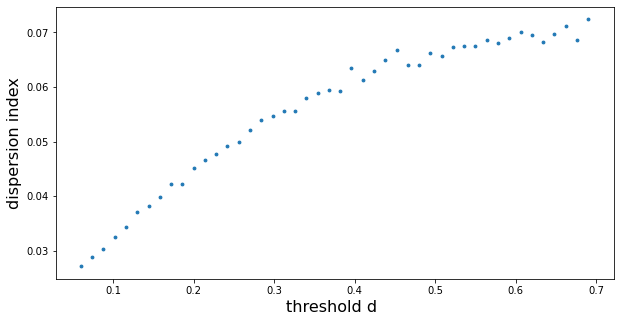

In [1087]:
dispersion=pd.DataFrame(dispersion)

#AHORA representamos la figura en un scatter dependiendo de los parametros introducidos
dispersion=dispersion.sort_values('d')
plt.figure(figsize=(10,5))
plt.scatter(dispersion['d'],numer_samples*dispersion['dispersion_index'],s=8)

#plt.show()#final plot including all of the clusters distribution
plt.xlabel("threshold d ", size = 16)
plt.ylabel("dispersion index", size = 16)



In [ ]:
# Guarda datos en CSV:
dispersion.to_csv('dispersion_ABnet.csv', header=False, index=False)

Text(0, 0.5, 'dispersion index')

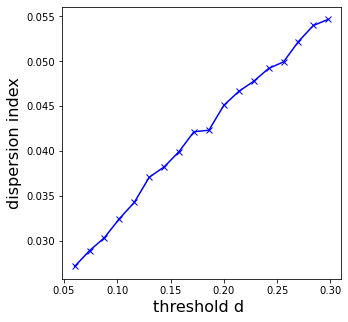

In [1088]:
"""ahora recreamos el que va de 0.2 a 0.3 para comparar con el caso well mixed"""

#AHORA representamos la figura en un scatter dependiendo de los parametros introducidos
dispersion=dispersion[dispersion['d']<=0.3].sort_values('d')
plt.figure(figsize=(5,5))
plt.plot(dispersion['d'],dispersion['dispersion_index']*numer_samples,'xb-')

#plt.show()#final plot including all of the clusters distribution
plt.xlabel("threshold d ", size = 16)
plt.ylabel("dispersion index", size = 16)


In [102]:
import winsound
# importing the pyttsx library
import pyttsx3


In [105]:

print("Playing the file 'Welcome.wav'")
# winsound.PlaySound('filename', flag)

winsound.PlaySound('SystemExit', winsound.SND_FILENAME)
# initialisation
engine = pyttsx3.init()

# testing
engine.say("Acabado,acabado, acabado, acabado ,acabado ,acabado")
engine.runAndWait()


Playing the file 'Welcome.wav'
